# James Turner YT Sims 4 2024 DLC Survey

Data from https://jamesturner.yt/sims-pack-ratings/2024

In [138]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

os.makedirs('images', exist_ok = True)
sns.set_style('white')

## Import Data

In [4]:
player_data = pd.read_excel('The Sims 4 DLC Survey 2024.xlsx', sheet_name = 'Survey - Player Results')
player_data = player_data.set_index('survey_id')
player_data

platform  player_cas  player_build  player_live  \
survey_id                                                    
1                 0           1             0            1   
2                 5           0             1            1   
3                 0           0             1            0   
4                 0           1             1            1   
5                 0           1             1            1   
...             ...         ...           ...          ...   
15152             0           1             1            1   
15153             0           1             0            0   
15154             0           0             0            1   
15155             1           0             0            1   
15156             0           0             0            1   

                                                       packs  
survey_id                                                     
1          ["EP02","EP03","EP05","EP06","EP08","EP09","SP...  
2          ["EP01","EP03","EP04","EP05","EP06","EP07","EP...  
3          ["EP01","EP02","EP03","EP04","EP05","EP06","EP...  
4          ["EP01","EP02","EP03","EP04","EP05","EP06","EP...  
5          ["EP01","EP02","EP03","EP04","EP05","EP06","EP...  
...                                                      ...  
15152      ["EP01","EP02","EP03","EP04","EP05","EP06","EP...  
15153      ["EP01","EP02","EP03","EP04","EP05","EP08","EP...  
15154      ["EP01","EP02","EP03","EP04","EP05","EP06","EP...  
15155      ["EP01","EP02","EP03","EP04","EP05","EP06","EP...  
15156                                 ["SP06","SP08","SP14"]  

[15156 rows x 5 columns]

In [5]:
summary_per_pack = pd.read_excel('The Sims 4 DLC Survey 2024.xlsx', sheet_name = 'Summary - Pack Results')
summary_per_pack

pack_code  avg_rating  avg_gameplay  avg_buildmode  avg_cas  avg_world  \
0       EP01         NaN        6.7403         4.8318   4.1164     2.1182   
1       EP02         NaN        6.4540         6.8248   5.5796     8.5605   
2       EP03         NaN        7.4340         7.0164   6.0849     8.3623   
3       EP04         NaN        7.2864         7.2529   6.0738     8.0083   
4       EP05         NaN        8.3771         7.6648   6.9536        NaN   
..       ...         ...           ...            ...      ...        ...   
76      SP51      4.8829           NaN            NaN      NaN        NaN   
77      SP52      6.7900           NaN            NaN      NaN        NaN   
78      SP53      6.9886           NaN            NaN      NaN        NaN   
79      SP54      7.9913           NaN            NaN      NaN        NaN   
80      SP55      7.7863           NaN            NaN      NaN        NaN   

    avg_bugs  owned  owned_percent  unowned  ...  bugeffect  promo_percent  \
0     3.6673  12478        82.3304     2678  ...       2457         2.2760   
1     1.8775  12332        81.3671     2824  ...        402         1.2001   
2     2.6782  13522        89.2188     1634  ...       1158         1.1833   
3     2.6219  13833        91.2708     1323  ...       1369         1.3157   
4     2.2274  14295        94.3191      861  ...       1057         1.2032   
..       ...    ...            ...      ...  ...        ...            ...   
76       NaN   3399        22.4268    11757  ...          0         2.6773   
77       NaN   4171        27.5205    10985  ...          0         2.6852   
78       NaN   4140        27.3159    11016  ...          0         2.1256   
79       NaN   4231        27.9163    10925  ...          0         1.8908   
80       NaN   4652        30.6941    10504  ...          0         2.0421   

    bugeffect_percent  avg_pack_rating  getpack_will_buy  getpack_might_buy  \
0             19.6907         4.451675               118                195   
1              3.2598         6.854725               162                349   
2              8.5638         7.224400               158                254   
3              9.8966         7.155350               142                225   
4              7.3942         7.665167               160                180   
..                ...              ...               ...                ...   
76             0.0000              NaN               180                718   
77             0.0000              NaN               445               1633   
78             0.0000              NaN               589               1805   
79             0.0000              NaN              1130               2450   
80             0.0000              NaN              1030               1905   

    getpack_on_sale  getpack_free  getpack_no  getpackbugs_percent  
0              1017          1184         164               4.8004  
1              1225           892         196               1.3704  
2               729           407          86               0.9984  
3               476           332         148               0.9253  
4               272           175          74               0.7275  
..              ...           ...         ...                  ...  
76             1701          6359        2799                  NaN  
77             2751          4852        1304                  NaN  
78             2846          4456        1320                  NaN  
79             2796          3769         780                  NaN  
80             2435          3922        1212                  NaN  

[81 rows x 21 columns]

In [6]:
raw_data = pd.concat([
    pd.read_excel('The Sims 4 DLC Survey 2024.xlsx',sheet_name = 'Survey - Pack Results 1'),
    pd.read_excel('The Sims 4 DLC Survey 2024.xlsx',sheet_name = 'Survey - Pack Results 2')]
)

In [7]:
print(raw_data.shape)
raw_data.head()

(1227636, 13)


result_id  survey_id pack_code  rating  gameplay  buildmode  cas  world  \
0          1          1      EP01     NaN       NaN        NaN  NaN    NaN   
1          2          1      EP02     NaN       6.0        6.0  4.0    8.0   
2          3          1      EP03     NaN       7.0        6.0  5.0    9.0   
3          4          1      EP04     NaN       NaN        NaN  NaN    NaN   
4          5          1      EP05     NaN       8.0        6.0  5.0    NaN   

   bugs  promo  bugeffect  getpack  getpackbugs  
0   NaN      0          0      3.0          0.0  
1   3.0      0          0      NaN          NaN  
2   2.0      0          0      NaN          NaN  
3   NaN      0          0      2.0          0.0  
4   2.0      0          0      NaN          NaN

## Question 1: How many completionists do we have?

More visualizations of "gamer type"

How many people own all packs? What's the distribution of pack ownership?

### More visualizations for "Gamer Type"

In [12]:
gamer_type_raw = player_data[['player_cas', 'player_build', 'player_live']]
gamer_type_raw = gamer_type_raw.replace({0: False, 1: True})
gamer_type_raw

C:\Users\gabi2\AppData\Local\Temp\ipykernel_9072\2399901255.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gamer_type_raw = gamer_type_raw.replace({0: False, 1: True})


player_cas  player_build  player_live
survey_id                                       
1                True         False         True
2               False          True         True
3               False          True        False
4                True          True         True
5                True          True         True
...               ...           ...          ...
15152            True          True         True
15153            True         False        False
15154           False         False         True
15155           False         False         True
15156           False         False         True

[15156 rows x 3 columns]

In [13]:
gamer_type_raw.columns

Index(['player_cas', 'player_build', 'player_live'], dtype='object')

#### venn diagram actually showing realistic percentages

In [12]:
from matplotlib_venn import venn3

In [35]:
# replace true/false with the index to become a unique value for the venn diagram set
for_set = gamer_type_raw.T.apply(lambda x: np.where(x, str(x.name), np.nan)).T.reset_index().set_index('survey_id')
for_set

player_cas player_build player_live
survey_id                                    
1                  1          nan           1
2                nan            2           2
3                nan            3         nan
4                  4            4           4
5                  5            5           5
...              ...          ...         ...
15152          15152        15152       15152
15153          15153          nan         nan
15154            nan          nan       15154
15155            nan          nan       15155
15156            nan          nan       15156

[15156 rows x 3 columns]

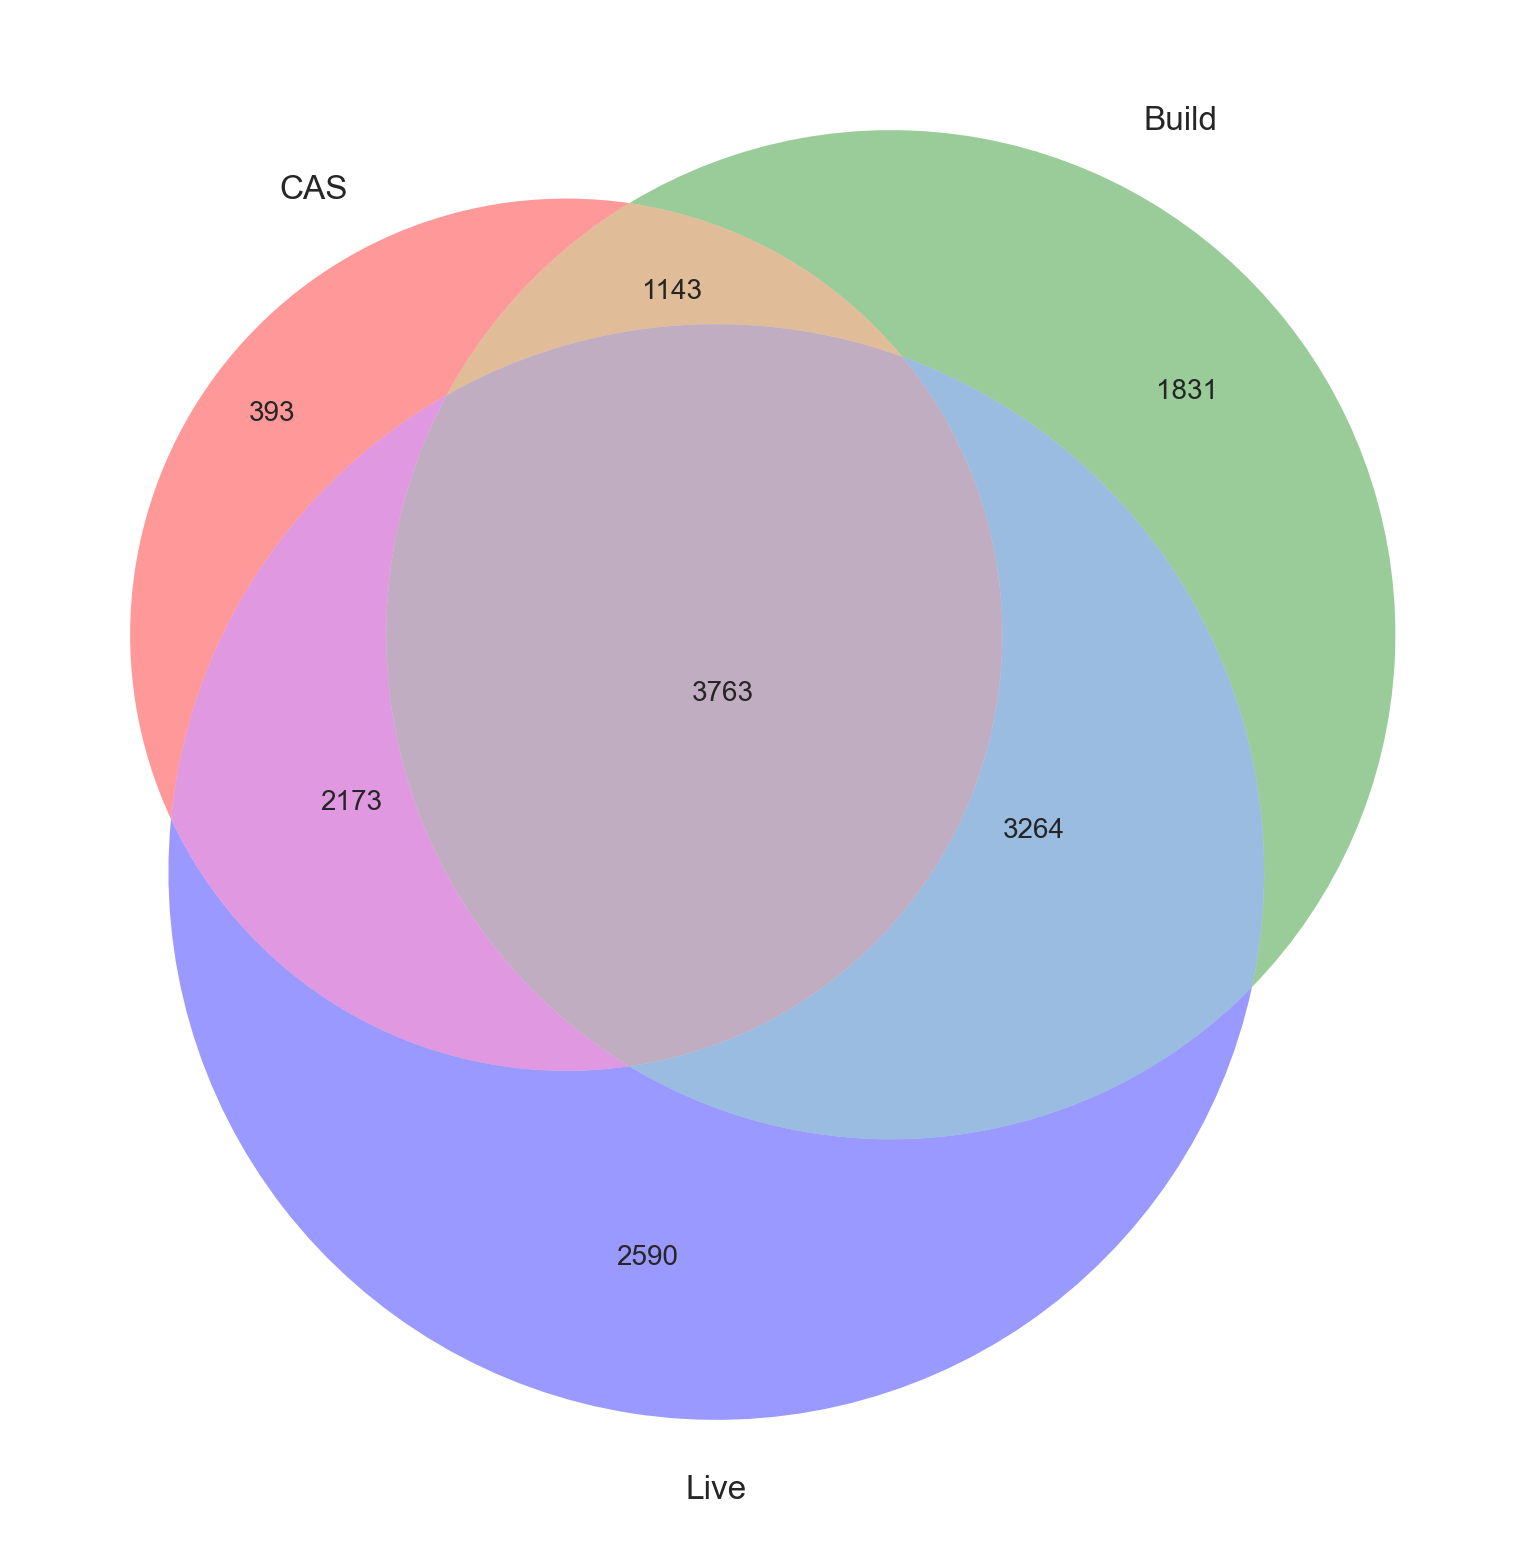

In [41]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 200)
venn3([set(for_set['player_cas'].to_list()),
       set(for_set['player_build'].to_list()),
       set(for_set['player_live'].to_list())
      ], 
      ('CAS', 'Build', 'Live'),
     )
plt.savefig('images/player_style_venn.png')
plt.show()

### What's the distribution of pack ownership?

how many packs do people usually own? how many people own all?

In [14]:
player_data['packs_clean'] = player_data['packs'].apply(
    lambda x: x.replace('[', '').replace(']', '').replace('"', '')
)

pack_ownership_bool = player_data['packs_clean'].str.get_dummies(sep=',').astype(bool)
pack_ownership = pack_ownership_bool.mul(1)
pack_ownership

EP01  EP02  EP03  EP04  EP05  EP06  EP07  EP08  EP09  EP10  ...  \
survey_id                                                              ...   
1             0     1     1     0     1     1     0     1     1     0  ...   
2             1     0     1     1     1     1     1     1     0     0  ...   
3             1     1     1     1     1     1     1     1     1     1  ...   
4             1     1     1     1     1     1     1     1     1     1  ...   
5             1     1     1     1     1     1     1     1     1     1  ...   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
15152         1     1     1     1     1     1     1     1     1     1  ...   
15153         1     1     1     1     1     0     0     1     1     0  ...   
15154         1     1     1     1     1     1     1     1     1     1  ...   
15155         1     1     1     1     1     1     1     1     1     1  ...   
15156         0     0     0     0     0     0     0     0     0     0  ...   

           SP46  SP47  SP48  SP49  SP50  SP51  SP52  SP53  SP54  SP55  
survey_id                                                              
1             0     0     0     0     0     0     0     0     0     0  
2             0     0     0     0     0     0     0     0     0     0  
3             1     1     1     1     0     1     1     1     1     1  
4             1     1     1     1     1     1     1     1     1     1  
5             0     0     0     1     0     0     0     0     0     0  
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
15152         1     1     1     1     1     1     1     1     1     1  
15153         0     0     1     0     0     0     0     0     0     0  
15154         1     0     0     1     0     0     0     0     0     0  
15155         1     0     0     1     1     0     1     0     1     1  
15156         0     0     0     0     0     0     0     0     0     0  

[15156 rows x 81 columns]

In [15]:
num_owners = pd.DataFrame(pack_ownership.sum(), columns = ['Num Owners'])
num_owners.sort_values('Num Owners')

Num Owners
SP28        2915
SP50        3265
SP51        3399
SP30        3511
SP44        3683
...          ...
SP16       13077
EP11       13253
EP03       13522
EP04       13833
EP05       14295

[81 rows x 1 columns]

In [16]:
num_packs_owned = pd.DataFrame(pack_ownership.sum(axis = 1), columns = ['Num Packs Owned'])
num_packs_owned

Num Packs Owned
survey_id                 
1                        9
2                       20
3                       76
4                       81
5                       43
...                    ...
15152                   78
15153                   23
15154                   29
15155                   62
15156                    3

[15156 rows x 1 columns]

In [17]:
by_pack = pack_ownership.T.reset_index().rename(columns = {'index': 'Pack Num'}).set_index('Pack Num')
by_pack

survey_id  1      2      3      4      5      6      7      8      9      \
Pack Num                                                                   
EP01           0      1      1      1      1      1      1      1      1   
EP02           1      0      1      1      1      1      1      1      1   
EP03           1      1      1      1      1      1      1      1      1   
EP04           0      1      1      1      1      1      1      1      1   
EP05           1      1      1      1      1      1      1      1      1   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
SP51           0      0      1      1      0      0      0      1      1   
SP52           0      0      1      1      0      0      0      1      1   
SP53           0      0      1      1      0      0      1      1      1   
SP54           0      0      1      1      0      0      1      1      1   
SP55           0      0      1      1      0      0      1      1      1   

survey_id  10     ...  15147  15148  15149  15150  15151  15152  15153  15154  \
Pack Num          ...                                                           
EP01           1  ...      1      1      0      1      1      1      1      1   
EP02           1  ...      1      1      0      1      1      1      1      1   
EP03           1  ...      1      1      1      1      1      1      1      1   
EP04           1  ...      1      1      0      1      1      1      1      1   
EP05           1  ...      1      1      0      1      1      1      1      1   
...          ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
SP51           0  ...      1      1      0      0      0      1      0      0   
SP52           0  ...      1      1      0      0      0      1      0      0   
SP53           0  ...      1      1      0      0      0      1      0      0   
SP54           0  ...      1      1      0      0      0      1      0      0   
SP55           0  ...      1      1      0      0      0      1      0      0   

survey_id  15155  15156  
Pack Num                 
EP01           1      0  
EP02           1      0  
EP03           1      0  
EP04           1      0  
EP05           1      0  
...          ...    ...  
SP51           0      0  
SP52           1      0  
SP53           0      0  
SP54           1      0  
SP55           1      0  

[81 rows x 15156 columns]

### read the pack name to know which type of pack it is

https://sims4.crinrict.com/eng/extras-2/available-packs-dlc/

use this website to get the name of EPs and their release dates

In [18]:
from bs4 import BeautifulSoup
import requests 

webpage = requests.get('https://sims4.crinrict.com/eng/extras-2/available-packs-dlc/')
soup = BeautifulSoup(webpage.content)
html = soup.find_all("article")

In [19]:
# from CHAT GPT because i'm not used to html
# Initialize an empty list to store dictionaries
packs = []

# Find all the <h2> elements, which separate the sections
sections = soup.find_all('h2', class_='wp-block-heading')

# Iterate over each section
for section in sections:
    pack_type = section.get_text().strip()  # Get the text of the section (e.g., "Expansion Packs")
    
    # Find the <ul> that follows this <h2>
    ul = section.find_next('ul')
    
    # Iterate over each <li> in the <ul>
    for li in ul.find_all('li'):
        # Extract the date, pack ID, and name
        # The date is the first part of the <li> text
        date = li.contents[0].strip().replace(':','') if li.contents else None
        
        # The <b> tag contains the pack ID
        pack_id_tag = li.find('b')
        pack_id = pack_id_tag.get_text() if pack_id_tag else None
        
        # The <a> tag contains the pack name
        name_tag = li.find('a')
        name = name_tag.get_text().strip() if name_tag else None
        
        # Only add valid packs to the list
        if date and pack_id and name:
            pack = {
                'pack_type': pack_type,
                'release date': date,
                'pack_id': pack_id,
                'pack name': name
            }
            packs.append(pack)

# Print the result
pack_info = pd.DataFrame(packs)
pack_info

pack_type release date pack_id              pack name
0   Expansion Packs   03/31/2015    EP01            Get To Work
1   Expansion Packs   12/08/2015    EP02           Get Together
2   Expansion Packs   11/01/2016    EP03            City Living
3   Expansion Packs   11/10/2017    EP04            Cats & Dogs
4   Expansion Packs   06/22/2018    EP05                Seasons
..              ...          ...     ...                    ...
79             Kits   05/30/2024    SP53        Cozy Bistro Kit
80             Kits   09/19/2024    SP54      Artist Studio Kit
81             Kits   09/19/2024    SP55  Storybook Nursery Kit
82      Creator Kit   12/01/2014    FP01    Holiday Celebration
83    Extra Content   12/01/2014    FP01    Holiday Celebration

[84 rows x 4 columns]

In [20]:
pack_info.columns

Index(['pack_type', 'release date', 'pack_id', 'pack name'], dtype='object')

#### Add pack type into df for how many packs a person has

In [129]:
pack_counts = pd.merge(
    left = by_pack, 
    left_index = True,
    right = pack_info,
    right_on = 'pack_id',
    how = 'left'
).set_index(list(pack_info.columns))
pack_counts

1      2      \
pack_type       release date pack_id pack name                             
Expansion Packs 03/31/2015   EP01    Get To Work                0      1   
                12/08/2015   EP02    Get Together               1      0   
                11/01/2016   EP03    City Living                1      1   
                11/10/2017   EP04    Cats & Dogs                0      1   
                06/22/2018   EP05    Seasons                    1      1   
...                                                           ...    ...   
Kits            04/18/2024   SP51    Party Essentials Kit       0      0   
                05/30/2024   SP52    Riviera Retreat Kit        0      0   
                             SP53    Cozy Bistro Kit            0      0   
                09/19/2024   SP54    Artist Studio Kit          0      0   
                             SP55    Storybook Nursery Kit      0      0   

                                                            3      4      \
pack_type       release date pack_id pack name                             
Expansion Packs 03/31/2015   EP01    Get To Work                1      1   
                12/08/2015   EP02    Get Together               1      1   
                11/01/2016   EP03    City Living                1      1   
                11/10/2017   EP04    Cats & Dogs                1      1   
                06/22/2018   EP05    Seasons                    1      1   
...                                                           ...    ...   
Kits            04/18/2024   SP51    Party Essentials Kit       1      1   
                05/30/2024   SP52    Riviera Retreat Kit        1      1   
                             SP53    Cozy Bistro Kit            1      1   
                09/19/2024   SP54    Artist Studio Kit          1      1   
                             SP55    Storybook Nursery Kit      1      1   

                                                            5      6      \
pack_type       release date pack_id pack name                             
Expansion Packs 03/31/2015   EP01    Get To Work                1      1   
                12/08/2015   EP02    Get Together               1      1   
                11/01/2016   EP03    City Living                1      1   
                11/10/2017   EP04    Cats & Dogs                1      1   
                06/22/2018   EP05    Seasons                    1      1   
...                                                           ...    ...   
Kits            04/18/2024   SP51    Party Essentials Kit       0      0   
                05/30/2024   SP52    Riviera Retreat Kit        0      0   
                             SP53    Cozy Bistro Kit            0      0   
                09/19/2024   SP54    Artist Studio Kit          0      0   
                             SP55    Storybook Nursery Kit      0      0   

                                                            7      8      \
pack_type       release date pack_id pack name                             
Expansion Packs 03/31/2015   EP01    Get To Work                1      1   
                12/08/2015   EP02    Get Together               1      1   
                11/01/2016   EP03    City Living                1      1   
                11/10/2017   EP04    Cats & Dogs                1      1   
                06/22/2018   EP05    Seasons                    1      1   
...                                                           ...    ...   
Kits            04/18/2024   SP51    Party Essentials Kit       0      1   
                05/30/2024   SP52    Riviera Retreat Kit        0      1   
                             SP53    Cozy Bistro Kit            1      1   
                09/19/2024   SP54    Artist Studio Kit          1      1   
                             SP55    Storybook Nursery Kit      1      1   

                                                            9      10     ...  \
pack_type       release

In [132]:
pack_counts.reset_index().columns

Index([   'pack_type', 'release date',      'pack_id',    'pack name',
                    1,              2,              3,              4,
                    5,              6,
       ...
                15147,          15148,          15149,          15150,
                15151,          15152,          15153,          15154,
                15155,          15156],
      dtype='object', length=15160)

In [133]:
per_player_per_type = pack_counts.reset_index().set_index(['release date', 'pack_id', 'pack name']).groupby('pack_type').sum()
per_player_per_type

1      2      3      4      5      6      7      8      \
pack_type                                                                 
Expansion Packs      6      9     16     16     15     12     16     16   
Game Packs           0      4     12     12     10      9     12     12   
Kits                 1      0     28     33      0      1     16     33   
Stuff Packs          2      7     20     20     18     17     15     20   

                 9      10     ...  15147  15148  15149  15150  15151  15152  \
pack_type                      ...                                             
Expansion Packs     16     13  ...     16     16      4     12     16     15   
Game Packs          12      7  ...     12     12      1      9     11     11   
Kits                33      5  ...     33     33      0      1      8     32   
Stuff Packs         20     10  ...     20     20      3     11     20     20   

                 15153  15154  15155  15156  
pack_type                                    
Expansion Packs      9     14     16      0  
Game Packs           6     10     10      0  
Kits                 3      0     19      0  
Stuff Packs          5      5     17      3  

[4 rows x 15156 columns]

#### make histograms of pack ownership

In [134]:
print(num_packs_owned.max()[0])
num_packs_owned.head()

81


C:\Users\gabi2\AppData\Local\Temp\ipykernel_9072\3740290192.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(num_packs_owned.max()[0])


Num Packs Owned
survey_id                 
1                        9
2                       20
3                       76
4                       81
5                       43

In [135]:
num_packs_owned.value_counts(normalize = True)

Num Packs Owned
81                 0.111177
80                 0.016693
17                 0.016231
28                 0.015571
24                 0.015571
                     ...   
73                 0.006202
4                  0.005278
3                  0.003959
2                  0.003035
1                  0.001979
Name: proportion, Length: 81, dtype: float64

### detour: get colors and formatting

In [23]:
pack_type_list = ['Expansion Packs', 'Game Packs', 'Stuff Packs', 'Kits'] # specifically ordered
pack_type_list

['Expansion Packs', 'Game Packs', 'Stuff Packs', 'Kits']

In [252]:
color_map_raw = {
    'Expansion Packs': (13,191,191), # teal
    'Expansion Packs_dark': (8, 59, 64), # dark teal
    'Game Packs': (43,0,255), # royal blue/purple
    'Game Packs_dark': (35, 129, 222), # blue
    'Stuff Packs': (100,196,60), # green
    'Stuff Packs_dark': (42, 115, 11), # green
    'Kits': (143,51,170), # pink/purple
    'Kits_dark': (51, 6, 64), # pink/purple
    'player_cas': (48,155,46), # green
    'player_build': (202,113,43), # orange
    'player_live': (33,135,207), # blue
    'cas': (48,155,46), # green
    'build': (202,113,43), # orange
    'live': (33,135,207), # blue
    'gray': (37,38,38),
    'bugs': (119, 48, 166) # bugs purple
}

color_map = {}
for name, (r,g,b) in color_map_raw.items():
    new_rgb = ( r / 255.0, g / 255.0, b / 255.0, 1 )
    color_map[name] = new_rgb
    

In [140]:
plt.rcParams.update({
    'font.family': 'fantasy', # impact lmaooo
    'font.size': 14,
    'axes.labelsize': 12,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.weight': 'normal'
})

### back to plots

#### total packs

[]

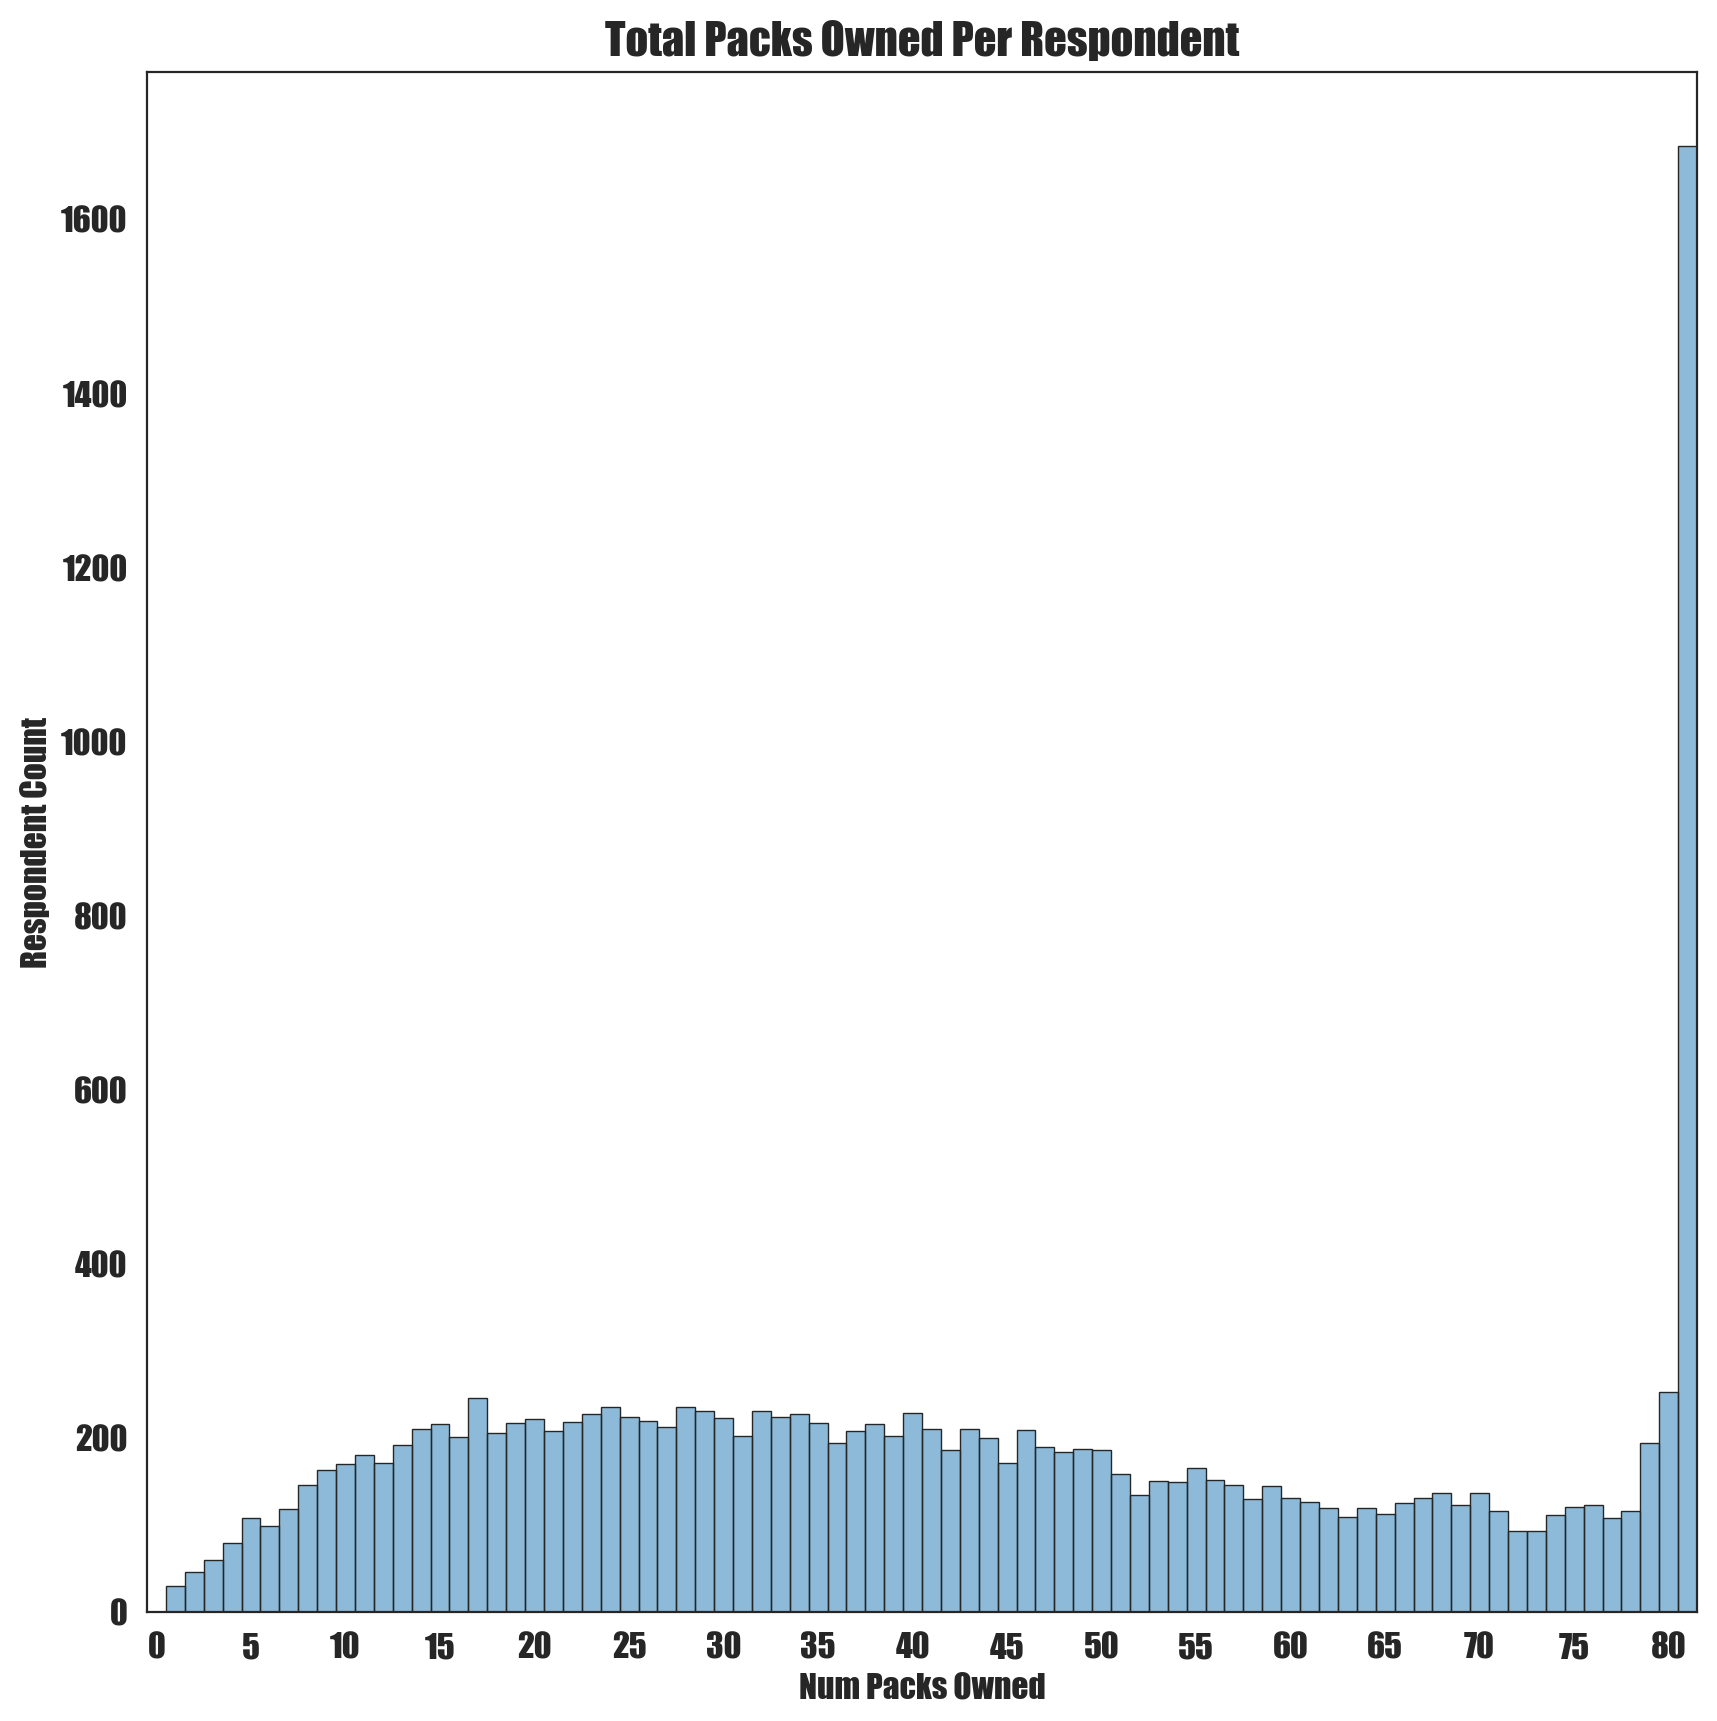

In [177]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 200)
sns.histplot(
    num_packs_owned,
    ax = ax,
    bins = num_packs_owned.max()[0],
    legend = False,
    edgecolor = color_map['gray'],
    linewidth = 0.5,
    discrete = True
)
max_packs =  num_packs_owned.max()[0] + 1
ax.set_xticks(range(0, max_packs, num_packs_owned.max()[0]//16))
ax.set_xlim((0 - 0.5, max_packs - 0.5))
ax.set_xlabel('Num Packs Owned')
ax.set_ylabel('Respondent Count')
ax.set_title('Total Packs Owned Per Respondent')
plt.savefig('images/total_packs_owned_hist.png', bbox_inches = 'tight')
plt.plot()

#### total packs per pack category

C:\Users\gabi2\AppData\Local\Temp\ipykernel_9072\2674844518.py:32: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.3, wspace=0.3, top = 0.9)


[]

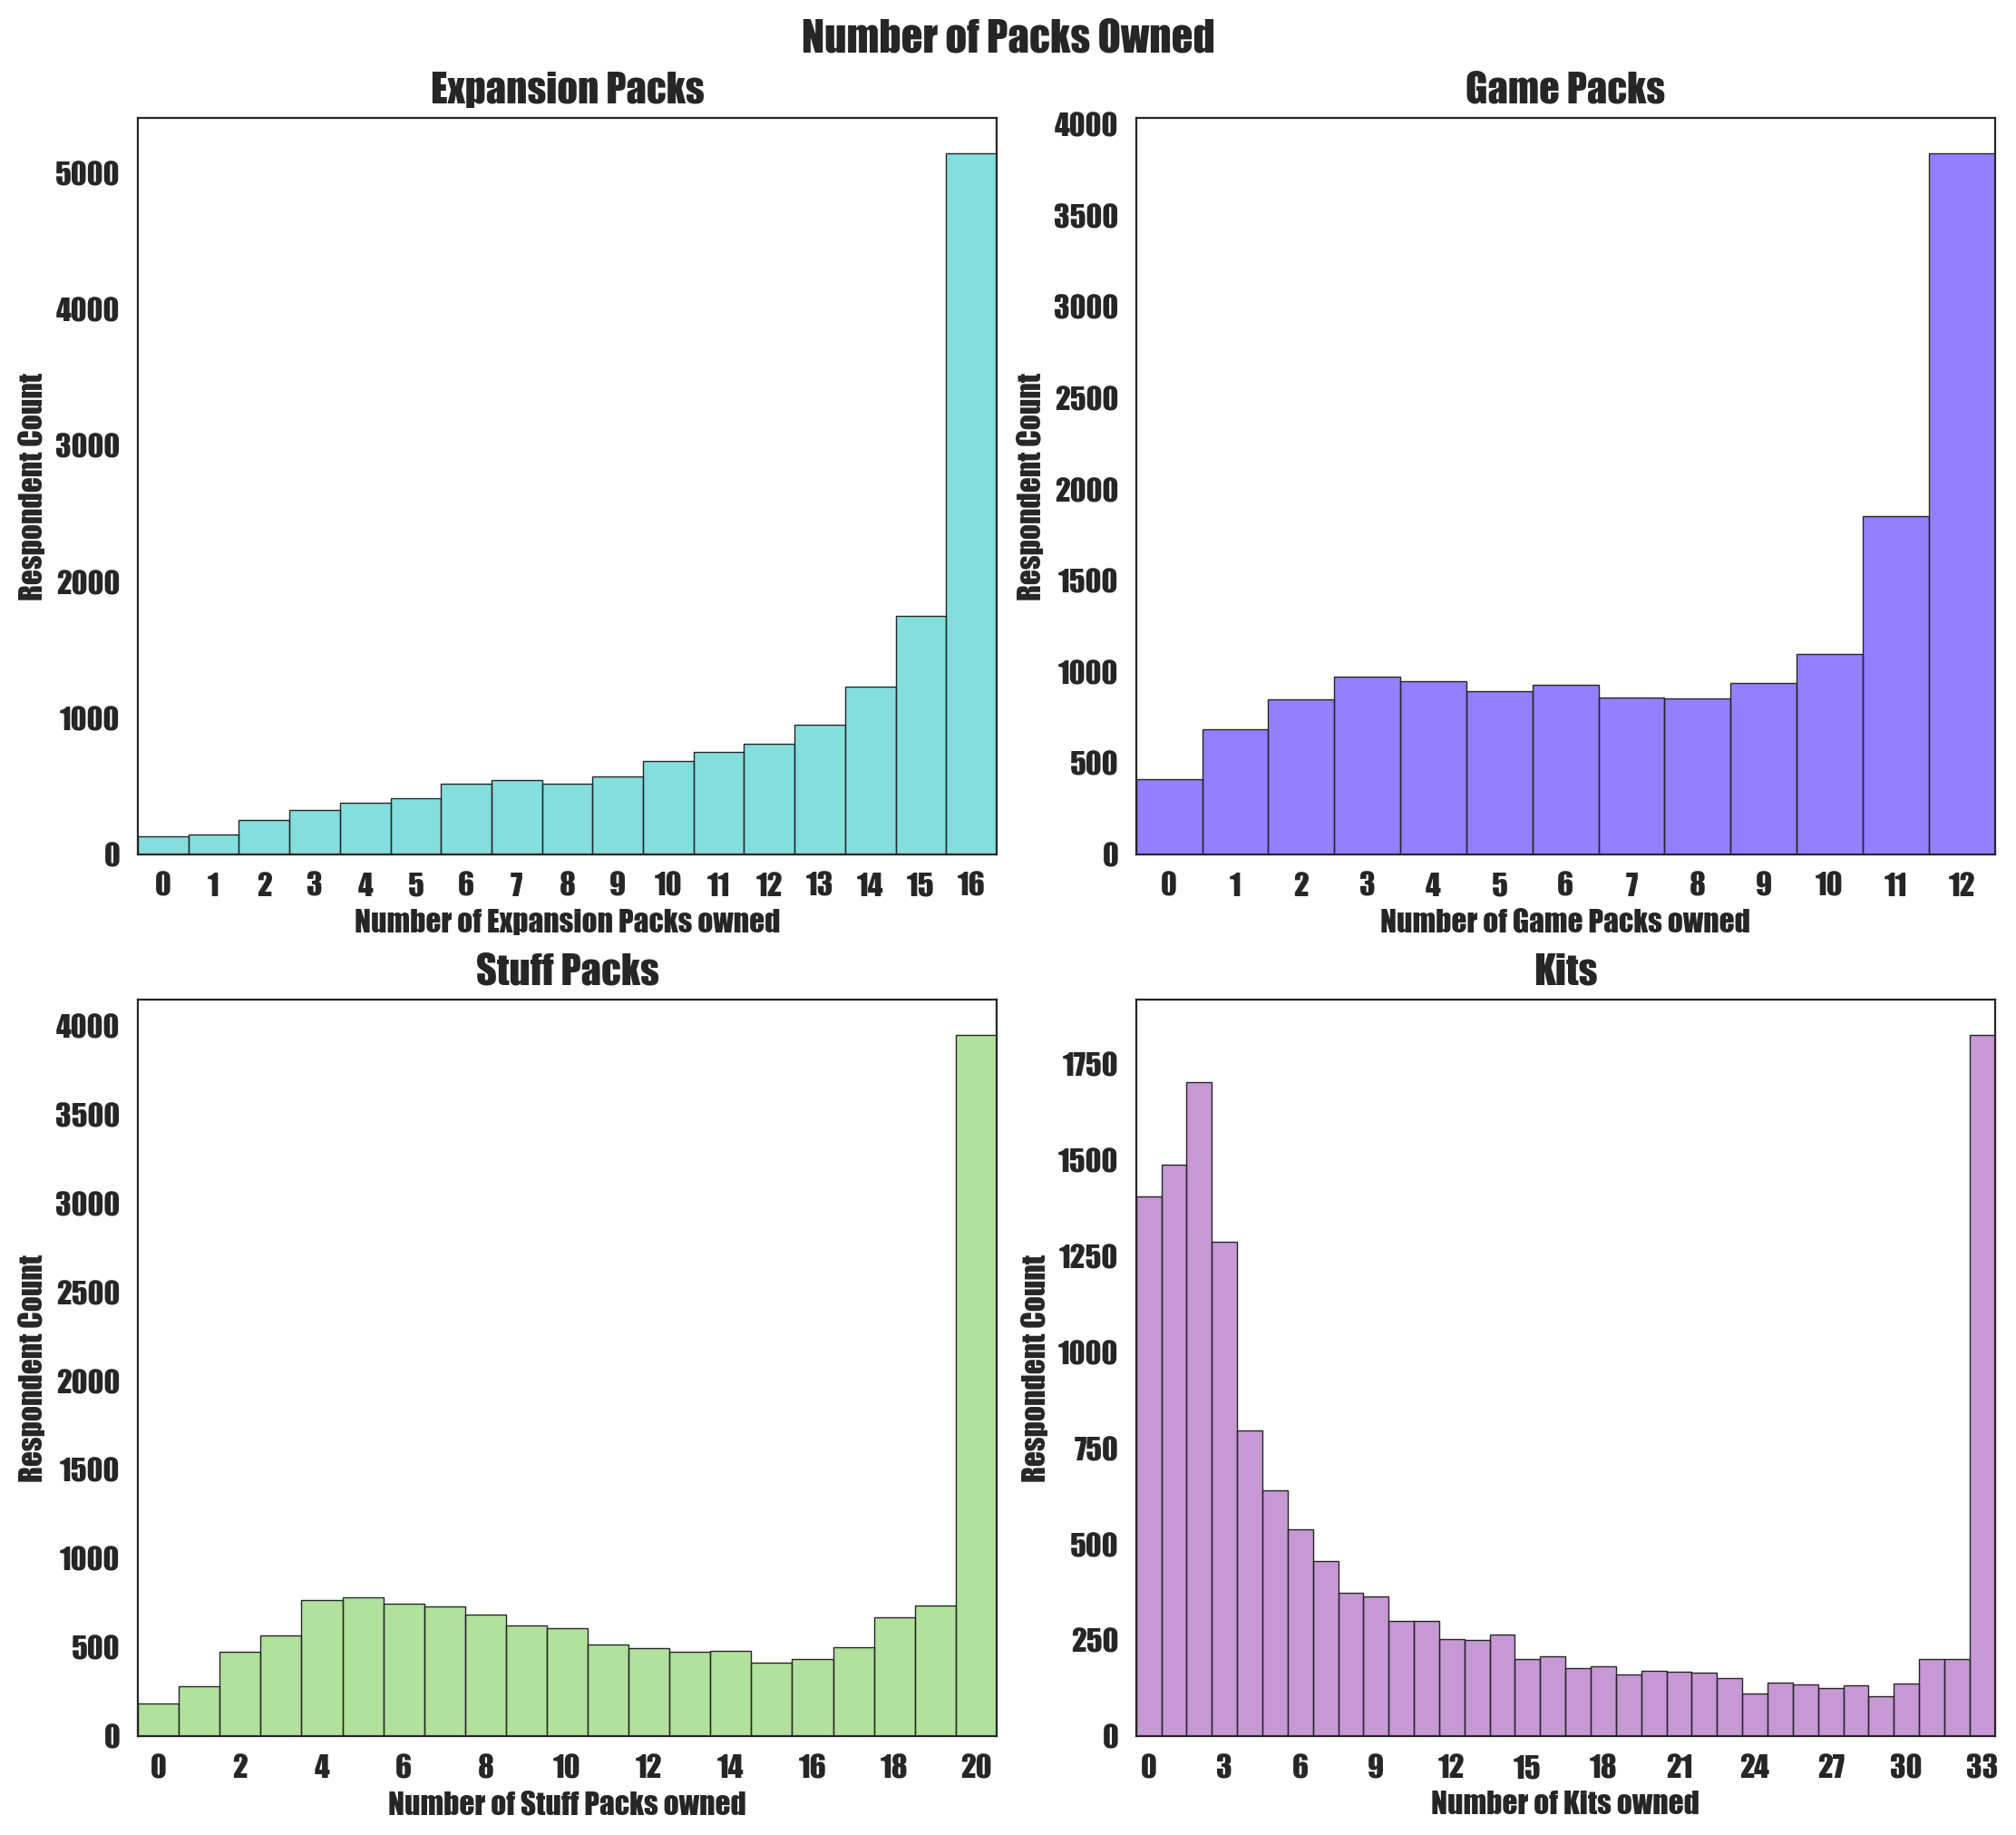

In [141]:
fig, axes = plt.subplots(
    figsize = (11,10), dpi = 200,
    nrows = 2, ncols = 2,
    constrained_layout = True
)

for i, pack_type in enumerate( pack_type_list ):
    ax = axes[
        i // 2,
        i % 2
    ]
    df = per_player_per_type.T[[pack_type]]
    sns.histplot(
        data = df,
        ax = ax,
        bins = df.max()[0],
        legend = False,
        palette = color_map,
        edgecolor = color_map['gray'],
        linewidth = 0.5,
        discrete = True
    )
    ax.set_title(pack_type)
    ax.set_xlabel('Num Packs Owned')
    ax.set_ylabel('Respondent Count')
    max_packs = df.max()[0] + 1
    ax.set_xticks(range(0, max_packs, df.max()[0]//10))
    ax.set_xlim((-0.5, max_packs - 0.5))
    ax.set_xlabel(f'Number of {pack_type} owned')

plt.suptitle('Number of Packs Owned')
plt.subplots_adjust(hspace=0.3, wspace=0.3, top = 0.9)
plt.savefig('images/packs_owned_hist_by_type.png', bbox_inches = 'tight')
plt.plot()

### In people who have almost every single pack, which ones are they missing?

#### prep data

In [26]:
# missing a single kit = 80
almost_all = pack_counts.T[pack_counts.sum() == 80]
print(almost_all.shape)
respondents = almost_all.shape[0]
last_pack = pd.DataFrame(almost_all.sum()).rename(columns = {0: 'Num Owning'}).sort_values('Num Owning')
last_pack['Num Missing'] = respondents - last_pack['Num Owning']
last_pack

(253, 81)


Num Owning  \
pack_type       release date pack_id pack name                                 
Game Packs      09/08/2020   GP09    Star Wars: Journey to Batuu         171   
Kits            03/02/2021   SP22    Bust The Dust Kit                   197   
                12/02/2021   SP28    Modern Menswear Kit                 223   
Expansion Packs 07/25/2024   EP16    Lovestruck                          235   
Kits            09/19/2024   SP54    Artist Studio Kit                   242   
...                                                                      ...   
Game Packs      06/16/2022   GP12    Werewolves                          253   
                06/01/2021   GP10    Dream Home Decorator                253   
                09/10/2019   GP08    Realm of Magic                      253   
Stuff Packs     02/09/2016   SP06    Romantic Garden Stuff               253   
                01/16/2018   SP13    Laundry Day Stuff                   253   

                                                                  Num Missing  
pack_type       release date pack_id pack name                                 
Game Packs      09/08/2020   GP09    Star Wars: Journey to Batuu           82  
Kits            03/02/2021   SP22    Bust The Dust Kit                     56  
                12/02/2021   SP28    Modern Menswear Kit                   30  
Expansion Packs 07/25/2024   EP16    Lovestruck                            18  
Kits            09/19/2024   SP54    Artist Studio Kit                     11  
...                                                                       ...  
Game Packs      06/16/2022   GP12    Werewolves                             0  
                06/01/2021   GP10    Dream Home Decorator                   0  
                09/10/2019   GP08    Realm of Magic                         0  
Stuff Packs     02/09/2016   SP06    Romantic Garden Stuff                  0  
                01/16/2018   SP13    Laundry Day Stuff                      0  

[81 rows x 2 columns]

In [27]:
cmap_for_packs = {}
pack_info_list = list(last_pack.reset_index()[['pack name', 'pack_type']].T.to_dict(orient = 'list').values())
for packname, packtype in pack_info_list:
    cmap_for_packs[packname] = color_map[packtype]


#### barplot of top missing packs

[]

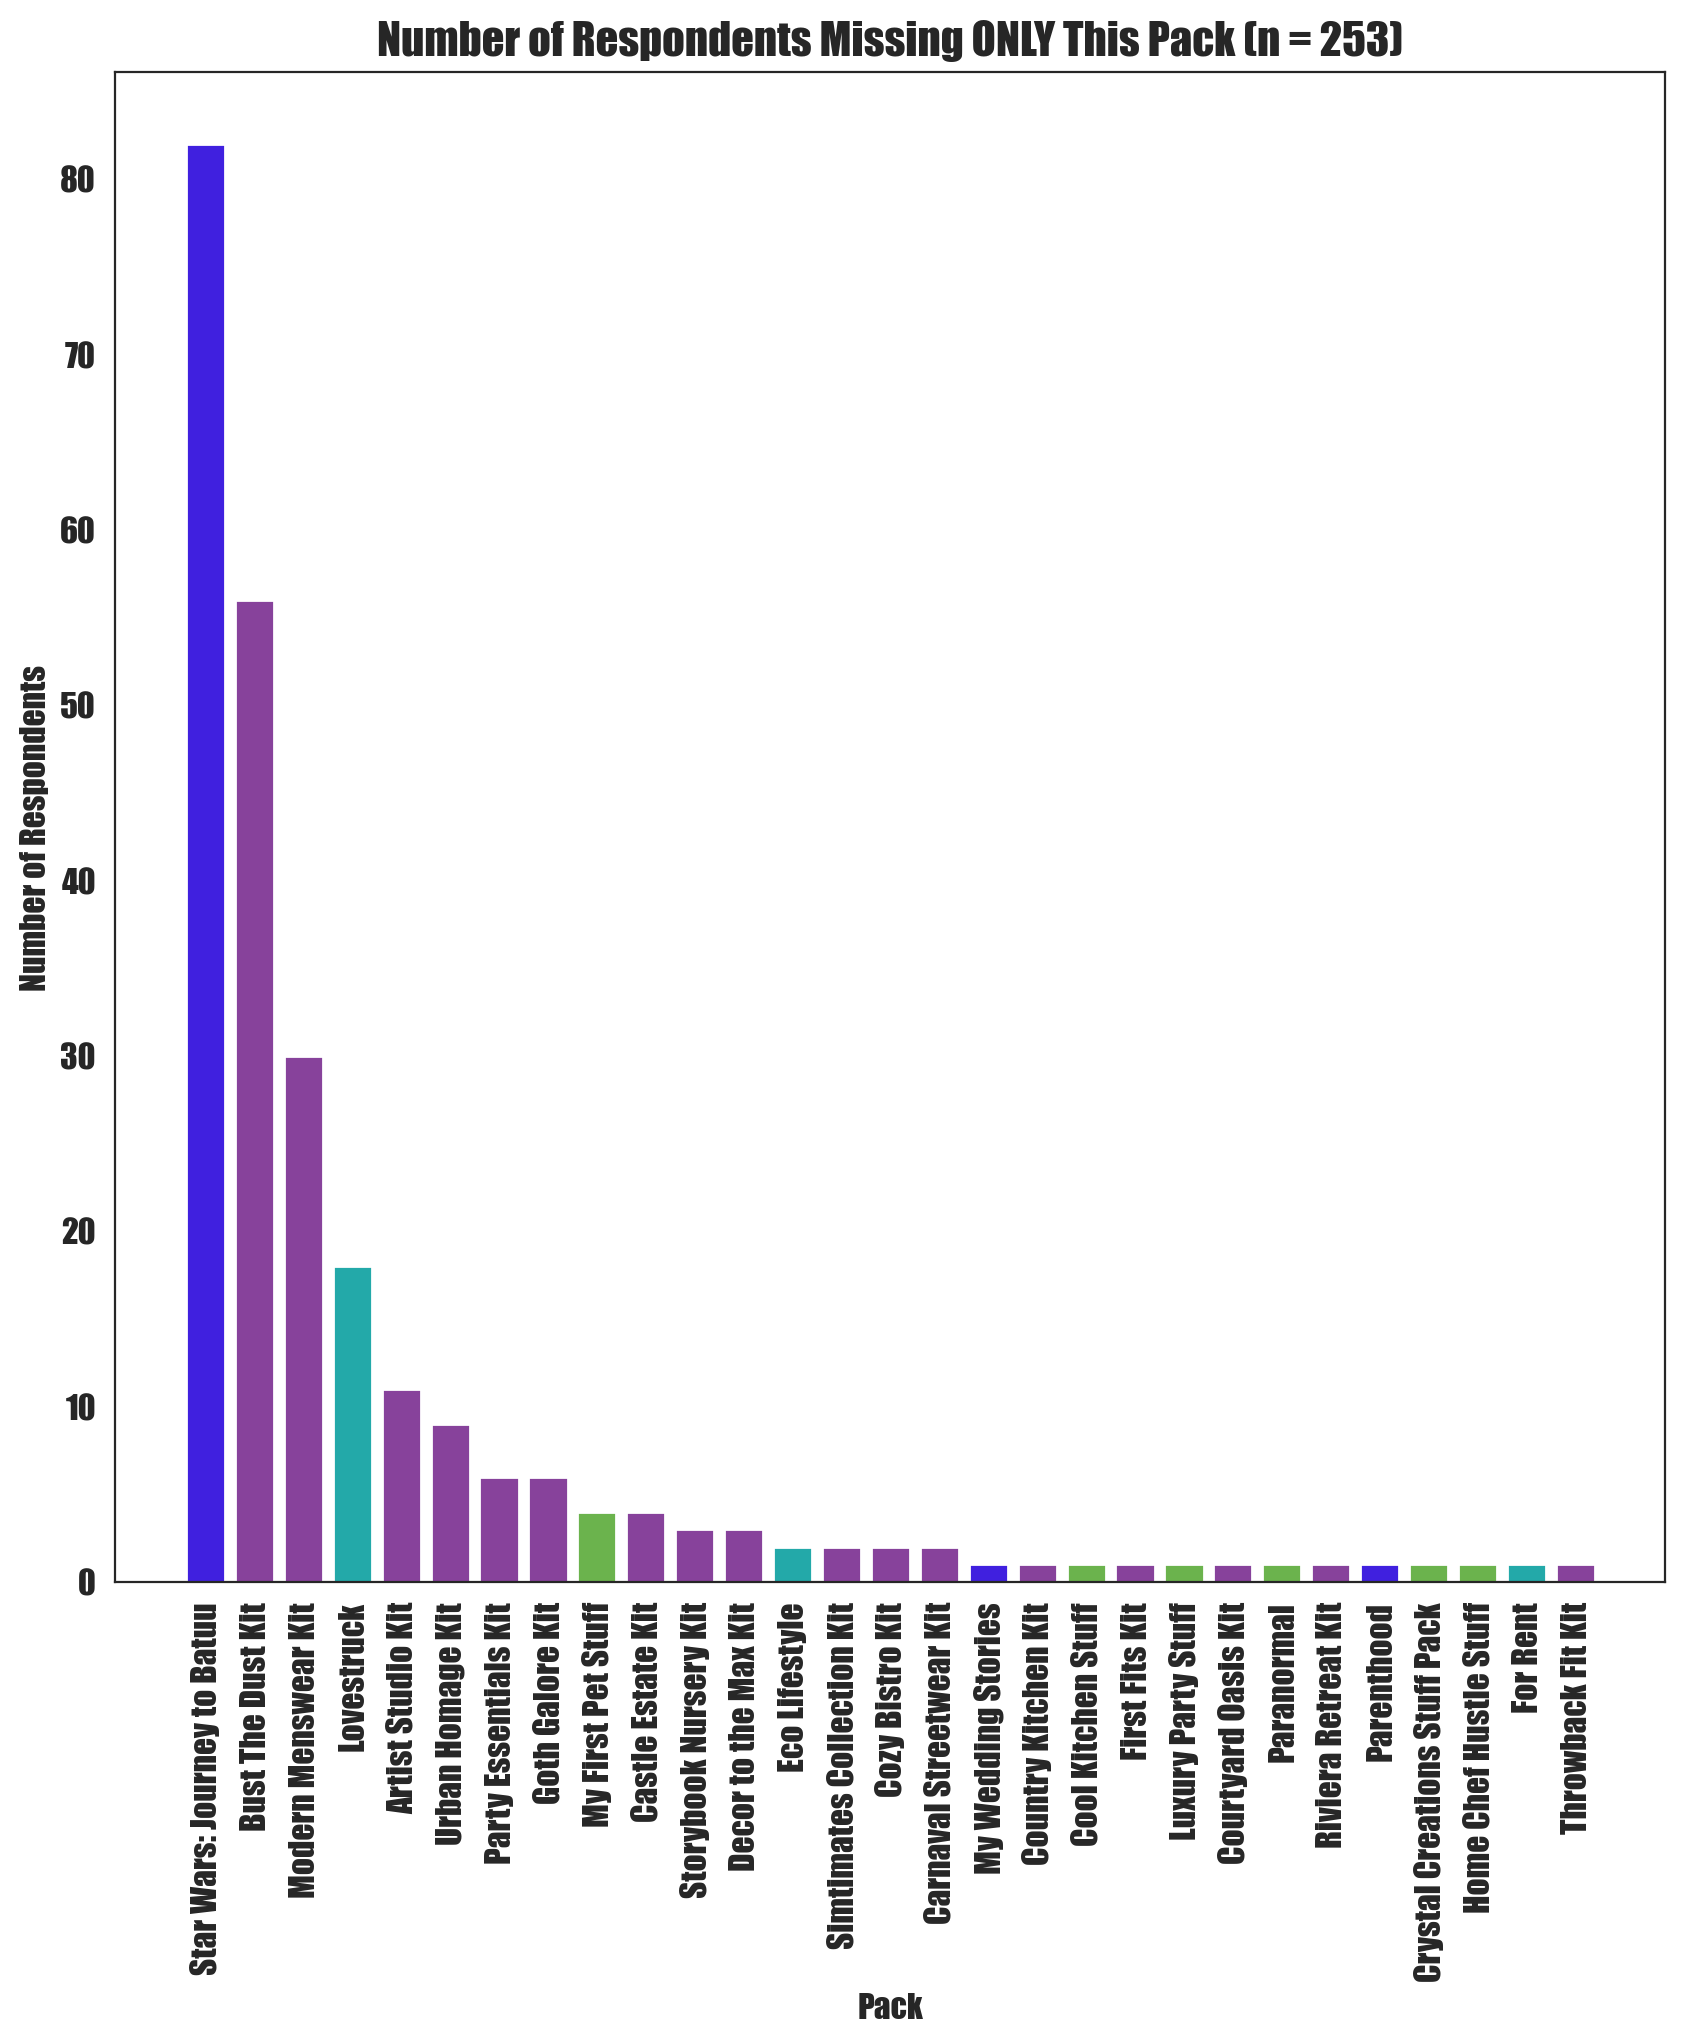

In [309]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 200)
sns.barplot(
    data = last_pack[last_pack['Num Missing'] > 0].reset_index(),
    x = 'pack name',
    y = 'Num Missing',
    palette = cmap_for_packs
)
# max_packs =  num_packs_owned.max()[0] + 1
# ax.set_xticks(range(0, max_packs, num_packs_owned.max()[0]//16))
# ax.set_xlim((0 - 0.5, max_packs - 0.5))

plt.xticks(rotation=90) 
ax.set_xlabel('Pack')
ax.set_ylabel('Number of Respondents')
ax.set_title(f'Number of Respondents Missing ONLY This Pack (n = {respondents})')
plt.savefig('images/hist_one_pack_missing.png', bbox_inches = 'tight')
plt.plot()

## Question 1 Updates

From Reddit / Members Video Followups:

1. "The thing that I would be curious about is the difference in rates between pc players and console players for owning g all dlc. I know I own all the packs, but I don't know if I would if I was on pc." (people mentioned being forced to get specific bundles on consoles which were cheaper

2. "the fact that lovestruck is the expansion that people who own all packs except 1 - wonder if this is a 'just haven't got round to buying it yet' thing, or 'i will never buy it' thing - I am in the second camp because the relationship decay is not for me." "Being a relatively new pack, Lovestruck hadn't gone on the full discount price yet when the survey opened, which a lot of people wait for. A lot of people probably either acquired it after doing the survey (during the winter sale), or will during another sale." 

3. From members video (similar to #2): Looks like so many people have <5 kits - what do you want to bet those ones are the ones that were free?

### 1.1 Of the people with ~<5 kits, how many of those were the ones that were free?

stacked bar with t/f for getting it free per kit

#### recalculate ownership using raw data, capturing if it was free or not

In [146]:
for_free_data = raw_data_all[raw_data_all['getpack'].isna()][
    ['survey_id', 'pack_type', 'pack_code', 'pack name', 'promo']
]
for_free_data

survey_id        pack_type pack_code              pack name  promo
1                1  Expansion Packs      EP02           Get Together      0
2                1  Expansion Packs      EP03            City Living      0
4                1  Expansion Packs      EP05                Seasons      0
5                1  Expansion Packs      EP06             Get Famous      0
7                1  Expansion Packs      EP08    Discover University      0
...            ...              ...       ...                    ...    ...
1227553      15155             Kits      SP55  Storybook Nursery Kit      0
1227554      15155             Kits      SP54      Artist Studio Kit      0
1227588      15156      Stuff Packs      SP06  Romantic Garden Stuff      1
1227590      15156      Stuff Packs      SP08         Backyard Stuff      1
1227596      15156      Stuff Packs      SP14     My First Pet Stuff      1

[662346 rows x 5 columns]

box plot of number of packs owned vs % free? (to look like previous plots, x is num of ownership)

Then also stacked bar graph, each is one pack with that pack's percent promo

hist of how many packs they BOUGHT (diff from my original plot, probably shifted)

In [193]:
num_owned_total = pd.DataFrame(
    for_free_data.groupby(['survey_id', 'pack_type'])['pack name'].count()
).rename(columns = {'pack name': 'total packs owned'})
count_got_free = pd.DataFrame(
    for_free_data.groupby(['survey_id', 'pack_type'])['promo'].sum()
).rename(columns = {'promo': 'number free'})
per_pack_type = pd.merge(
    left = num_owned_total,
    left_index = True,
    right = count_got_free,
    right_index = True
)
per_pack_type['Percent Free'] = per_pack_type['number free'] / per_pack_type['total packs owned']
per_pack_type['Purchased'] = per_pack_type['total packs owned'] -  per_pack_type['number free'] 
per_pack_type = per_pack_type.reset_index()
per_pack_type

survey_id        pack_type  total packs owned  number free  \
0              1  Expansion Packs                  6            0   
1              1             Kits                  1            1   
2              1      Stuff Packs                  2            1   
3              2  Expansion Packs                  9            0   
4              2       Game Packs                  4            0   
...          ...              ...                ...          ...   
58485      15155  Expansion Packs                 16            0   
58486      15155       Game Packs                 10            0   
58487      15155             Kits                 19            1   
58488      15155      Stuff Packs                 17            2   
58489      15156      Stuff Packs                  3            3   

       Percent Free  Purchased  
0          0.000000          6  
1          1.000000          0  
2          0.500000          1  
3          0.000000          9  
4          0.000000          4  
...             ...        ...  
58485      0.000000         16  
58486      0.000000         10  
58487      0.052632         18  
58488      0.117647         15  
58489      1.000000          0  

[58490 rows x 6 columns]

In [194]:
total_packs_free = per_pack_type.reset_index()[
    ['survey_id','total packs owned', 'number free']
].groupby('survey_id').sum()
total_packs_free['Percent Free'] = total_packs_free['number free'] / total_packs_free['total packs owned']
total_packs_free['Purchased'] = total_packs_free['total packs owned'] -  total_packs_free['number free'] 
total_packs_free

total packs owned  number free  Percent Free  Purchased
survey_id                                                         
1                          9            2      0.222222          7
2                         20            1      0.050000         19
3                         76            4      0.052632         72
4                         81            0      0.000000         81
5                         43            0      0.000000         43
...                      ...          ...           ...        ...
15152                     78            2      0.025641         76
15153                     23            0      0.000000         23
15154                     29            0      0.000000         29
15155                     62            3      0.048387         59
15156                      3            3      1.000000          0

[15156 rows x 4 columns]

81

#### boxplots per hist section (number of pack owners)

[]

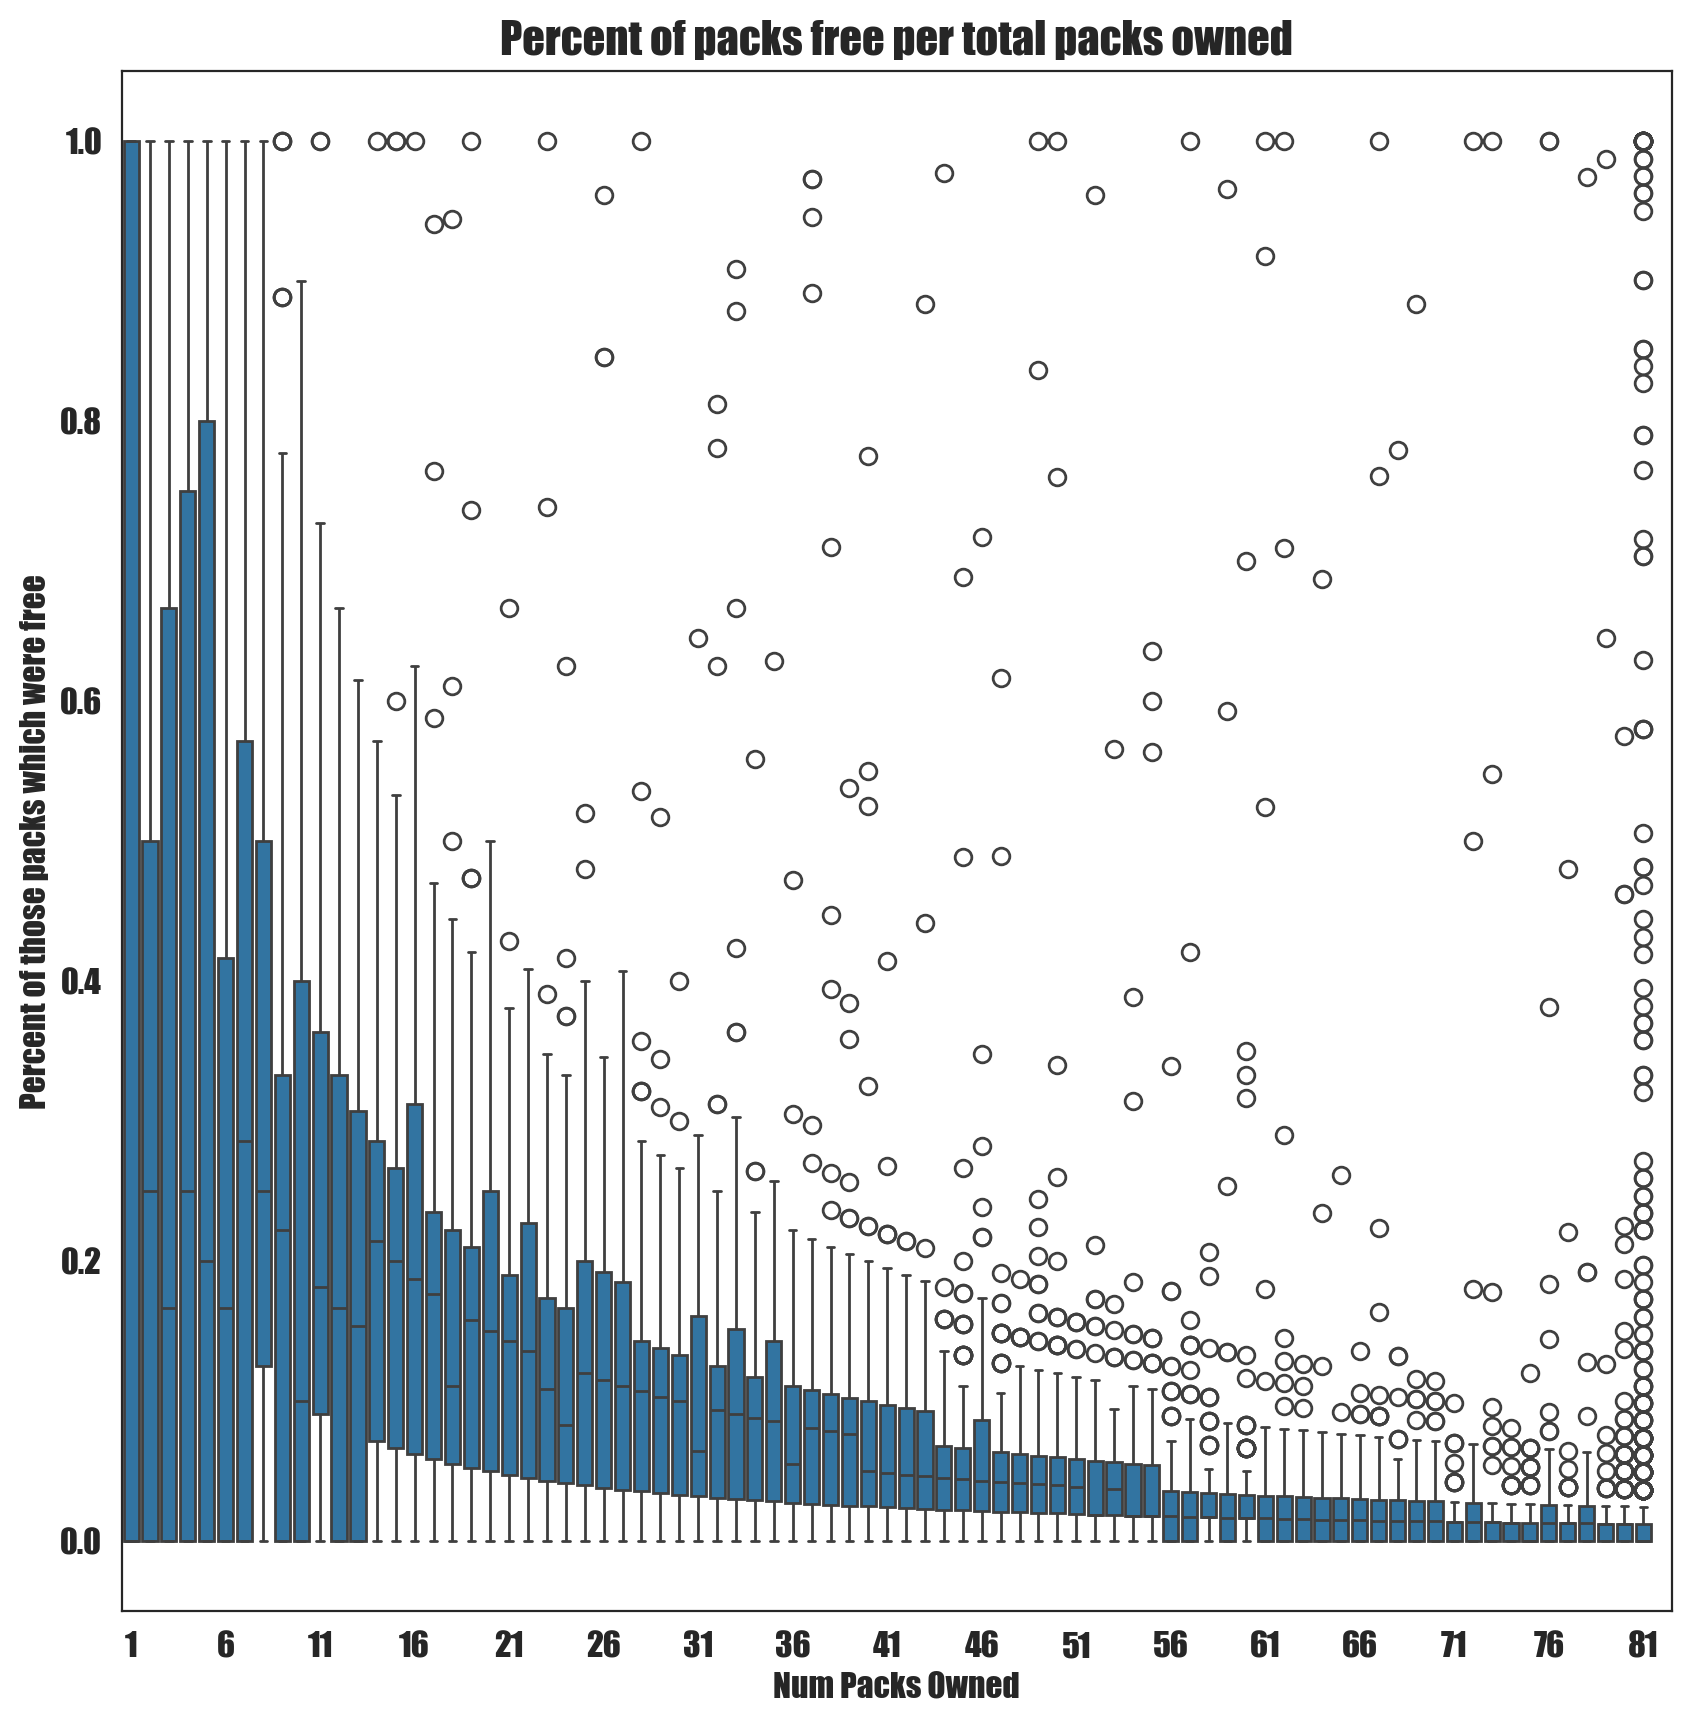

In [196]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 200)
sns.boxplot(
    total_packs_free,
    x = 'total packs owned',
    y = 'Percent Free',
    ax = ax
)
max_packs =  total_packs_free['total packs owned'].max() + 1
ax.set_xticks(range(0, max_packs, max_packs // 16))
ax.set_xlim((0 - 0.5, max_packs - 0.5))
ax.set_xlabel('Num Packs Owned')
ax.set_ylabel('Percent of those packs which were free')
ax.set_title('Percent of packs free per total packs owned')
plt.savefig('images/percent_free_total.png', bbox_inches = 'tight')
plt.plot()

In [195]:
total_packs_free[(total_packs_free['total packs owned'] == 81) 
     & (total_packs_free['number free'] == 81)]

total packs owned  number free  Percent Free  Purchased
survey_id                                                         
776                       81           81           1.0          0
2108                      81           81           1.0          0
3482                      81           81           1.0          0
4348                      81           81           1.0          0
5634                      81           81           1.0          0
6013                      81           81           1.0          0
6397                      81           81           1.0          0
7484                      81           81           1.0          0
8082                      81           81           1.0          0
8370                      81           81           1.0          0
8677                      81           81           1.0          0
8736                      81           81           1.0          0
9241                      81           81           1.0          0
10620                     81           81           1.0          0
11621                     81           81           1.0          0
11661                     81           81           1.0          0
13318                     81           81           1.0          0
13399                     81           81           1.0          0

In [210]:
total_packs_free[(total_packs_free['total packs owned'] == 81) 
     & (total_packs_free['number free'] == 81)].count()

total packs owned    18
number free          18
Percent Free         18
Purchased            18
dtype: int64

18 people said they got all 81 expansions on promo...

Are those 18 people fellow content creators who would get all packs direct from EA? Seems more likely it was a data error

I interpreted "promo" to mean "completely free". Maybe others interpreted it as "on any discount".

[]

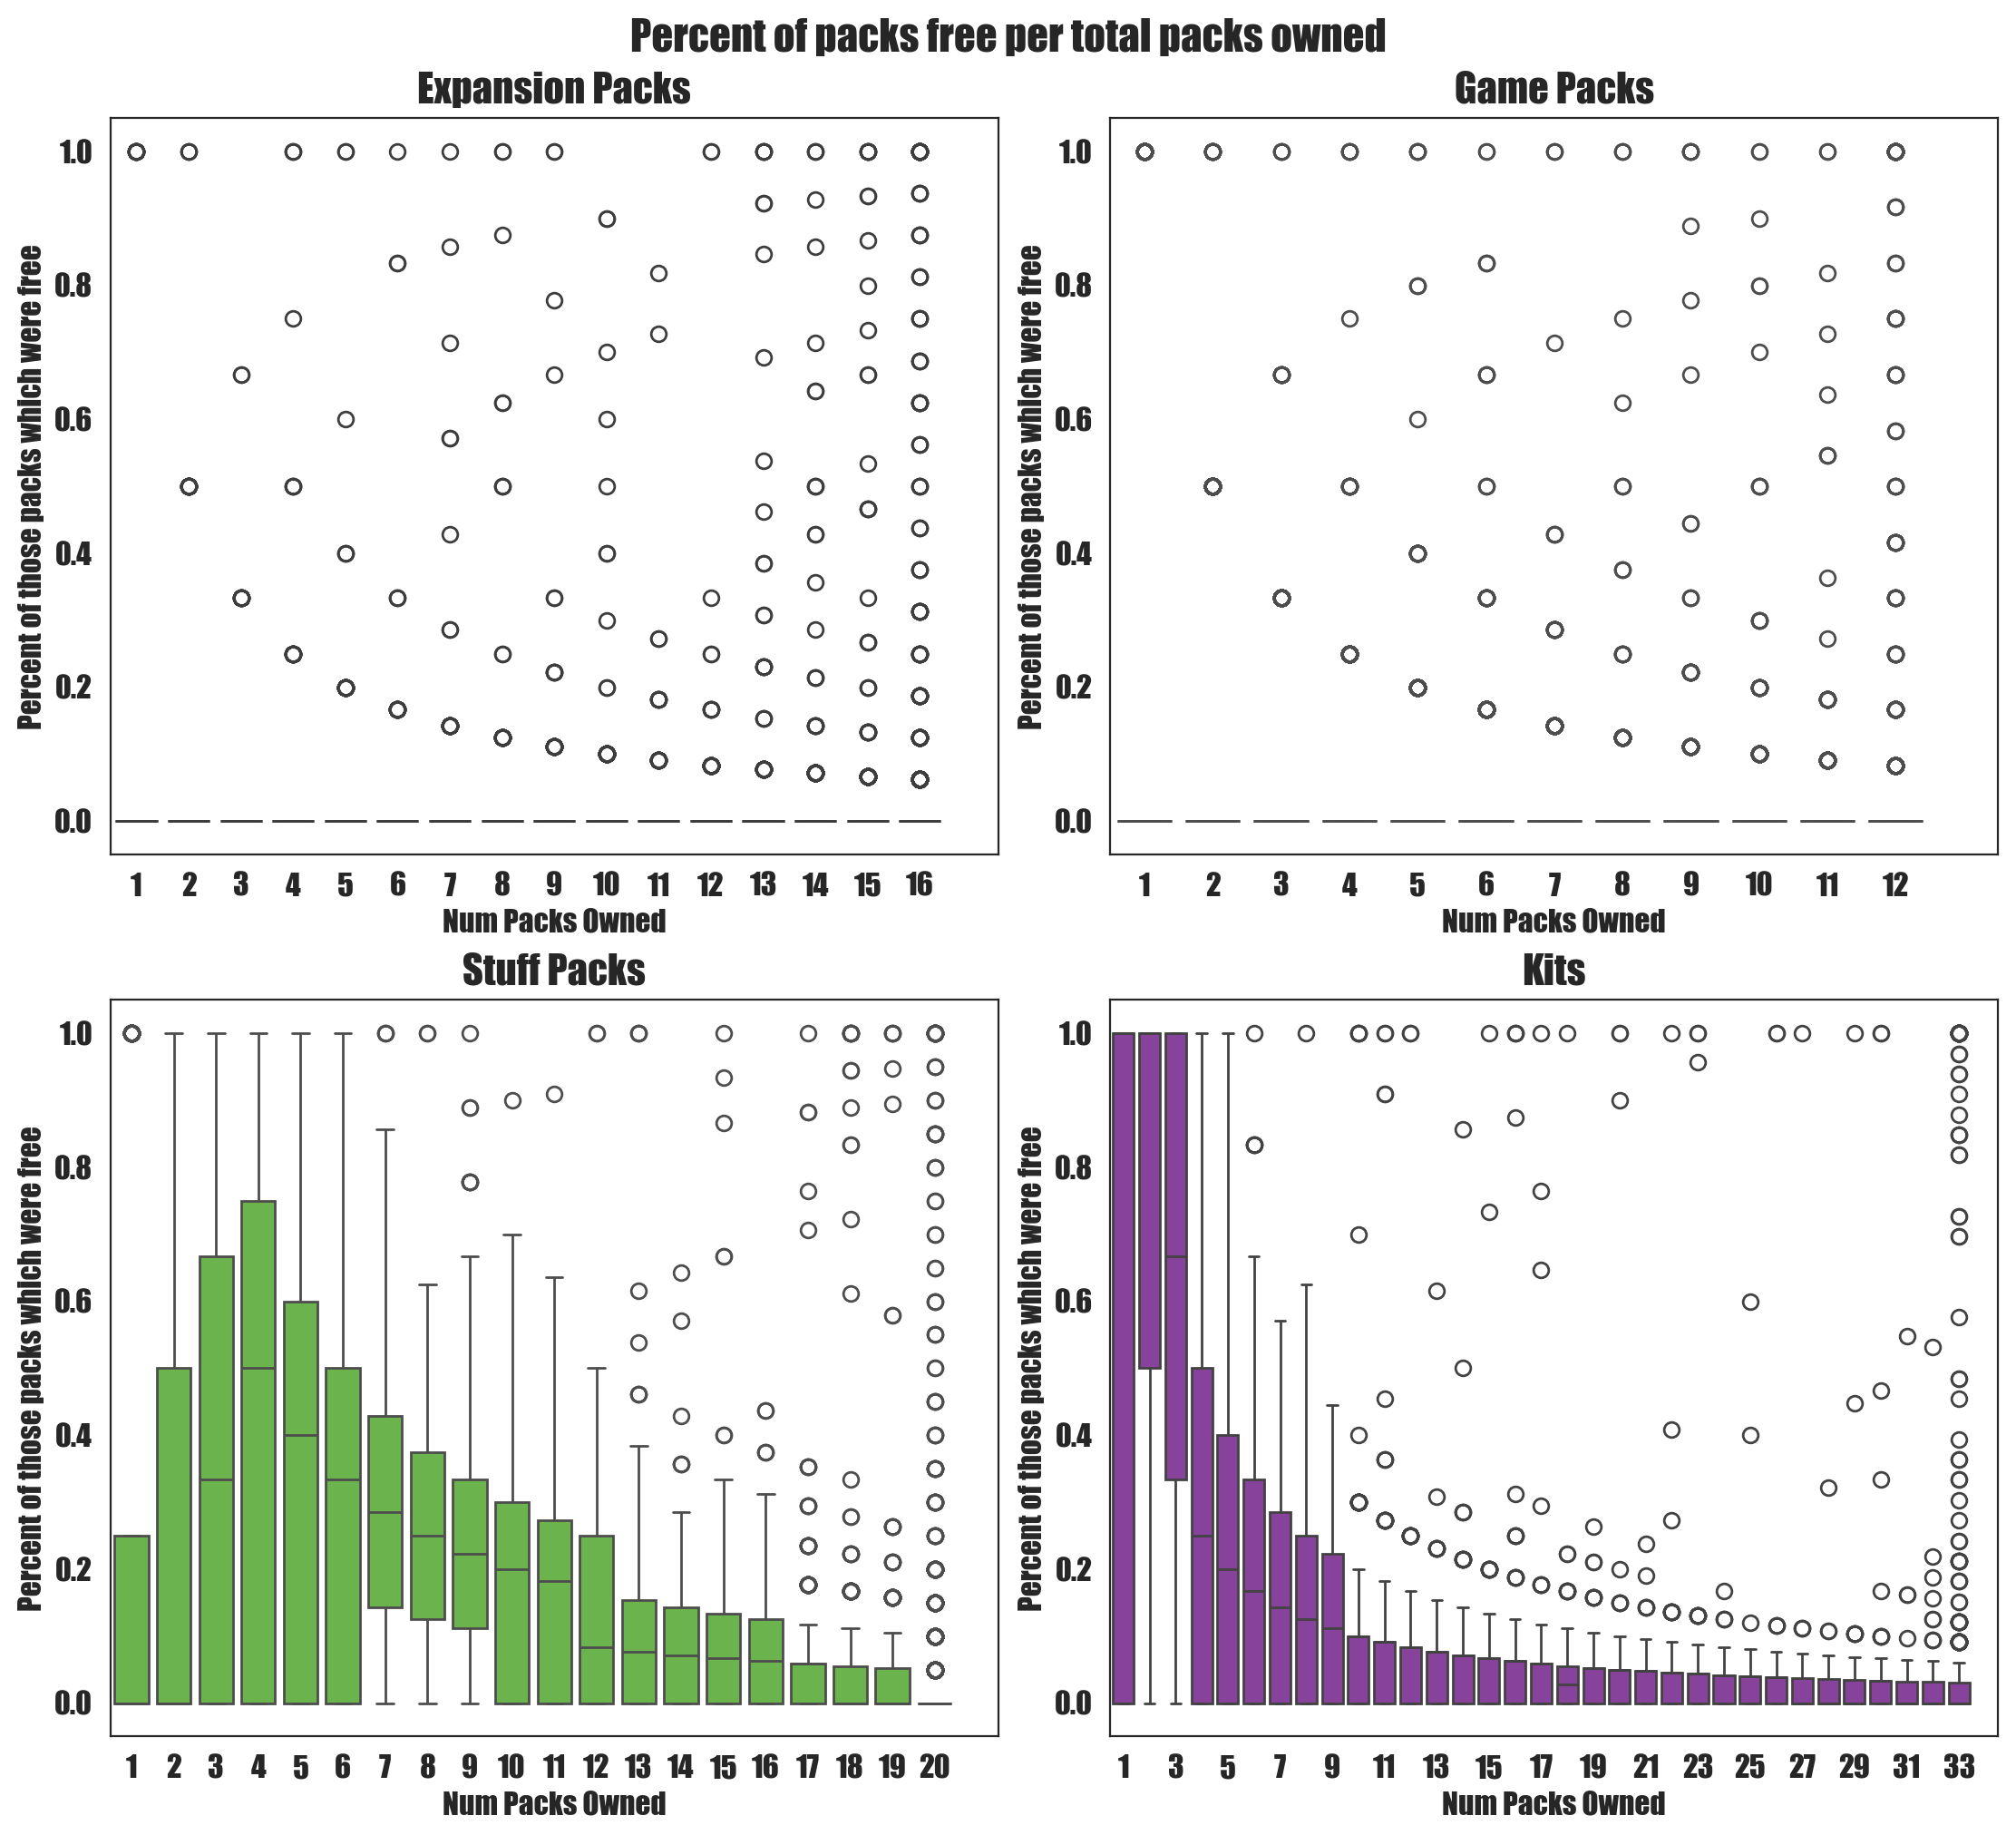

In [198]:
fig, axes = plt.subplots(
    figsize = (11,10), dpi = 200,
    nrows = 2, ncols = 2,
    constrained_layout = True
)

for i, pack_type in enumerate( pack_type_list ):
    ax = axes[
        i // 2,
        i % 2
    ]
    df = per_pack_type[per_pack_type['pack_type'] == pack_type]
    sns.boxplot(
        df,
        x = 'total packs owned',
        y = 'Percent Free',
        ax = ax,
        color = color_map[pack_type]
    )
    max_packs =  df['total packs owned'].max() + 1
    ax.set_xticks(range(0, max_packs, max_packs // 12))
    ax.set_xlim((0 - 0.5, max_packs - 0.5))
    ax.set_xlabel('Num Packs Owned')
    ax.set_ylabel('Percent of those packs which were free')
    ax.set_title(pack_type)

plt.suptitle('Percent of packs free per total packs owned')
# plt.subplots_adjust(hspace=0.3, wspace=0.3, top = 0.9)
plt.savefig('images/percent_free_box_bytype.png', bbox_inches = 'tight')
plt.plot()

#### hist of how many packs they BOUGHT 

(diff from my original plot, probably shifted)

In [199]:
per_pack_type

survey_id        pack_type  total packs owned  number free  \
0              1  Expansion Packs                  6            0   
1              1             Kits                  1            1   
2              1      Stuff Packs                  2            1   
3              2  Expansion Packs                  9            0   
4              2       Game Packs                  4            0   
...          ...              ...                ...          ...   
58485      15155  Expansion Packs                 16            0   
58486      15155       Game Packs                 10            0   
58487      15155             Kits                 19            1   
58488      15155      Stuff Packs                 17            2   
58489      15156      Stuff Packs                  3            3   

       Percent Free  Purchased  
0          0.000000          6  
1          1.000000          0  
2          0.500000          1  
3          0.000000          9  
4          0.000000          4  
...             ...        ...  
58485      0.000000         16  
58486      0.000000         10  
58487      0.052632         18  
58488      0.117647         15  
58489      1.000000          0  

[58490 rows x 6 columns]

[]

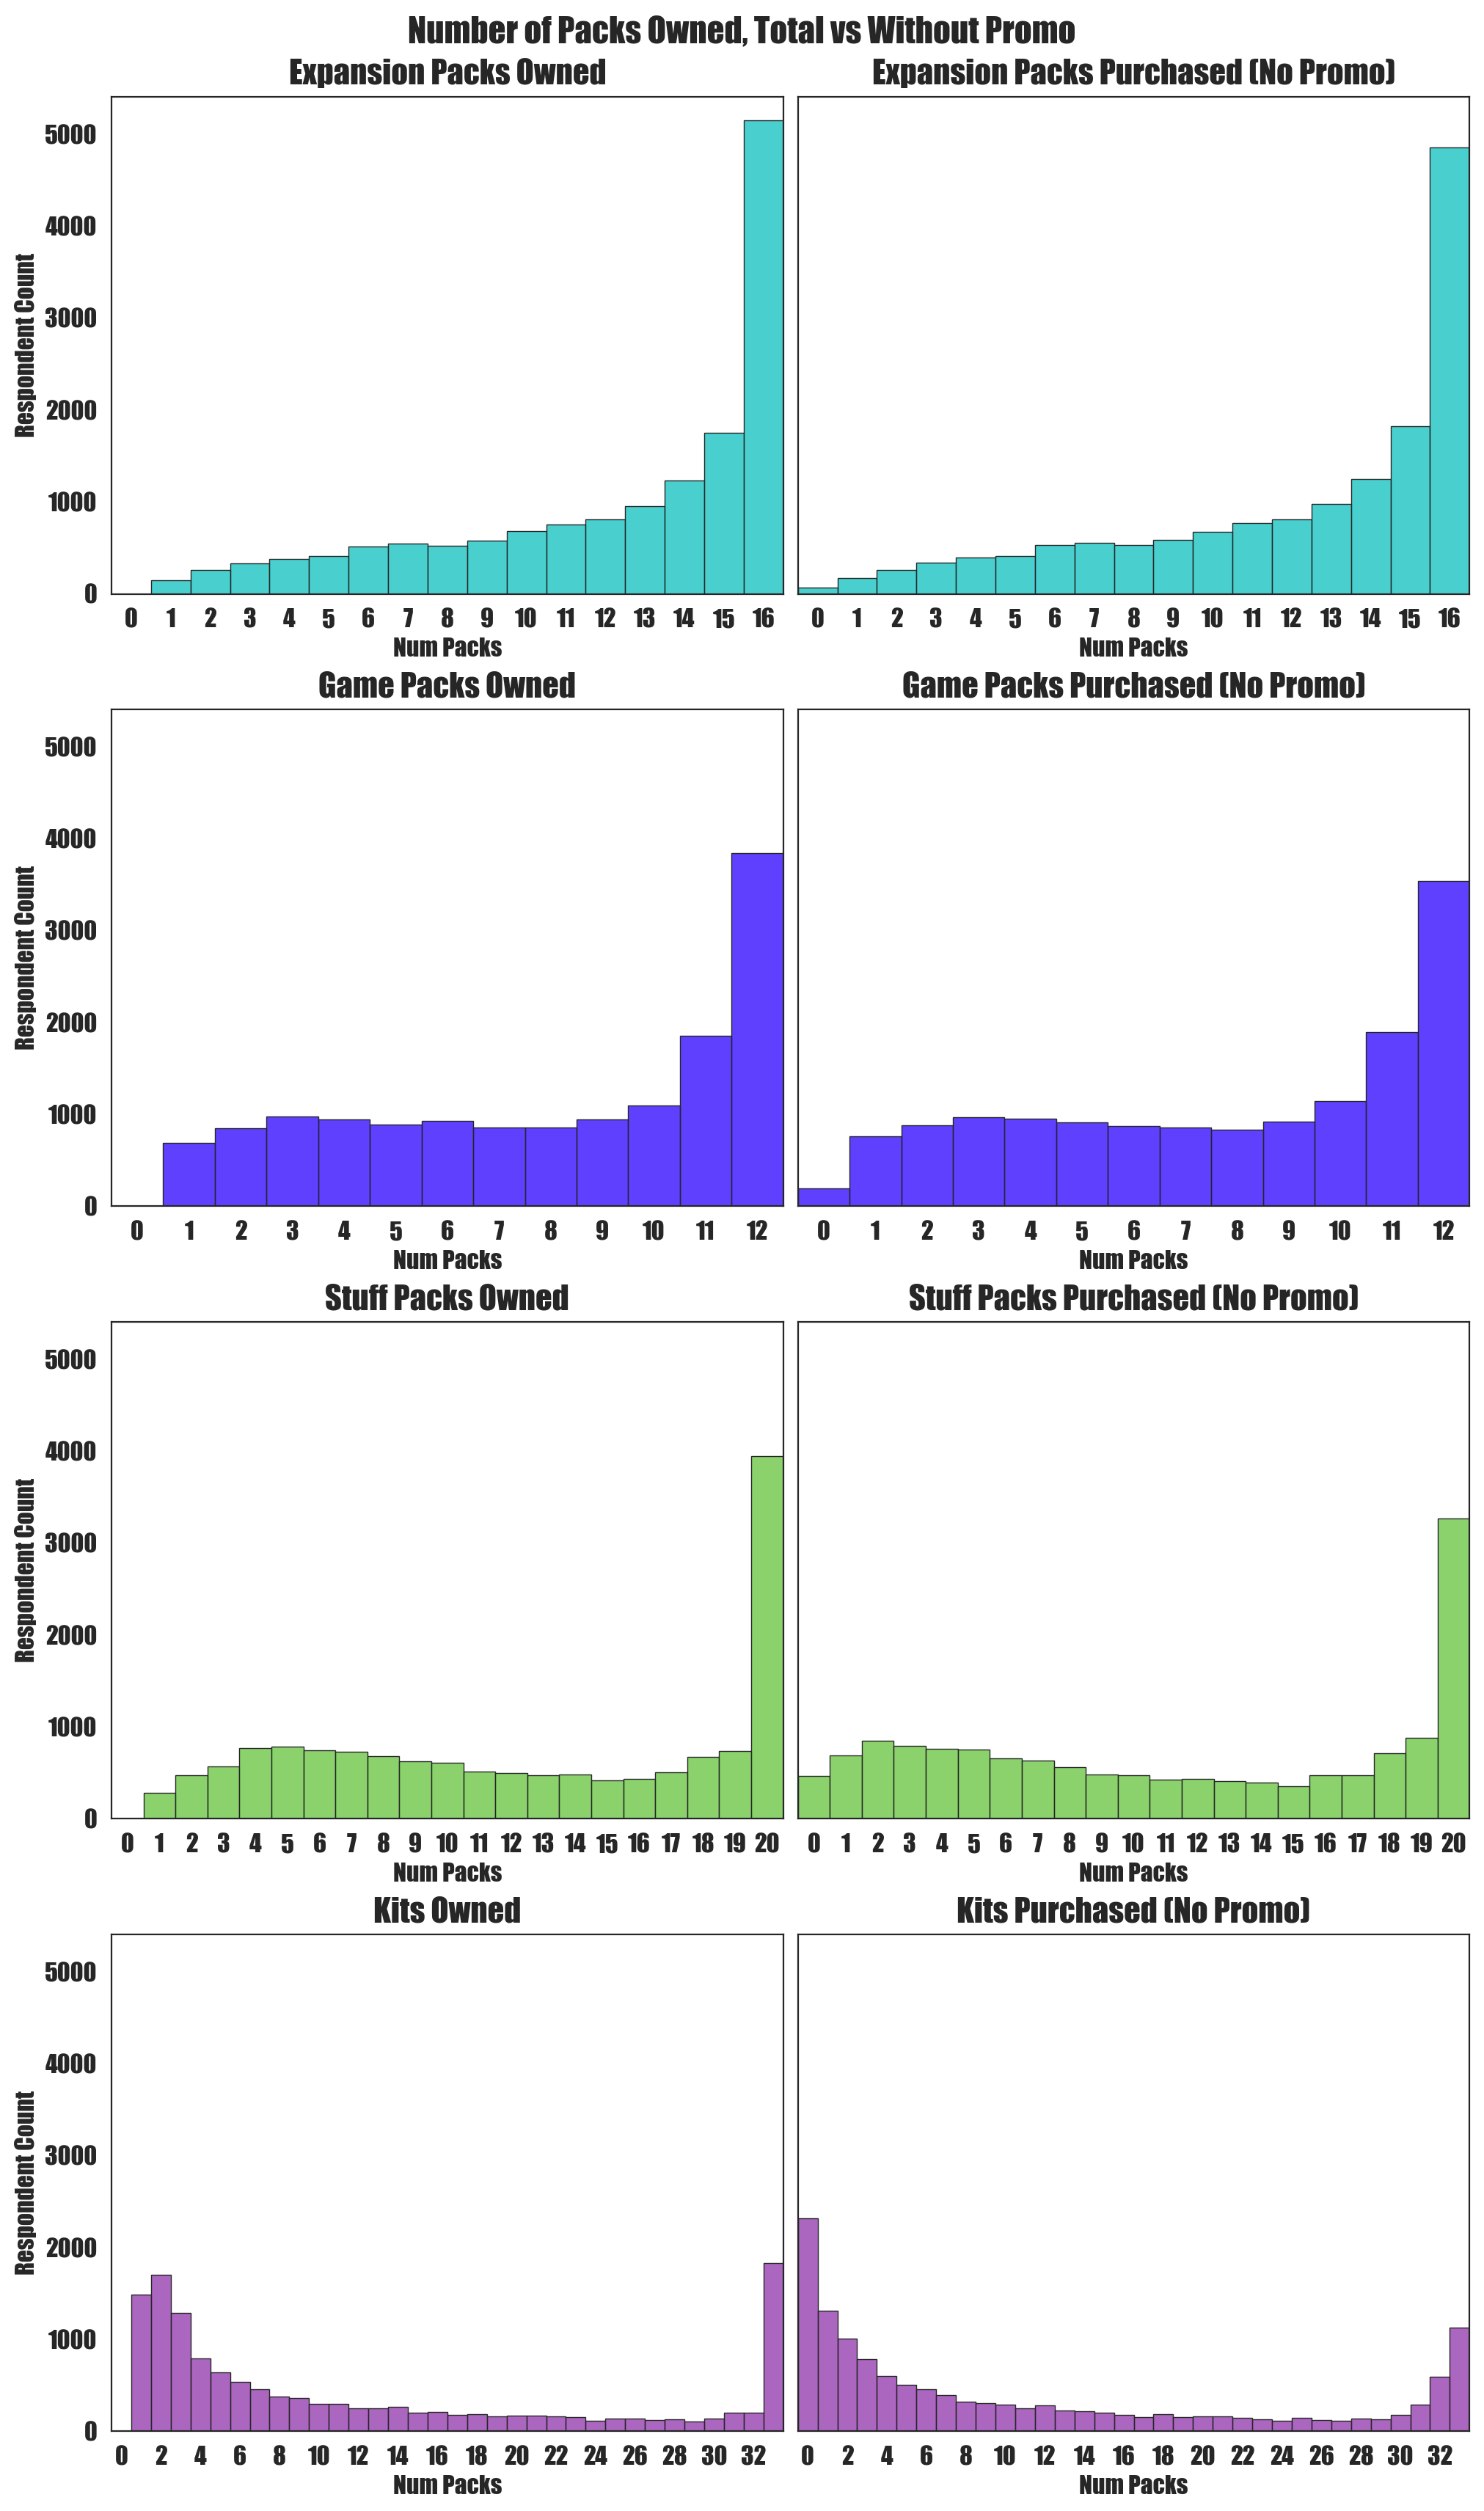

In [208]:
fig, axes = plt.subplots(
    figsize = (10,17), dpi = 200,
    nrows = 4, ncols = 2,
    sharey = True,
    constrained_layout = True
)

for i, pack_type in enumerate( pack_type_list ):
    # Add to the left the first histplot of total packs owned
    ax = axes[i, 0]
    df = per_pack_type[per_pack_type['pack_type'] == pack_type]
    sns.histplot(
        data = df,
        x = 'total packs owned',
        ax = ax,
        bins = df['total packs owned'].max(),
        legend = False,
        color = color_map[pack_type],
        edgecolor = color_map['gray'],
        linewidth = 0.5,
        discrete = True
    )
    ax.set_title(f'{pack_type} Owned')
    ax.set_xlabel('Num Packs')
    ax.set_ylabel('Respondent Count')
    max_packs = df['total packs owned'].max() + 1
    ax.set_xticks(range(0, max_packs, max_packs // 12))
    ax.set_xlim((-0.5, max_packs - 0.5))

    # add to the right number of packs gotten without promo
    ax = axes[i, 1]
    sns.histplot(
        data = df,
        x = 'Purchased',
        ax = ax,
        bins = df['total packs owned'].max(),
        legend = False,
        color = color_map[pack_type],
        edgecolor = color_map['gray'],
        linewidth = 0.5,
        discrete = True
    )
    ax.set_title(f'{pack_type} Purchased (No Promo)')
    ax.set_xlabel('Num Packs')
    ax.set_ylabel('Respondent Count')
    ax.set_xticks(range(0, max_packs,  max_packs // 12))
    ax.set_xlim((-0.5, max_packs - 0.5))

plt.suptitle('Number of Packs Owned, Total vs Without Promo')
# plt.subplots_adjust(hspace=0.3, wspace=0.3, top = 0.9)
plt.savefig('images/hists_bought_vs_total.png', bbox_inches = 'tight')
plt.plot()

I'm missing zeroes on the right because I took those out to calc whether a pack was free or not. The promo column was 0 and 1 across the board instead of nulls when the pack wasn't purchased. This could be fixed by pulling the data differently..

#### Per pack, % promo

In [211]:
for_free_data

survey_id        pack_type pack_code              pack name  promo
1                1  Expansion Packs      EP02           Get Together      0
2                1  Expansion Packs      EP03            City Living      0
4                1  Expansion Packs      EP05                Seasons      0
5                1  Expansion Packs      EP06             Get Famous      0
7                1  Expansion Packs      EP08    Discover University      0
...            ...              ...       ...                    ...    ...
1227553      15155             Kits      SP55  Storybook Nursery Kit      0
1227554      15155             Kits      SP54      Artist Studio Kit      0
1227588      15156      Stuff Packs      SP06  Romantic Garden Stuff      1
1227590      15156      Stuff Packs      SP08         Backyard Stuff      1
1227596      15156      Stuff Packs      SP14     My First Pet Stuff      1

[662346 rows x 5 columns]

In [222]:
promo = for_free_data.groupby('pack name')[['promo']].sum().sort_values('promo')
total = for_free_data.groupby('pack name')[['promo']].count().rename(columns = {'promo': 'total'})
per_pack_promo = pd.merge(
    left = total,
    left_index = True,
    right = promo,
    right_index = True
).sort_values('promo')
per_pack_promo['not promo'] = per_pack_promo['total'] - per_pack_promo['promo']
# add back in the pack info
per_pack_promo = pd.merge(
    left = pack_info,
    left_on = 'pack name',
    right = per_pack_promo,
    right_index = True
)
per_pack_promo

pack_type release date pack_id              pack name  total  promo  \
0   Expansion Packs   03/31/2015    EP01            Get To Work  12478    284   
1   Expansion Packs   12/08/2015    EP02           Get Together  12332    148   
2   Expansion Packs   11/01/2016    EP03            City Living  13522    160   
3   Expansion Packs   11/10/2017    EP04            Cats & Dogs  13833    182   
4   Expansion Packs   06/22/2018    EP05                Seasons  14295    172   
..              ...          ...     ...                    ...    ...    ...   
77             Kits   04/18/2024    SP51   Party Essentials Kit   3399     91   
78             Kits   05/30/2024    SP52    Riviera Retreat Kit   4171    112   
79             Kits   05/30/2024    SP53        Cozy Bistro Kit   4140     88   
80             Kits   09/19/2024    SP54      Artist Studio Kit   4231     80   
81             Kits   09/19/2024    SP55  Storybook Nursery Kit   4652     95   

    not promo  
0       12194  
1       12184  
2       13362  
3       13651  
4       14123  
..        ...  
77       3308  
78       4059  
79       4052  
80       4151  
81       4557  

[81 rows x 7 columns]

[]

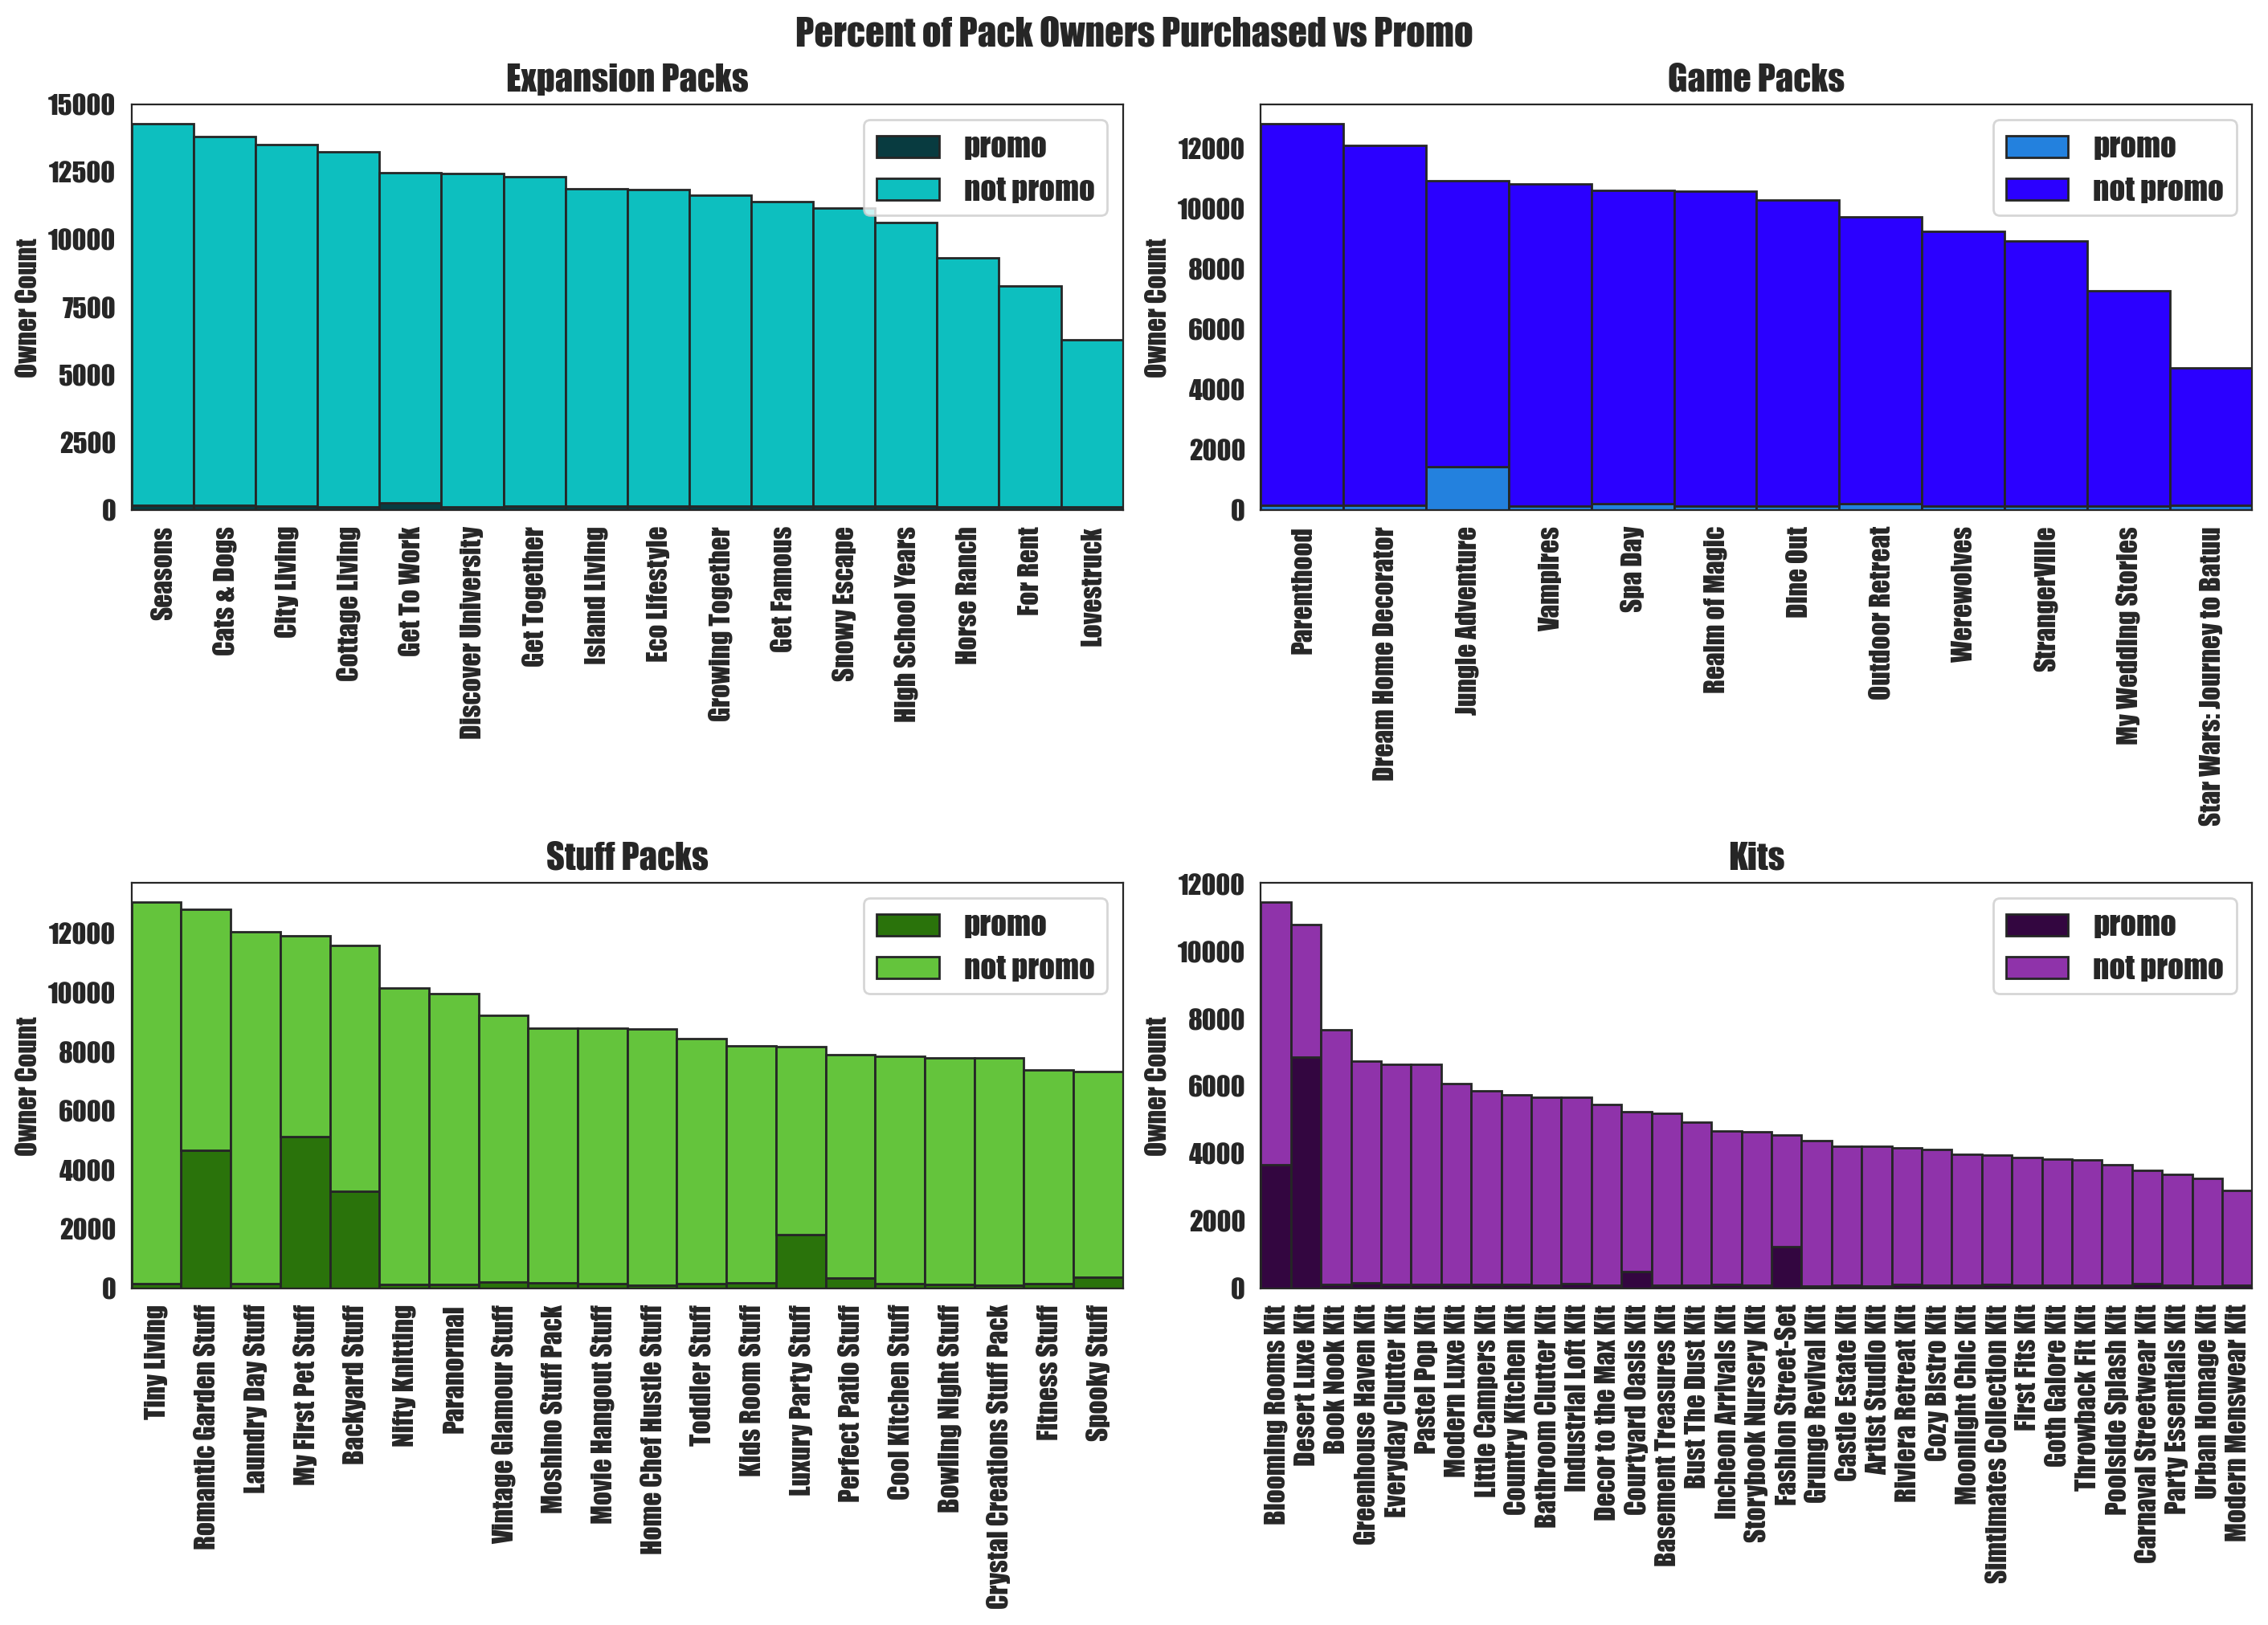

In [253]:
to_plot = per_pack_promo.sort_values('total', ascending = False
                                    ).drop('total', axis = 1
                                          ).set_index('pack name')

fig, axes = plt.subplots(
    figsize = (14,10), dpi = 200,
    nrows = 2, ncols = 2,
    constrained_layout = True
)

for i, pack_type in enumerate( pack_type_list ):
    ax = axes[
        i // 2,
        i % 2
    ]
    df = to_plot[to_plot['pack_type'] == pack_type]
    df.plot.bar(
        stacked = True,
        color = {'not promo': color_map[pack_type],
                 'promo': color_map[f'{pack_type}_dark']},
        ax = ax,
        width = 1,
        edgecolor = color_map['gray']
    )
    ax.set_title(pack_type)
    ax.set_ylabel('Owner Count')
    max_packs = df.shape[0]
    ax.set_xlim((-0.5, max_packs - 0.5))
    ax.set_xlabel('')

plt.suptitle('Percent of Pack Owners Purchased vs Promo')
# plt.subplots_adjust(hspace=0.3, wspace=0.3, top = 0.9)
plt.xticks(rotation=90) 
plt.savefig('images/packs_PROMO_hist_by_type.png', bbox_inches = 'tight')
plt.plot()

#### of people with <= 3 kits, ranking and % promo of those kits 

In [261]:
num_packs = for_free_data.groupby(['survey_id', 'pack_type'])['pack name'].count().reset_index()
lt_3_kits_list = num_packs[ 
                        (num_packs['pack_type'] == 'Kits') & 
                        (num_packs['pack name'] <= 3) 
                        ] ['survey_id'].to_list()
len(lt_3_kits_list)

4482

In [267]:
lt_3_data = for_free_data[
                (for_free_data['survey_id'].isin(lt_3_kits_list)) &
                (for_free_data['pack_type'] == 'Kits')
            ]
lt_3_data.shape

(8764, 5)

In [268]:
promo = lt_3_data.groupby('pack name')[['promo']].sum().sort_values('promo')
total = lt_3_data.groupby('pack name')[['promo']].count().rename(columns = {'promo': 'total'})
per_pack_promo_kits = pd.merge(
    left = total,
    left_index = True,
    right = promo,
    right_index = True
).sort_values('promo')
per_pack_promo_kits['not promo'] = per_pack_promo_kits['total'] - per_pack_promo_kits['promo']
# add back in the pack info
per_pack_promo_kits = pd.merge(
    left = pack_info,
    left_on = 'pack name',
    right = per_pack_promo_kits,
    right_index = True,
    how = 'right'
)
per_pack_promo_kits

pack_type release date pack_id                  pack name  total  promo  \
67      Kits   01/19/2023    SP39       Bathroom Clutter Kit     42      0   
72      Kits   09/07/2023    SP44        Poolside Splash Kit      4      0   
62      Kits   09/01/2022    SP34             First Fits Kit     12      0   
79      Kits   05/30/2024    SP53            Cozy Bistro Kit     13      0   
76      Kits   04/18/2024    SP50           Urban Homage Kit     13      1   
81      Kits   09/19/2024    SP55      Storybook Nursery Kit     97      1   
56      Kits   12/02/2021    SP28        Modern Menswear Kit      7      1   
61      Kits   05/26/2022    SP33         Little Campers Kit    123      1   
74      Kits   01/18/2024    SP47          Castle Estate Kit     82      1   
70      Kits   06/01/2023    SP42         Grunge Revival Kit     46      1   
77      Kits   04/18/2024    SP51       Party Essentials Kit     12      2   
80      Kits   09/19/2024    SP54          Artist Studio Kit     38      2   
75      Kits   01/18/2024    SP48            Goth Galore Kit     75      2   
59      Kits   03/21/2022    SP31       Decor to the Max Kit     65      2   
65      Kits   11/10/2022    SP37       Everyday Clutter Kit    153      3   
69      Kits   04/20/2023    SP41     Basement Treasures Kit     48      3   
66      Kits   01/19/2023    SP38  Simtimates Collection Kit     42      3   
49      Kits   03/02/2021    SP20          Throwback Fit Kit     32      4   
50      Kits   03/02/2021    SP21        Country Kitchen Kit    134      4   
60      Kits   05/26/2022    SP32         Moonlight Chic Kit     27      4   
78      Kits   05/30/2024    SP52        Riviera Retreat Kit     26      6   
64      Kits   11/10/2022    SP36             Pastel Pop Kit    191      6   
73      Kits   09/07/2023    SP45            Modern Luxe Kit    121      7   
54      Kits   08/26/2021    SP25        Industrial Loft Kit    100      8   
71      Kits   06/01/2023    SP43              Book Nook Kit    351      9   
51      Kits   03/02/2021    SP22          Bust The Dust Kit    327     12   
55      Kits   10/05/2021    SP26       Incheon Arrivals Kit     85     15   
58      Kits   02/03/2022    SP30    Carnaval Streetwear Kit     28     16   
68      Kits   04/20/2023    SP40       Greenhouse Haven Kit    225     28   
52      Kits   05/18/2021    SP23        Courtyard Oasis Kit    259    135   
53      Kits   10/05/2021    SP24         Fashion Street-Set    498    469   
57      Kits   11/09/2021    SP29         Blooming Rooms Kit   2860   2118   
63      Kits   09/14/2022    SP35            Desert Luxe Kit   2628   2308   

    not promo  
67         42  
72          4  
62         12  
79         13  
76         12  
81         96  
56          6  
61        122  
74         81  
70         45  
77         10  
80         36  
75         73  
59         63  
65        150  
69         45  
66         39  
49         28  
50        130  
60         23  
78         20  
64        185  
73        114  
54         92  
71        342  
51        315  
55         70  
58         12  
68        197  
52        124  
53         29  
57        742  
63        320

[]

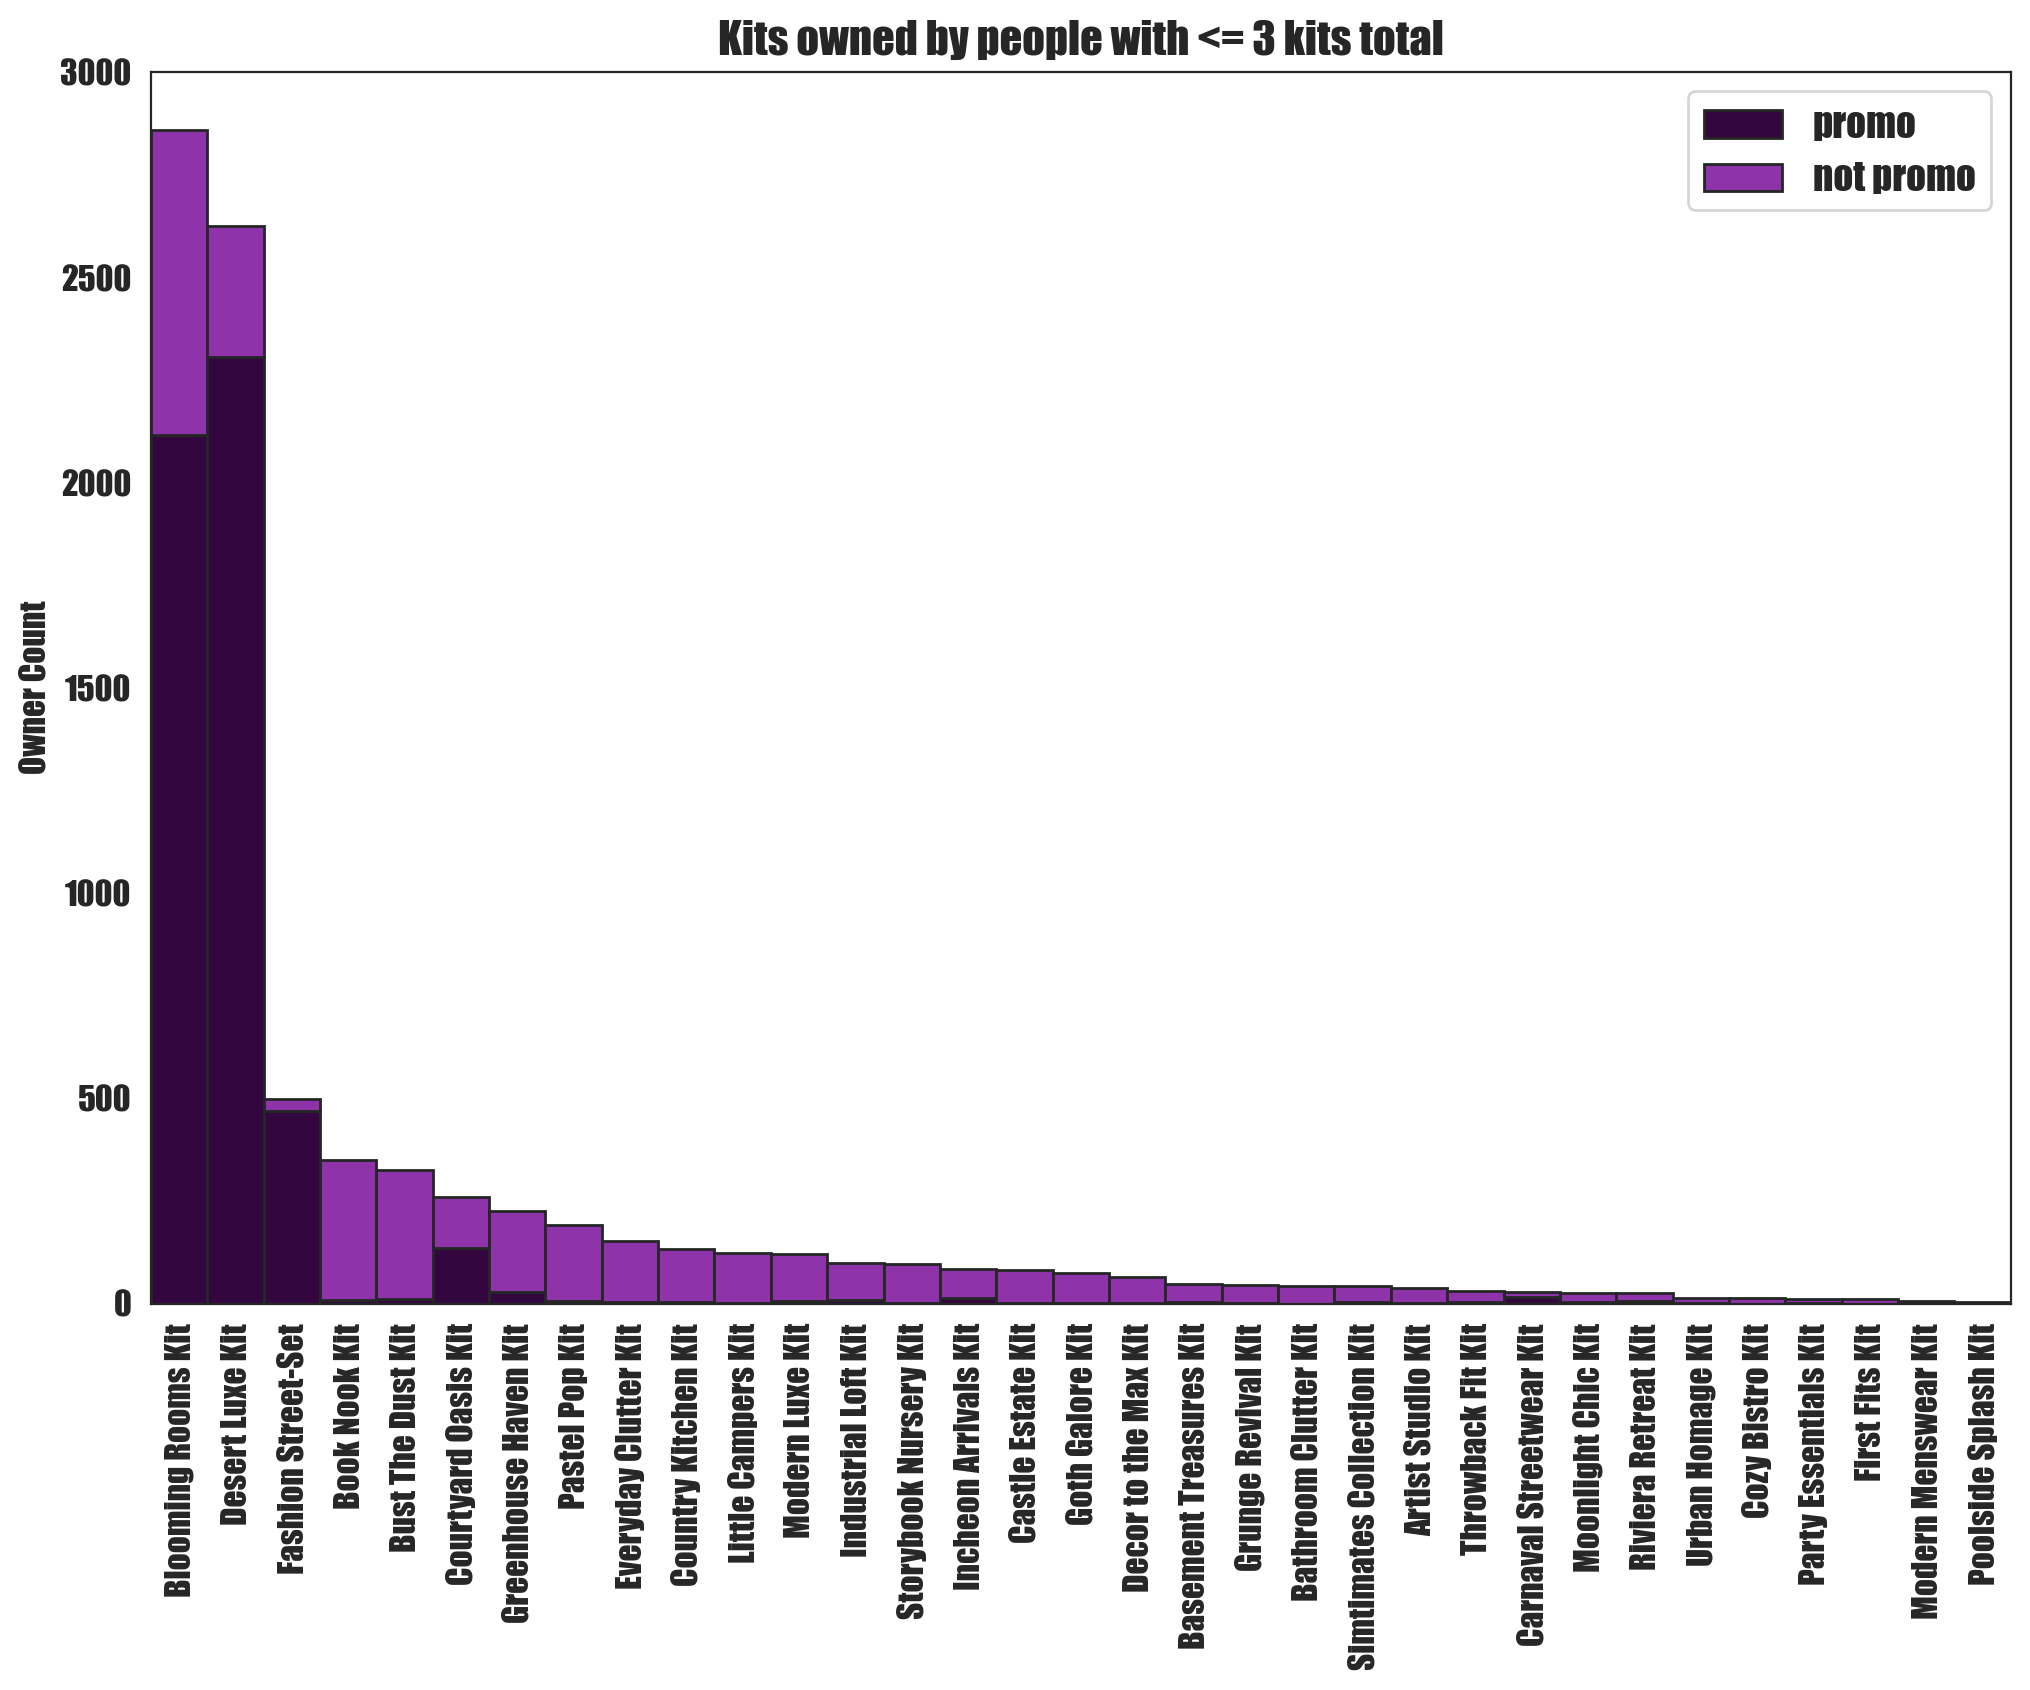

In [272]:
to_plot = per_pack_promo_kits.sort_values('total', ascending = False
                                    ).drop('total', axis = 1
                                          ).set_index('pack name')
fig, ax = plt.subplots(figsize = (12,8), dpi = 200)

to_plot.plot.bar(
    stacked = True,
    color = {'not promo': color_map['Kits'],
             'promo': color_map[f'Kits_dark']},
    ax = ax,
    width = 1,
    edgecolor = color_map['gray']
)
ax.set_title('Kits owned by people with <= 3 kits total')
ax.set_ylabel('Owner Count')
max_packs = df.shape[0]
ax.set_xlim((-0.5, max_packs - 0.5))
ax.set_xlabel('')
plt.savefig('images/kits_lt_3_promo.png')
plt.plot()

In [331]:
def plot_pack_ownership_promo(df, pack_type = 'Kits', max_owned = 3, savename = '', display=True):
    '''
    Do like the above, but make it flexible. Takes one pack type, and a designed max num owned
    and plots the packs from most owned to least
    '''
    # prep data
    num_packs = df.groupby(['survey_id', 'pack_type'])['pack name'].count().reset_index()
    # isolate which survey respondents had that many responses
    lt_3_kits_list = num_packs[ 
                            (num_packs['pack_type'] == pack_type) & 
                            (num_packs['pack name'] <= max_owned) 
                            ] ['survey_id'].to_list()
    num_people = len(lt_3_kits_list)
    lt_3_data = df[
                    (df['survey_id'].isin(lt_3_kits_list)) &
                    (df['pack_type'] == pack_type)
                ]
    max_packs = len(set(df[df['pack_type'] == pack_type]['pack name'].to_list()))
    if max_owned > max_packs:
        return f'too many {pack_type} requested, only {max_packs} available'
                    
    # count those packs
    promo = lt_3_data.groupby('pack name')[['promo']].sum().sort_values('promo')
    total = lt_3_data.groupby('pack name')[['promo']].count().rename(columns = {'promo': 'total'})
    per_pack_promo_kits = pd.merge(
        left = total,
        left_index = True,
        right = promo,
        right_index = True
    ).sort_values('promo')
    
    per_pack_promo_kits['not promo'] = per_pack_promo_kits['total'] - per_pack_promo_kits['promo']
    # add back in the pack info
    per_pack_promo_kits = pd.merge(
        left = pack_info,
        left_on = 'pack name',
        right = per_pack_promo_kits,
        right_index = True,
        how = 'right'
    )
    # PLOT
    to_plot = per_pack_promo_kits.sort_values('total', ascending = False
                                ).drop('total', axis = 1
                                      ).set_index('pack name')
    fig, ax = plt.subplots(figsize = (12,8), dpi = 200)
    
    to_plot.plot.bar(
        stacked = True,
        color = {'not promo': color_map[pack_type],
                 'promo': color_map[f'{pack_type}_dark']},
        ax = ax,
        width = 1,
        edgecolor = color_map['gray']
    )
    ax.set_title(f'{pack_type} owned by people with <= {max_owned} {pack_type} total (n = {num_people})')
    ax.set_ylabel('Owner Count')
    ax.set_xlim((-0.5, max_packs - 0.5))
    ax.set_xlabel('')
    if savename:
        plt.savefig(savename, bbox_inches = 'tight')
        print(f'Saved {savename}')
    if display:
        plt.plot()
    else:
        plt.close()
    return 

In [332]:
plot_pack_ownership_promo(for_free_data, 'Kits', 12, display = False)

In [333]:
os.makedirs('images/per_ownership_promo/', exist_ok = True)

for pack_type in pack_type_list:
    print(pack_type)
    for i in range(1,34):
        savename = f'images/per_ownership_promo/{pack_type.split(" ")[0]}_{i}.png'.lower()
        plot_pack_ownership_promo(for_free_data, pack_type, i, savename, display = False)

Expansion Packs
Saved images/per_ownership_promo/expansion_1.png
Saved images/per_ownership_promo/expansion_2.png
Saved images/per_ownership_promo/expansion_3.png
Saved images/per_ownership_promo/expansion_4.png
Saved images/per_ownership_promo/expansion_5.png
Saved images/per_ownership_promo/expansion_6.png
Saved images/per_ownership_promo/expansion_7.png
Saved images/per_ownership_promo/expansion_8.png
Saved images/per_ownership_promo/expansion_9.png
Saved images/per_ownership_promo/expansion_10.png
Saved images/per_ownership_promo/expansion_11.png
Saved images/per_ownership_promo/expansion_12.png
Saved images/per_ownership_promo/expansion_13.png
Saved images/per_ownership_promo/expansion_14.png
Saved images/per_ownership_promo/expansion_15.png
Saved images/per_ownership_promo/expansion_16.png
Game Packs
Saved images/per_ownership_promo/game_1.png
Saved images/per_ownership_promo/game_2.png
Saved images/per_ownership_promo/game_3.png
Saved images/per_ownership_promo/game_4.png
Saved 

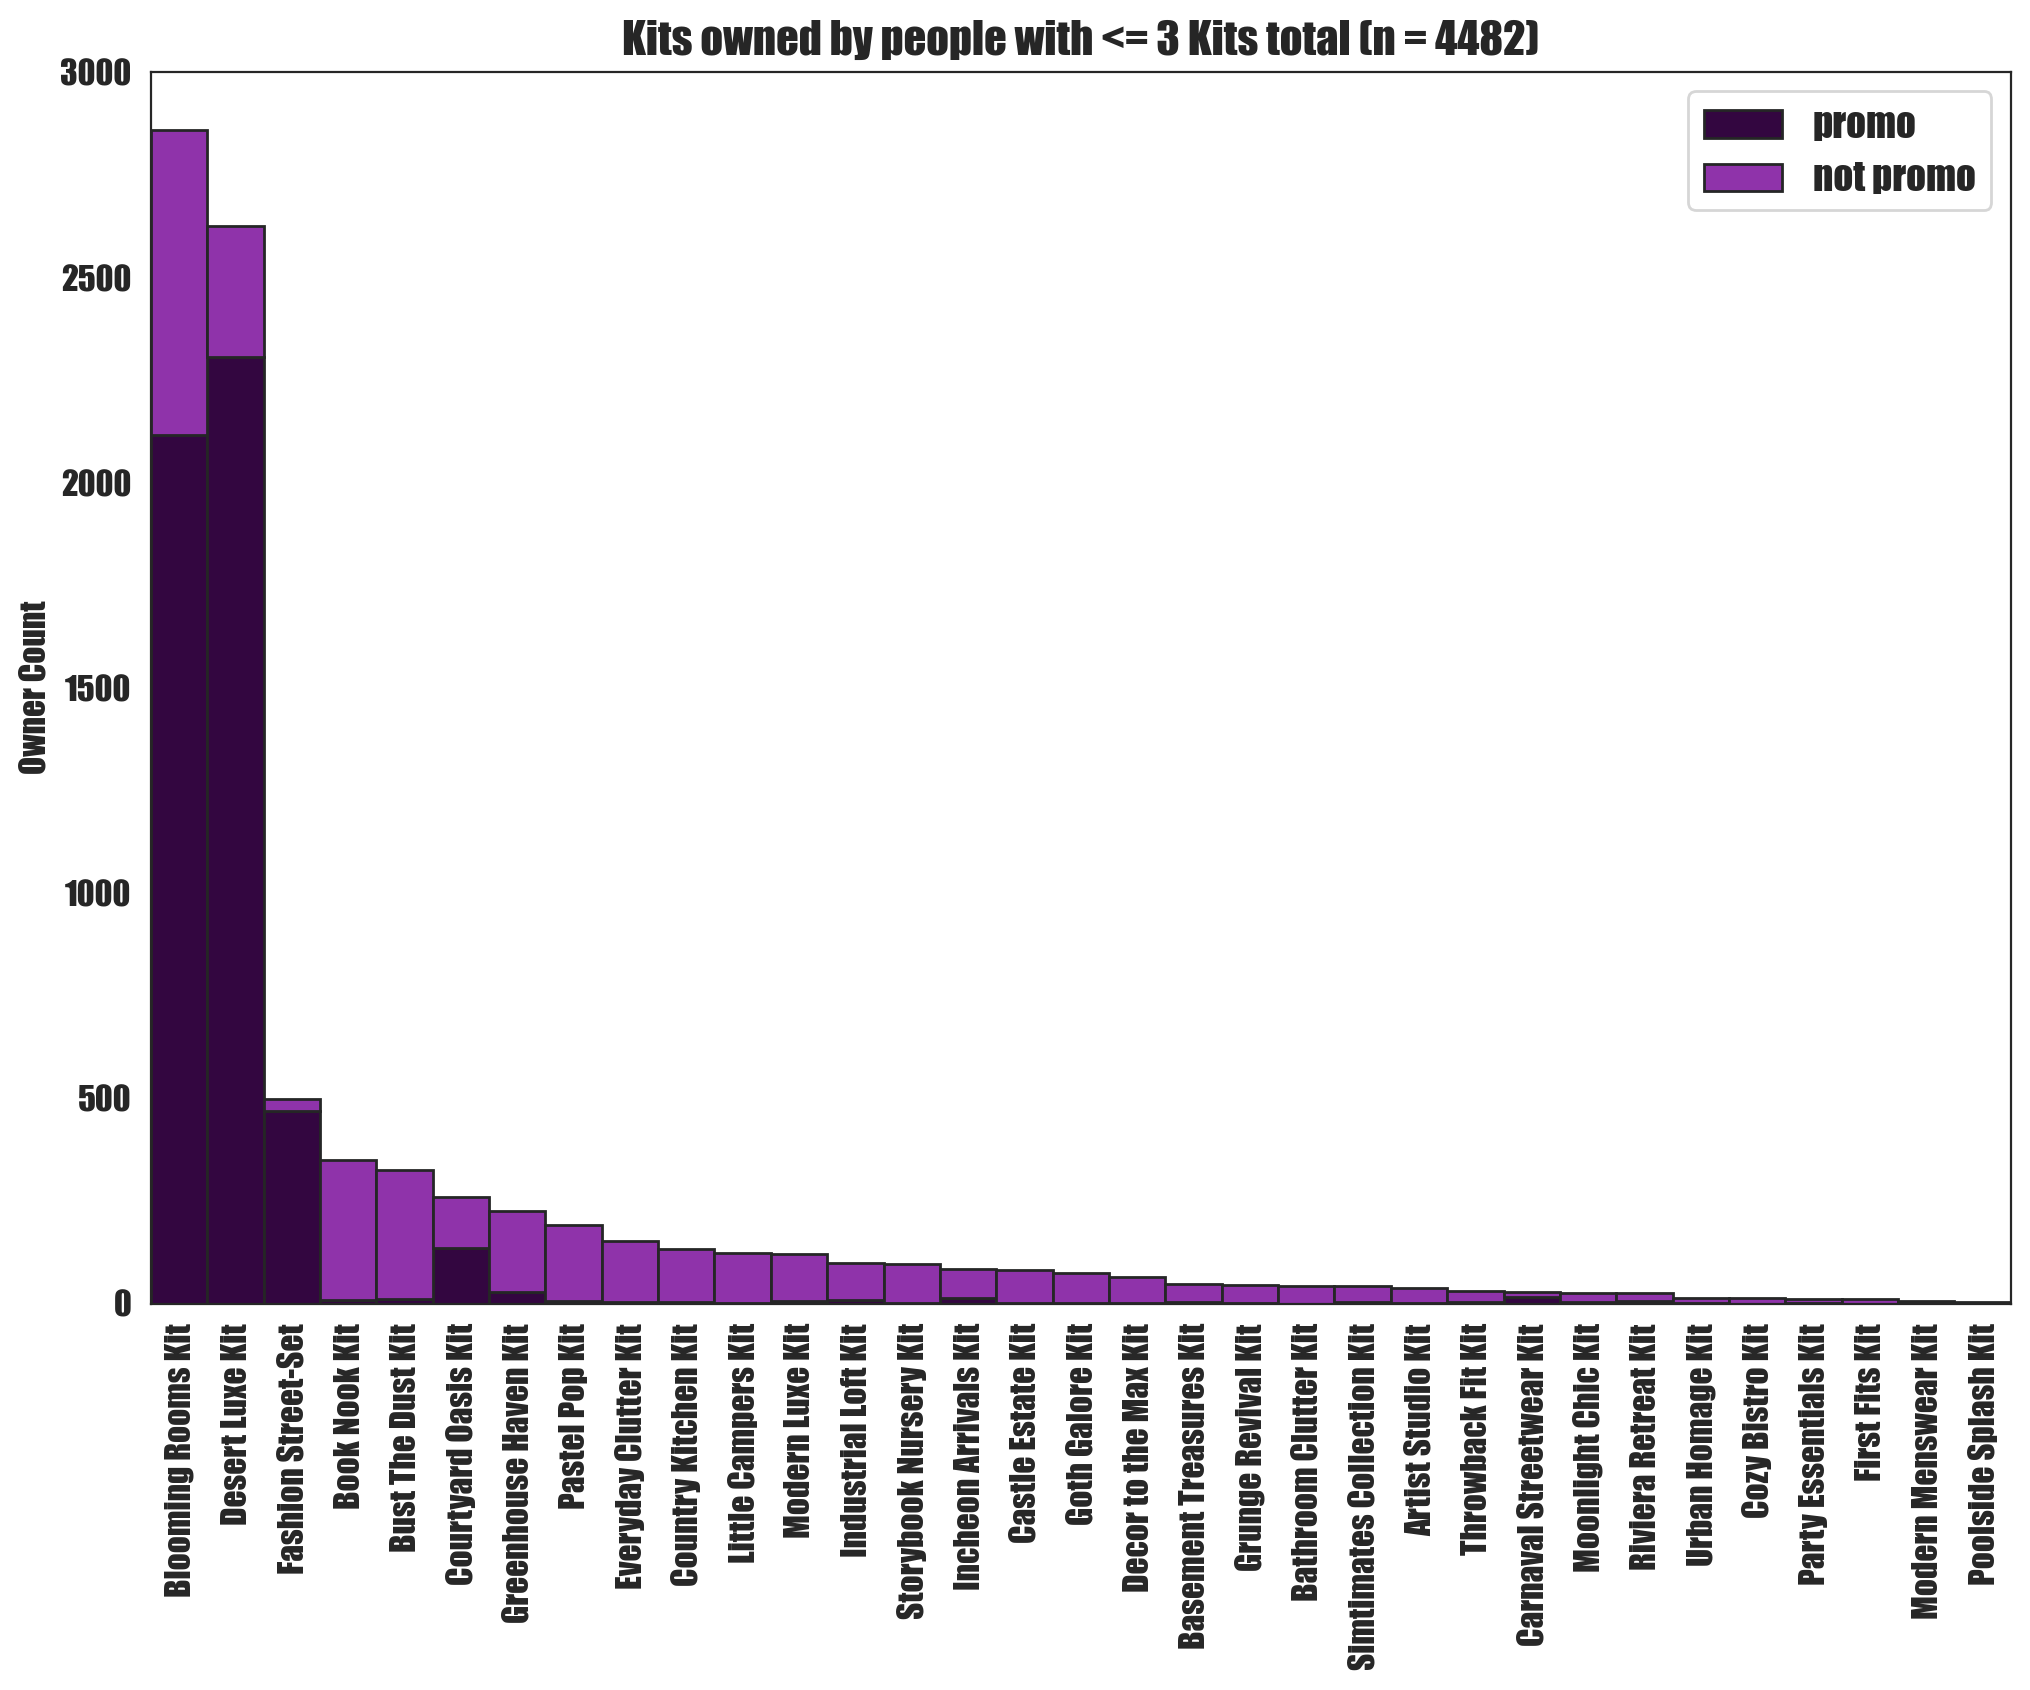

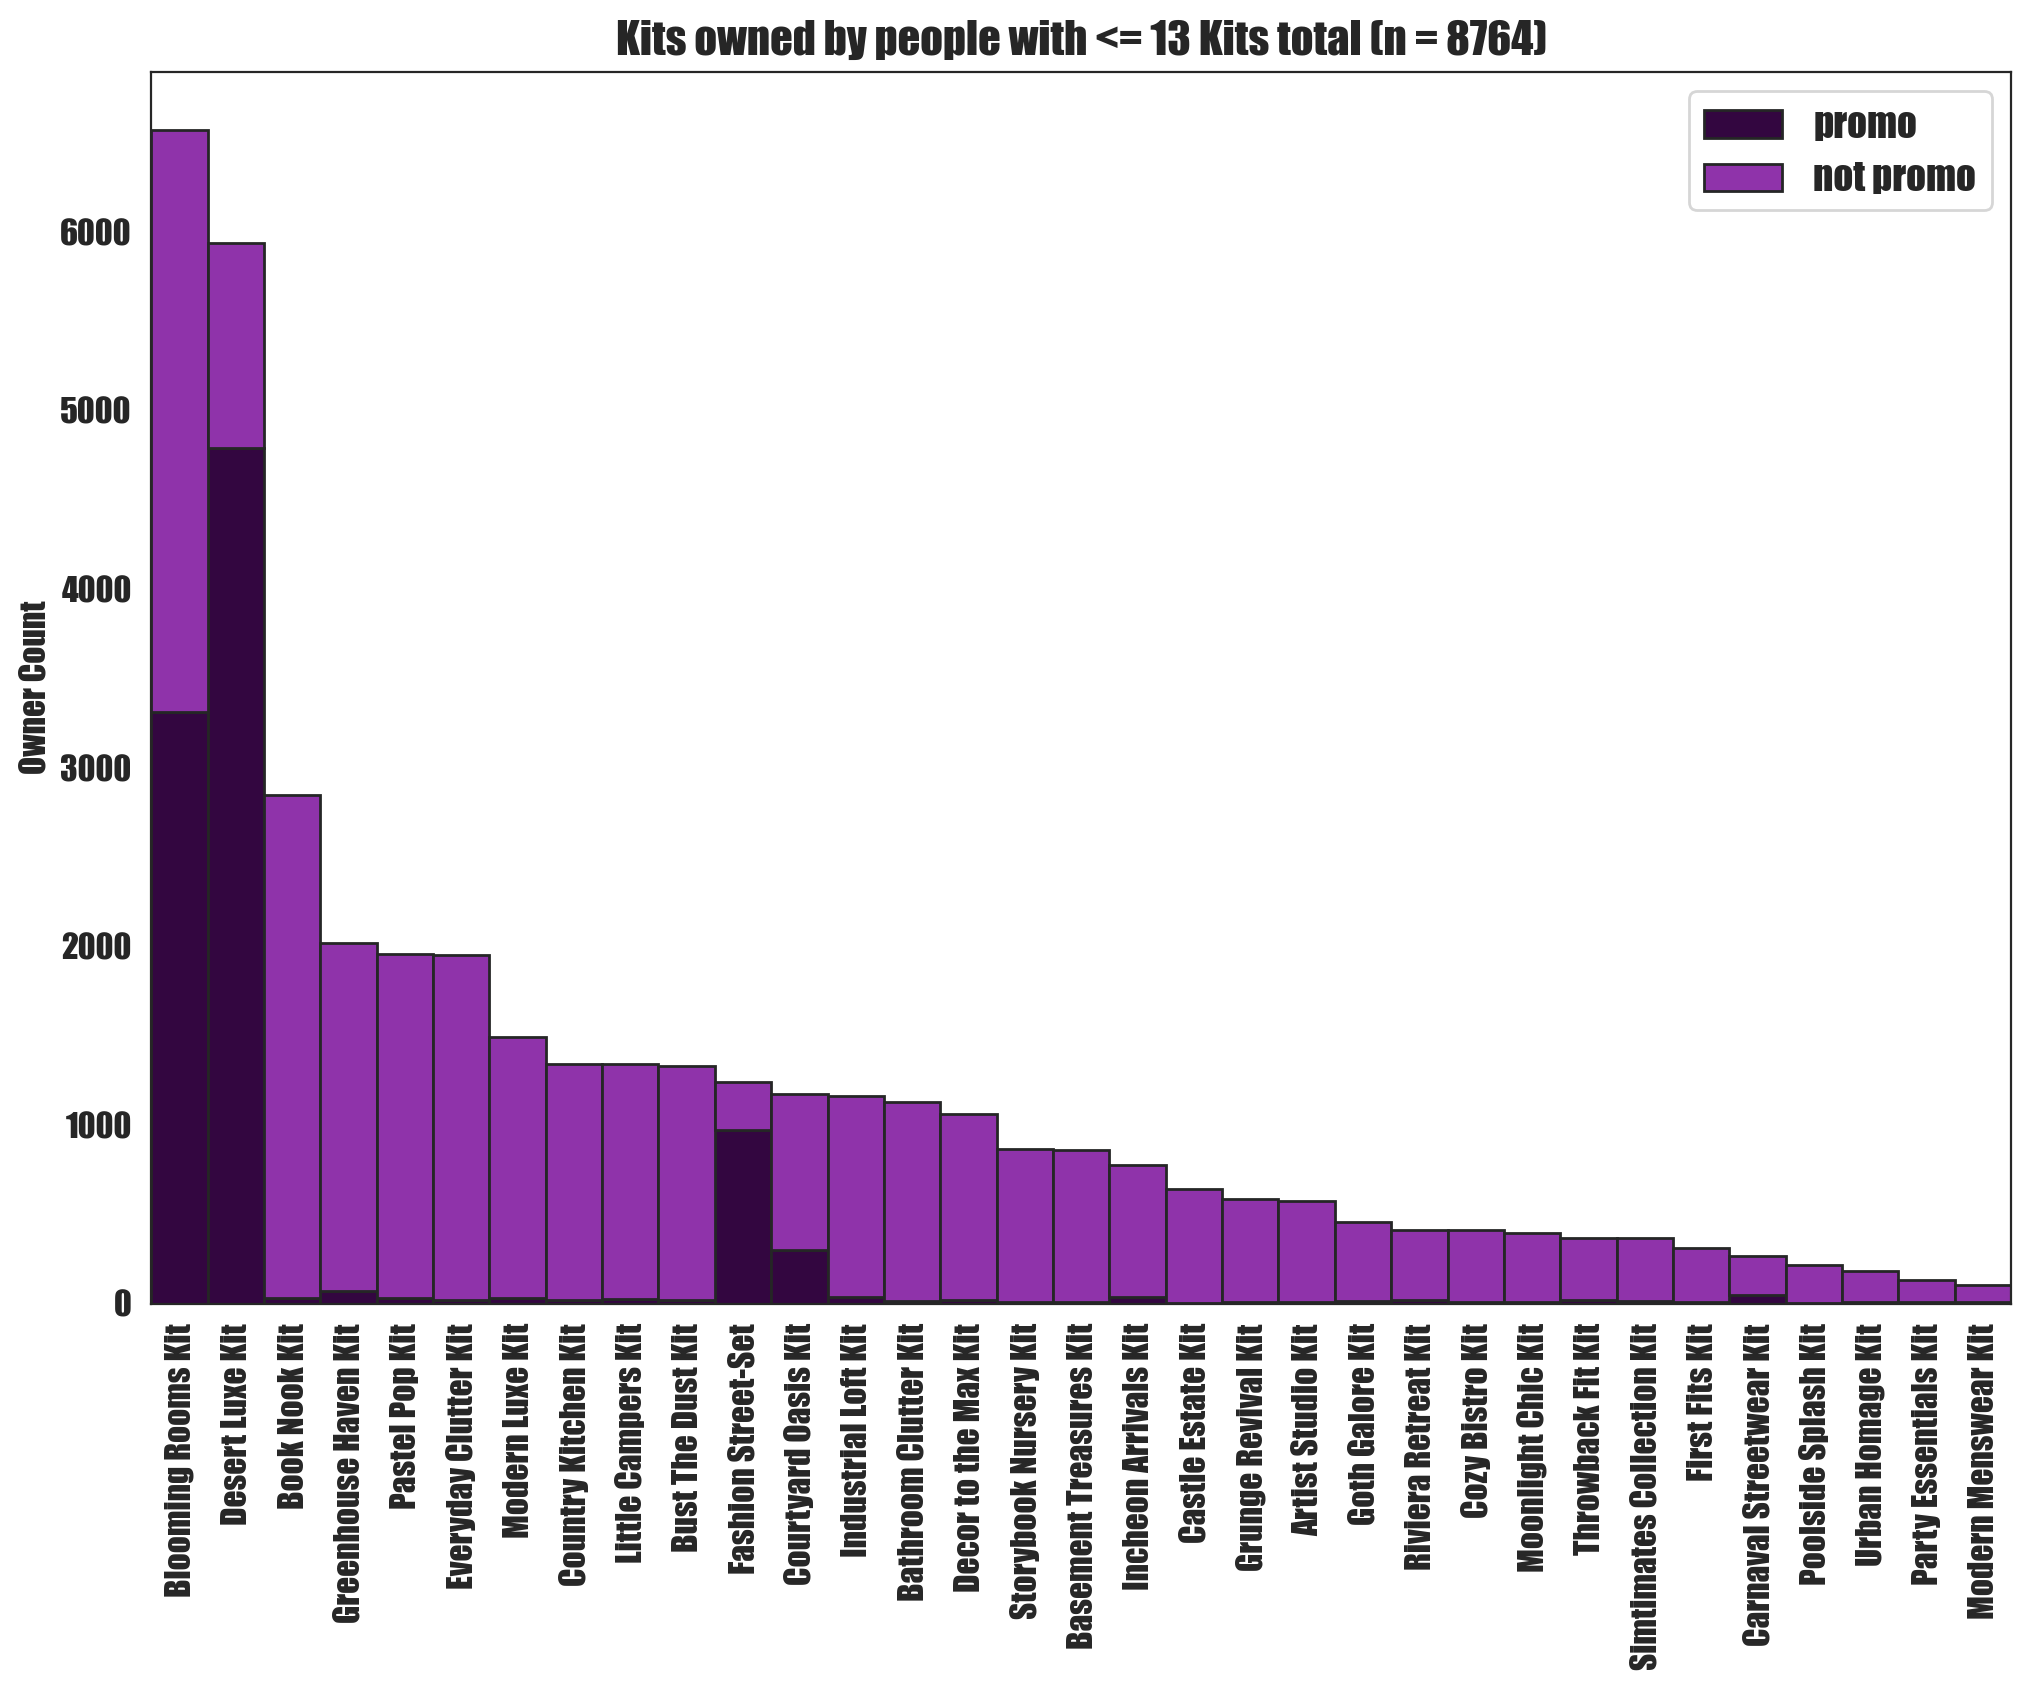

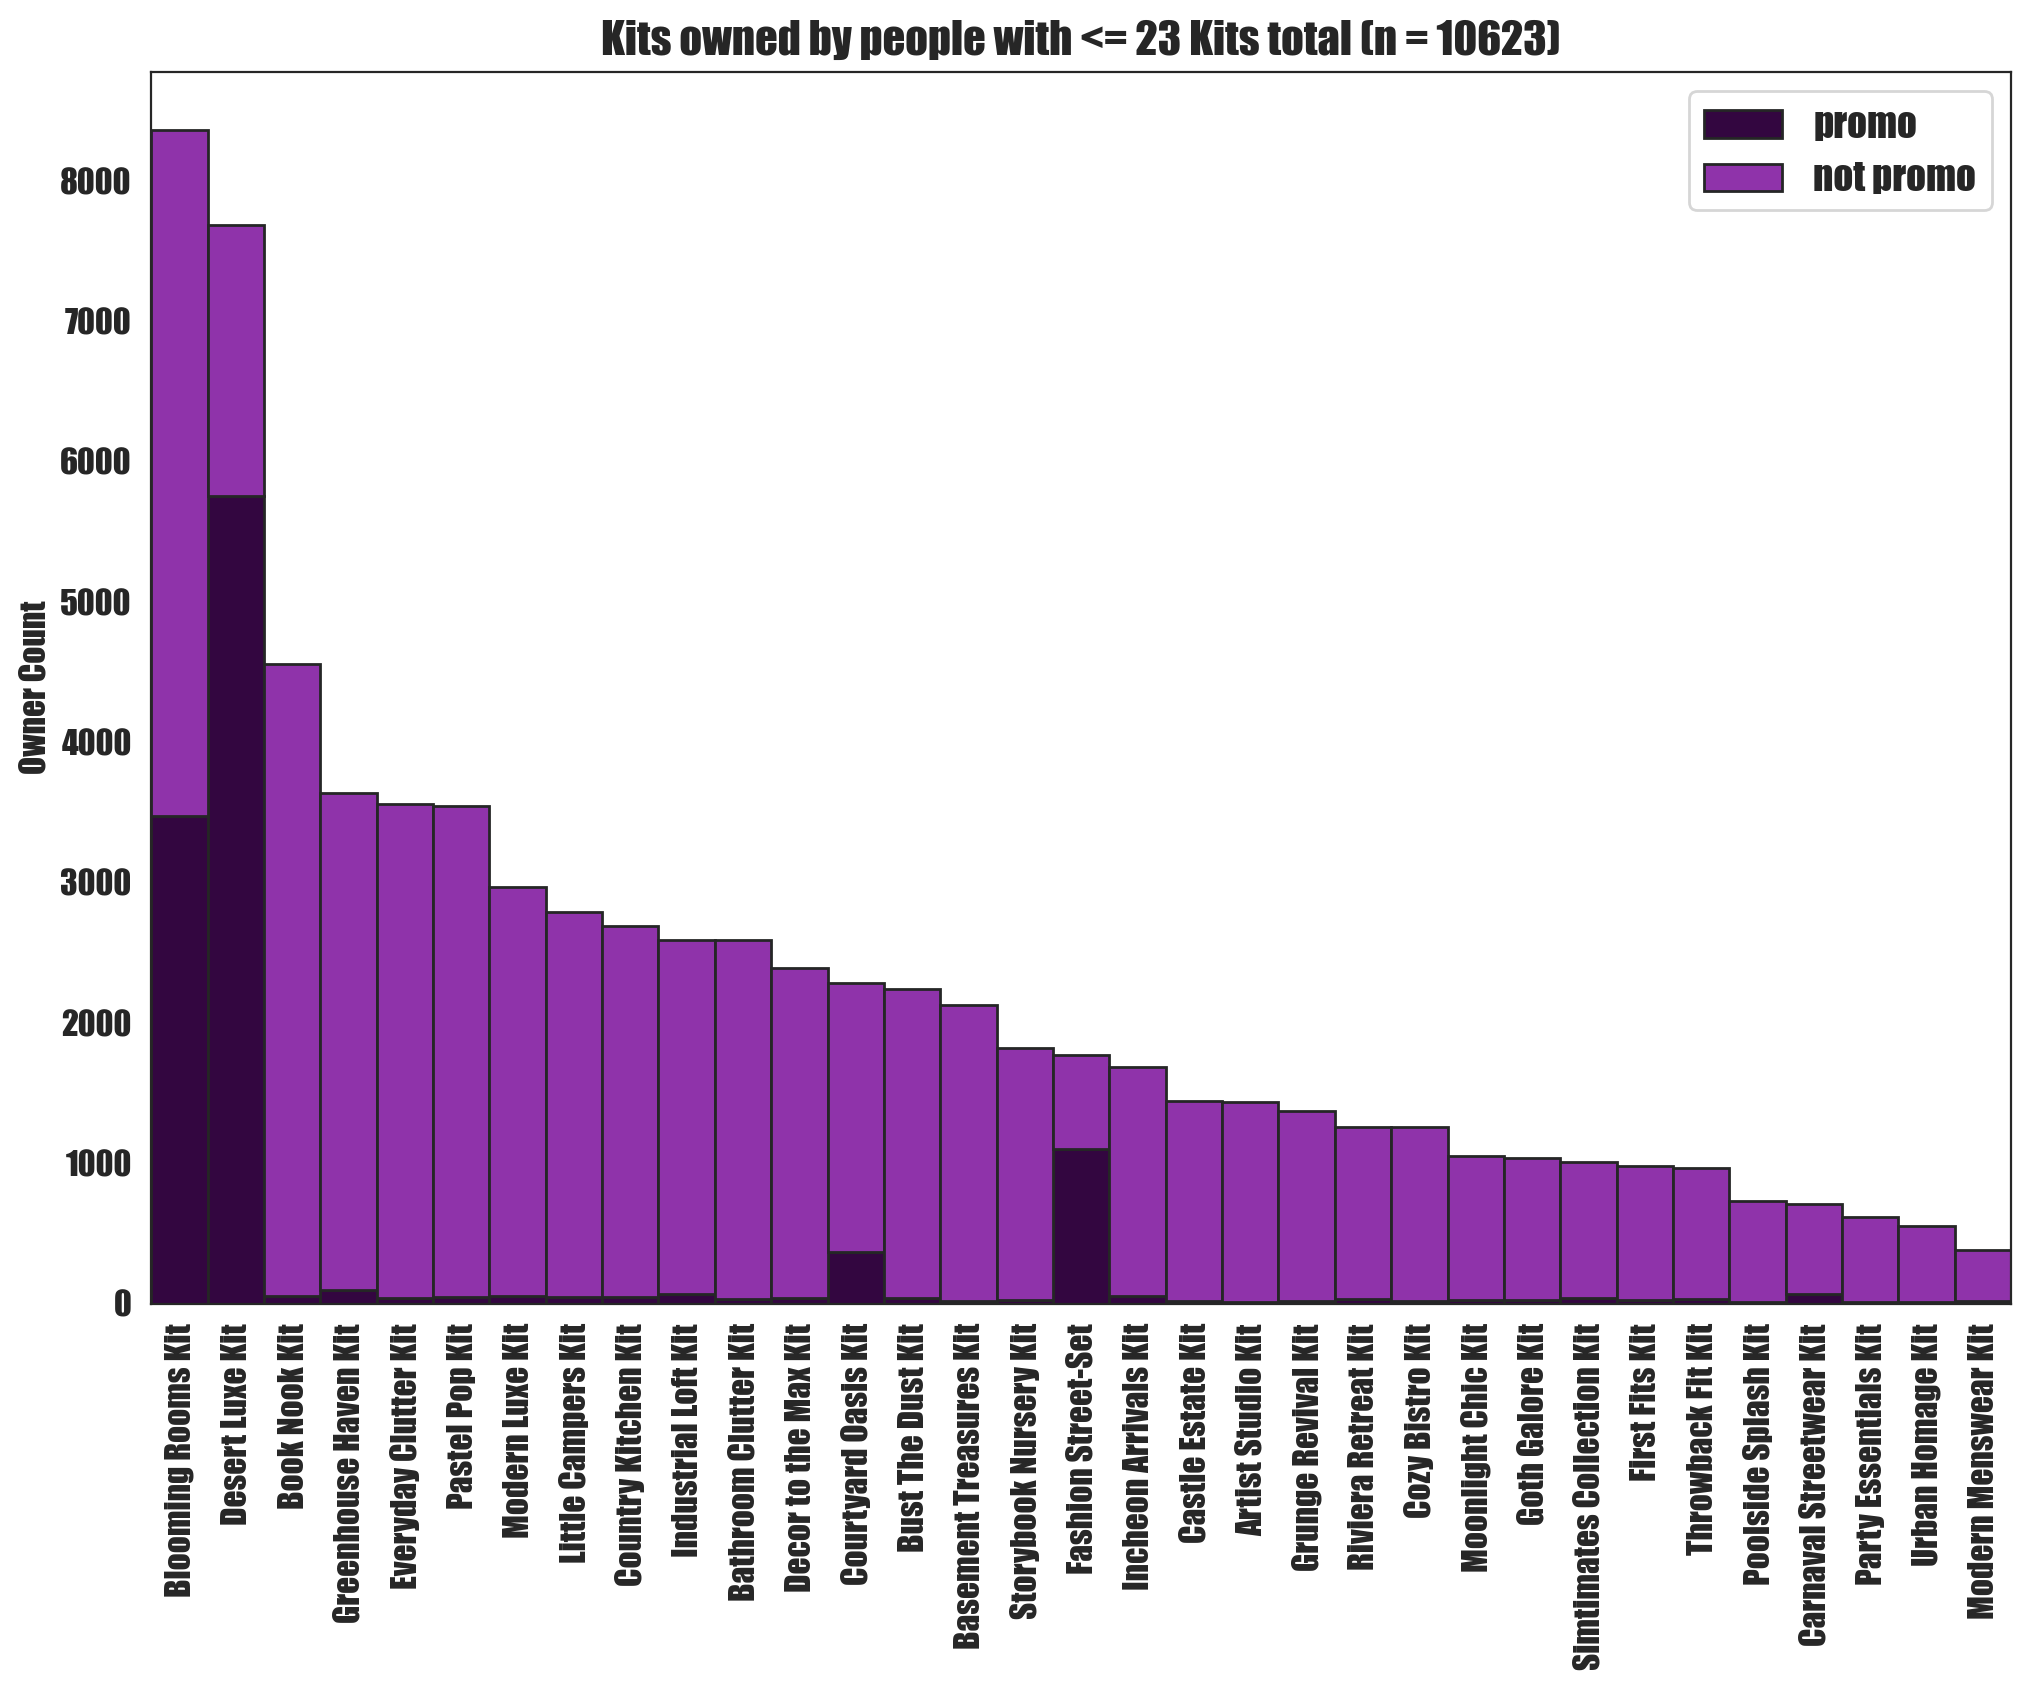

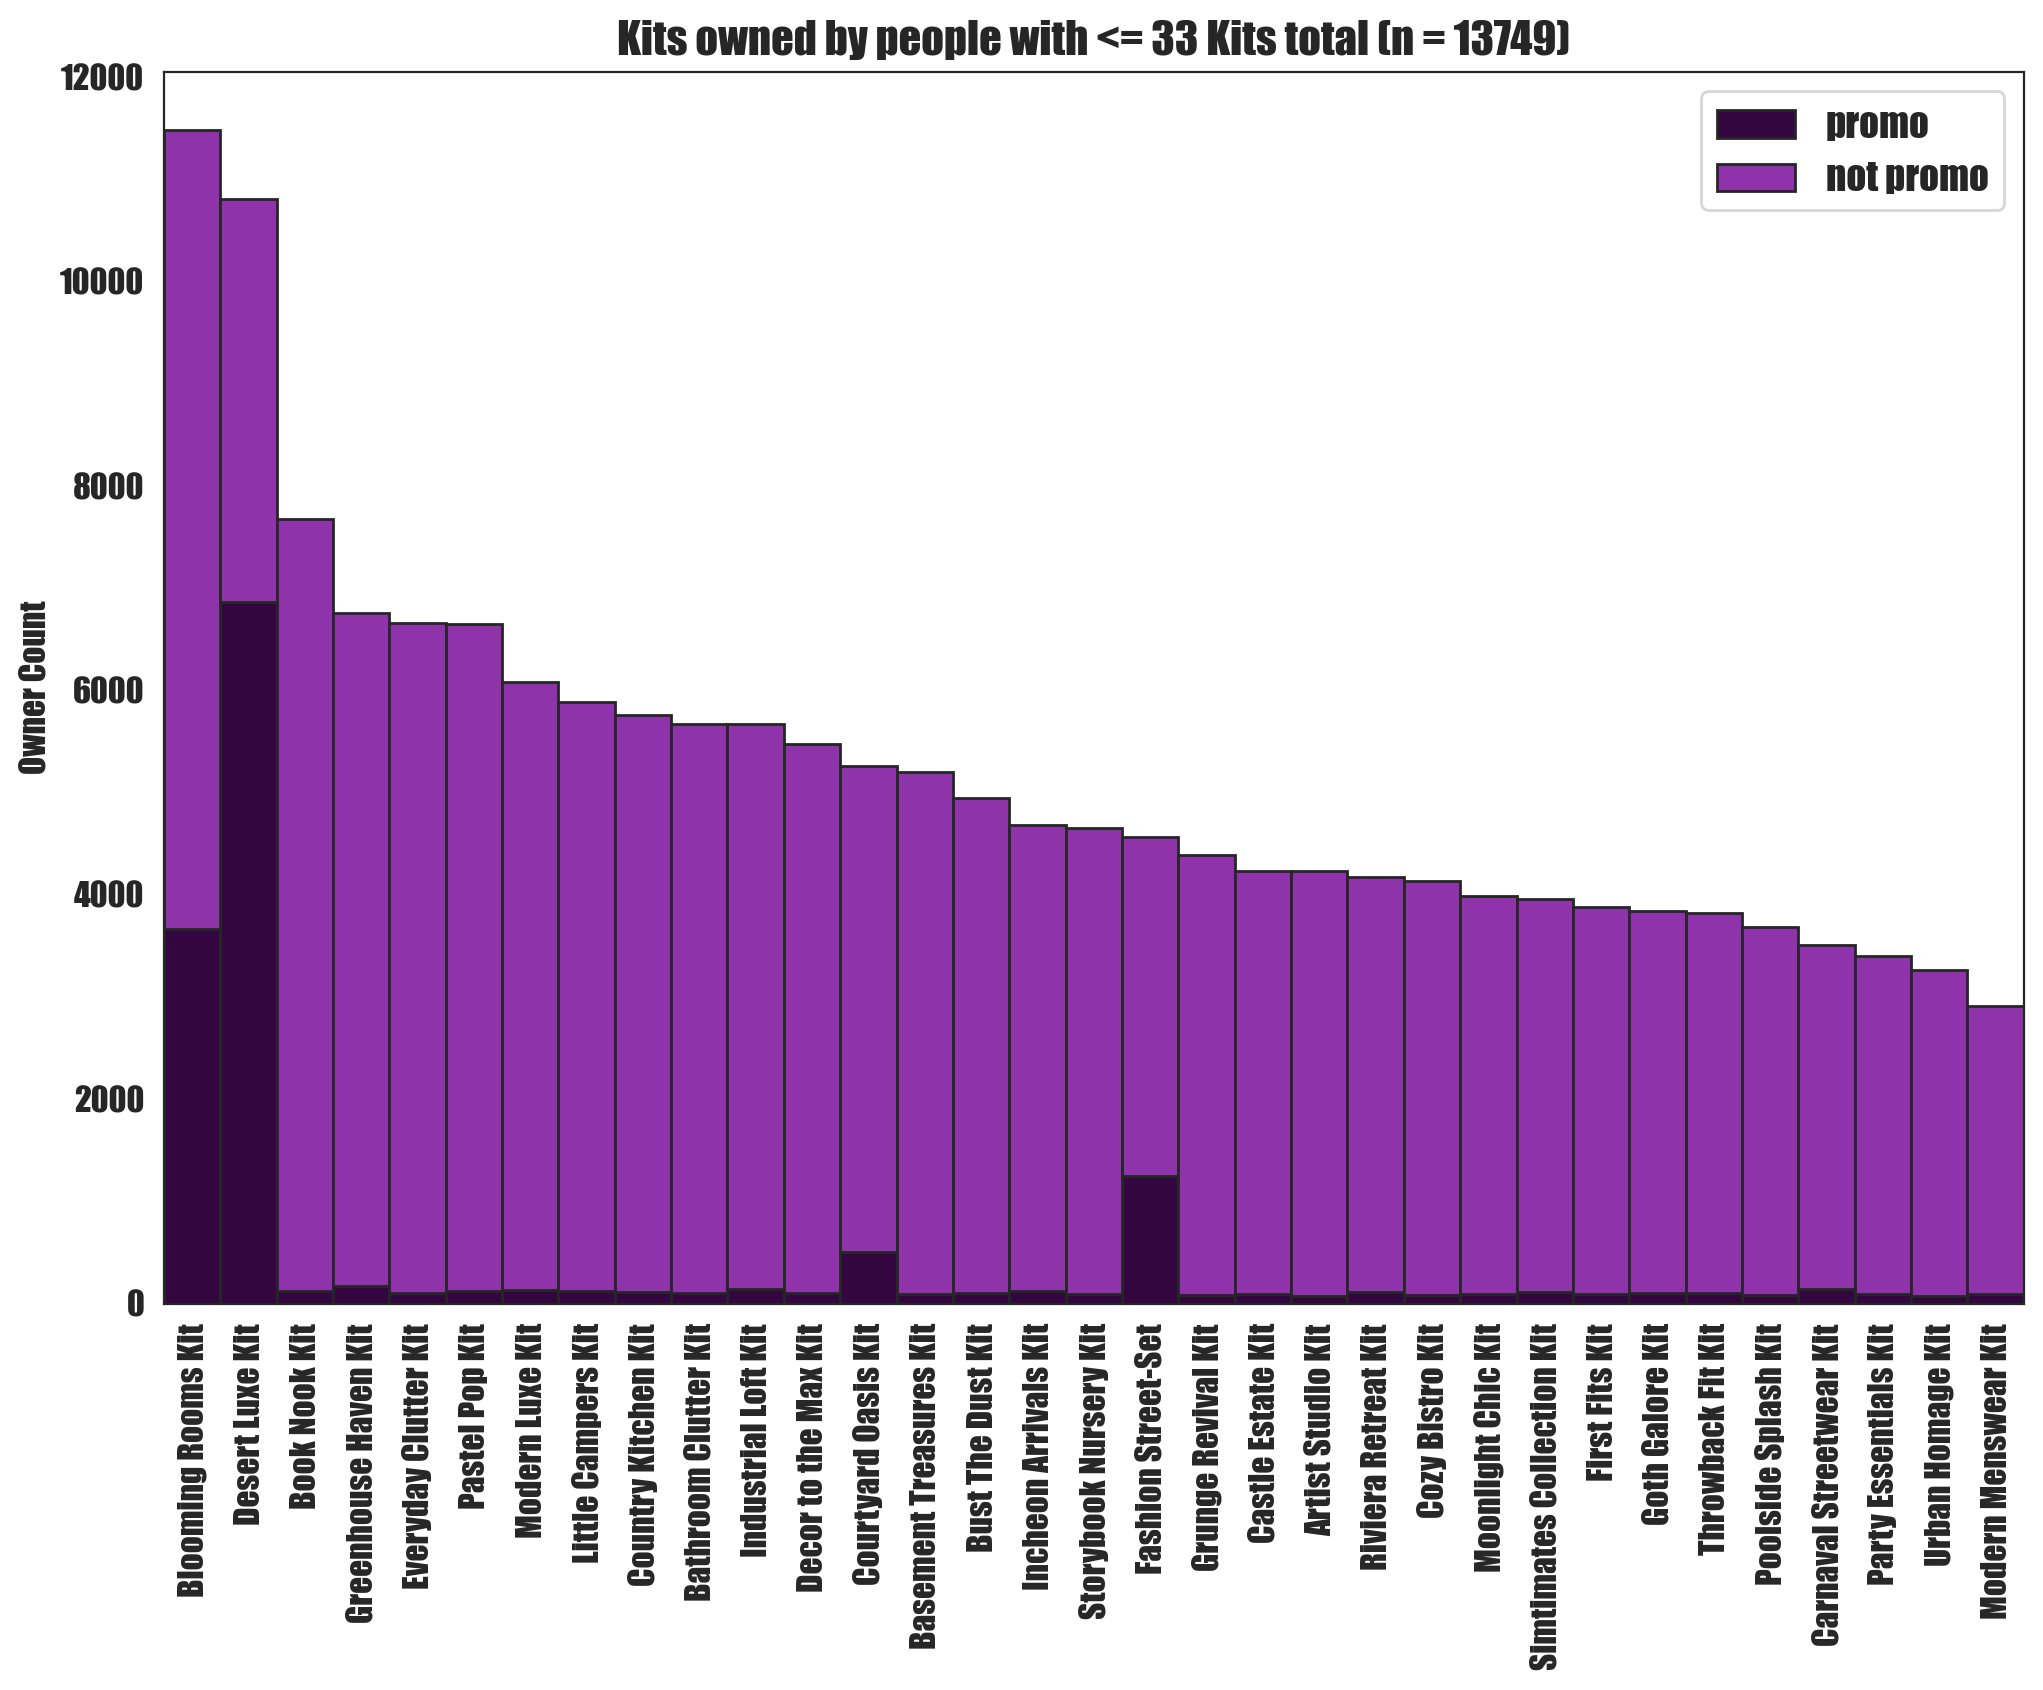

In [337]:
plot_pack_ownership_promo(for_free_data, 'Kits', 3)
plot_pack_ownership_promo(for_free_data, 'Kits', 13)
plot_pack_ownership_promo(for_free_data, 'Kits', 23)
plot_pack_ownership_promo(for_free_data, 'Kits', 33)

What I'm seeing is the people who only own 3 kits, mostly own the free ones. The top hits are the ones that had promos (free giveaways). As you get into people who own more and more of those kits, the overall most popular are the ones that were free - but those people were more likely to have bought the pack.

### 1.2 Of people who bought all but one (or 2) packs, WHY don't they own that one?

Look at their responses to the denial question. Stacked bar with that response

### 1.3 How does pack ownership depend on console type? (TODO)

## Question 2: Does play style impact the score?

Does play style impact the ratings a player gave? Do certain packs see more of a correlation than others?

In [28]:
# add in additional pack information and the survey respondent's play style

raw_data_all = pd.merge(
    left = raw_data,
    left_on = 'pack_code',
    right = pack_info,
    right_on = 'pack_id',
    how = 'left'
)   
raw_data_all = pd.merge(
    left = raw_data_all,
    left_on = 'survey_id',
    right = gamer_type_raw,
    right_index = True
)
raw_data_all

result_id  survey_id pack_code  rating  gameplay  buildmode  cas  \
0                1          1      EP01     NaN       NaN        NaN  NaN   
1                2          1      EP02     NaN       6.0        6.0  4.0   
2                3          1      EP03     NaN       7.0        6.0  5.0   
3                4          1      EP04     NaN       NaN        NaN  NaN   
4                5          1      EP05     NaN       8.0        6.0  5.0   
...            ...        ...       ...     ...       ...        ...  ...   
1227631    1227632      15156      SP51     NaN       NaN        NaN  NaN   
1227632    1227633      15156      SP52     NaN       NaN        NaN  NaN   
1227633    1227634      15156      SP53     NaN       NaN        NaN  NaN   
1227634    1227635      15156      SP55     NaN       NaN        NaN  NaN   
1227635    1227636      15156      SP54     NaN       NaN        NaN  NaN   

         world  bugs  promo  bugeffect  getpack  getpackbugs        pack_type  \
0          NaN   NaN      0          0      3.0          0.0  Expansion Packs   
1          8.0   3.0      0          0      NaN          NaN  Expansion Packs   
2          9.0   2.0      0          0      NaN          NaN  Expansion Packs   
3          NaN   NaN      0          0      2.0          0.0  Expansion Packs   
4          NaN   2.0      0          0      NaN          NaN  Expansion Packs   
...        ...   ...    ...        ...      ...          ...              ...   
1227631    NaN   NaN      0          0      4.0          NaN             Kits   
1227632    NaN   NaN      0          0      4.0          NaN             Kits   
1227633    NaN   NaN      0          0      4.0          NaN             Kits   
1227634    NaN   NaN      0          0      2.0          NaN             Kits   
1227635    NaN   NaN      0          0      3.0          NaN             Kits   

        release date pack_id              pack name  player_cas  player_build  \
0         03/31/2015    EP01            Get To Work        True         False   
1         12/08/2015    EP02           Get Together        True         False   
2         11/01/2016    EP03            City Living        True         False   
3         11/10/2017    EP04            Cats & Dogs        True         False   
4         06/22/2018    EP05                Seasons        True         False   
...              ...     ...                    ...         ...           ...   
1227631   04/18/2024    SP51   Party Essentials Kit       False         False   
1227632   05/30/2024    SP52    Riviera Retreat Kit       False         False   
1227633   05/30/2024    SP53        Cozy Bistro Kit       False         False   
1227634   09/19/2024    SP55  Storybook Nursery Kit       False         False   
1227635   09/19/2024    SP54      Artist Studio Kit       False         False   

         player_live  
0               True  
1               True  
2               True  
3               True  
4               True  
...              ...  
1227631         True  
1227632         True  
1227633         True  
1227634         True  
1227635         True  

[1227636 rows x 20 columns]

### boxplot of respondent score
can i just put it all in there or will it take forever to load?

In [334]:
truefalse_colors_raw = {True: (9,153,240), # game pack lighter blue/purple
                    False:  (43,0,255) # game pack royal blue/purple
                   }
truefalse_colors = {}
for name, (r,g,b) in truefalse_colors_raw.items():
    new_rgb = ( r / 255.0, g / 255.0, b / 255.0, 1 )
    truefalse_colors[name] = new_rgb

In [31]:
score_metrics = ['gameplay', 'buildmode', 'cas', 'world', 'bugs']
player_types = ['player_cas', 'player_build', 'player_live']

[]

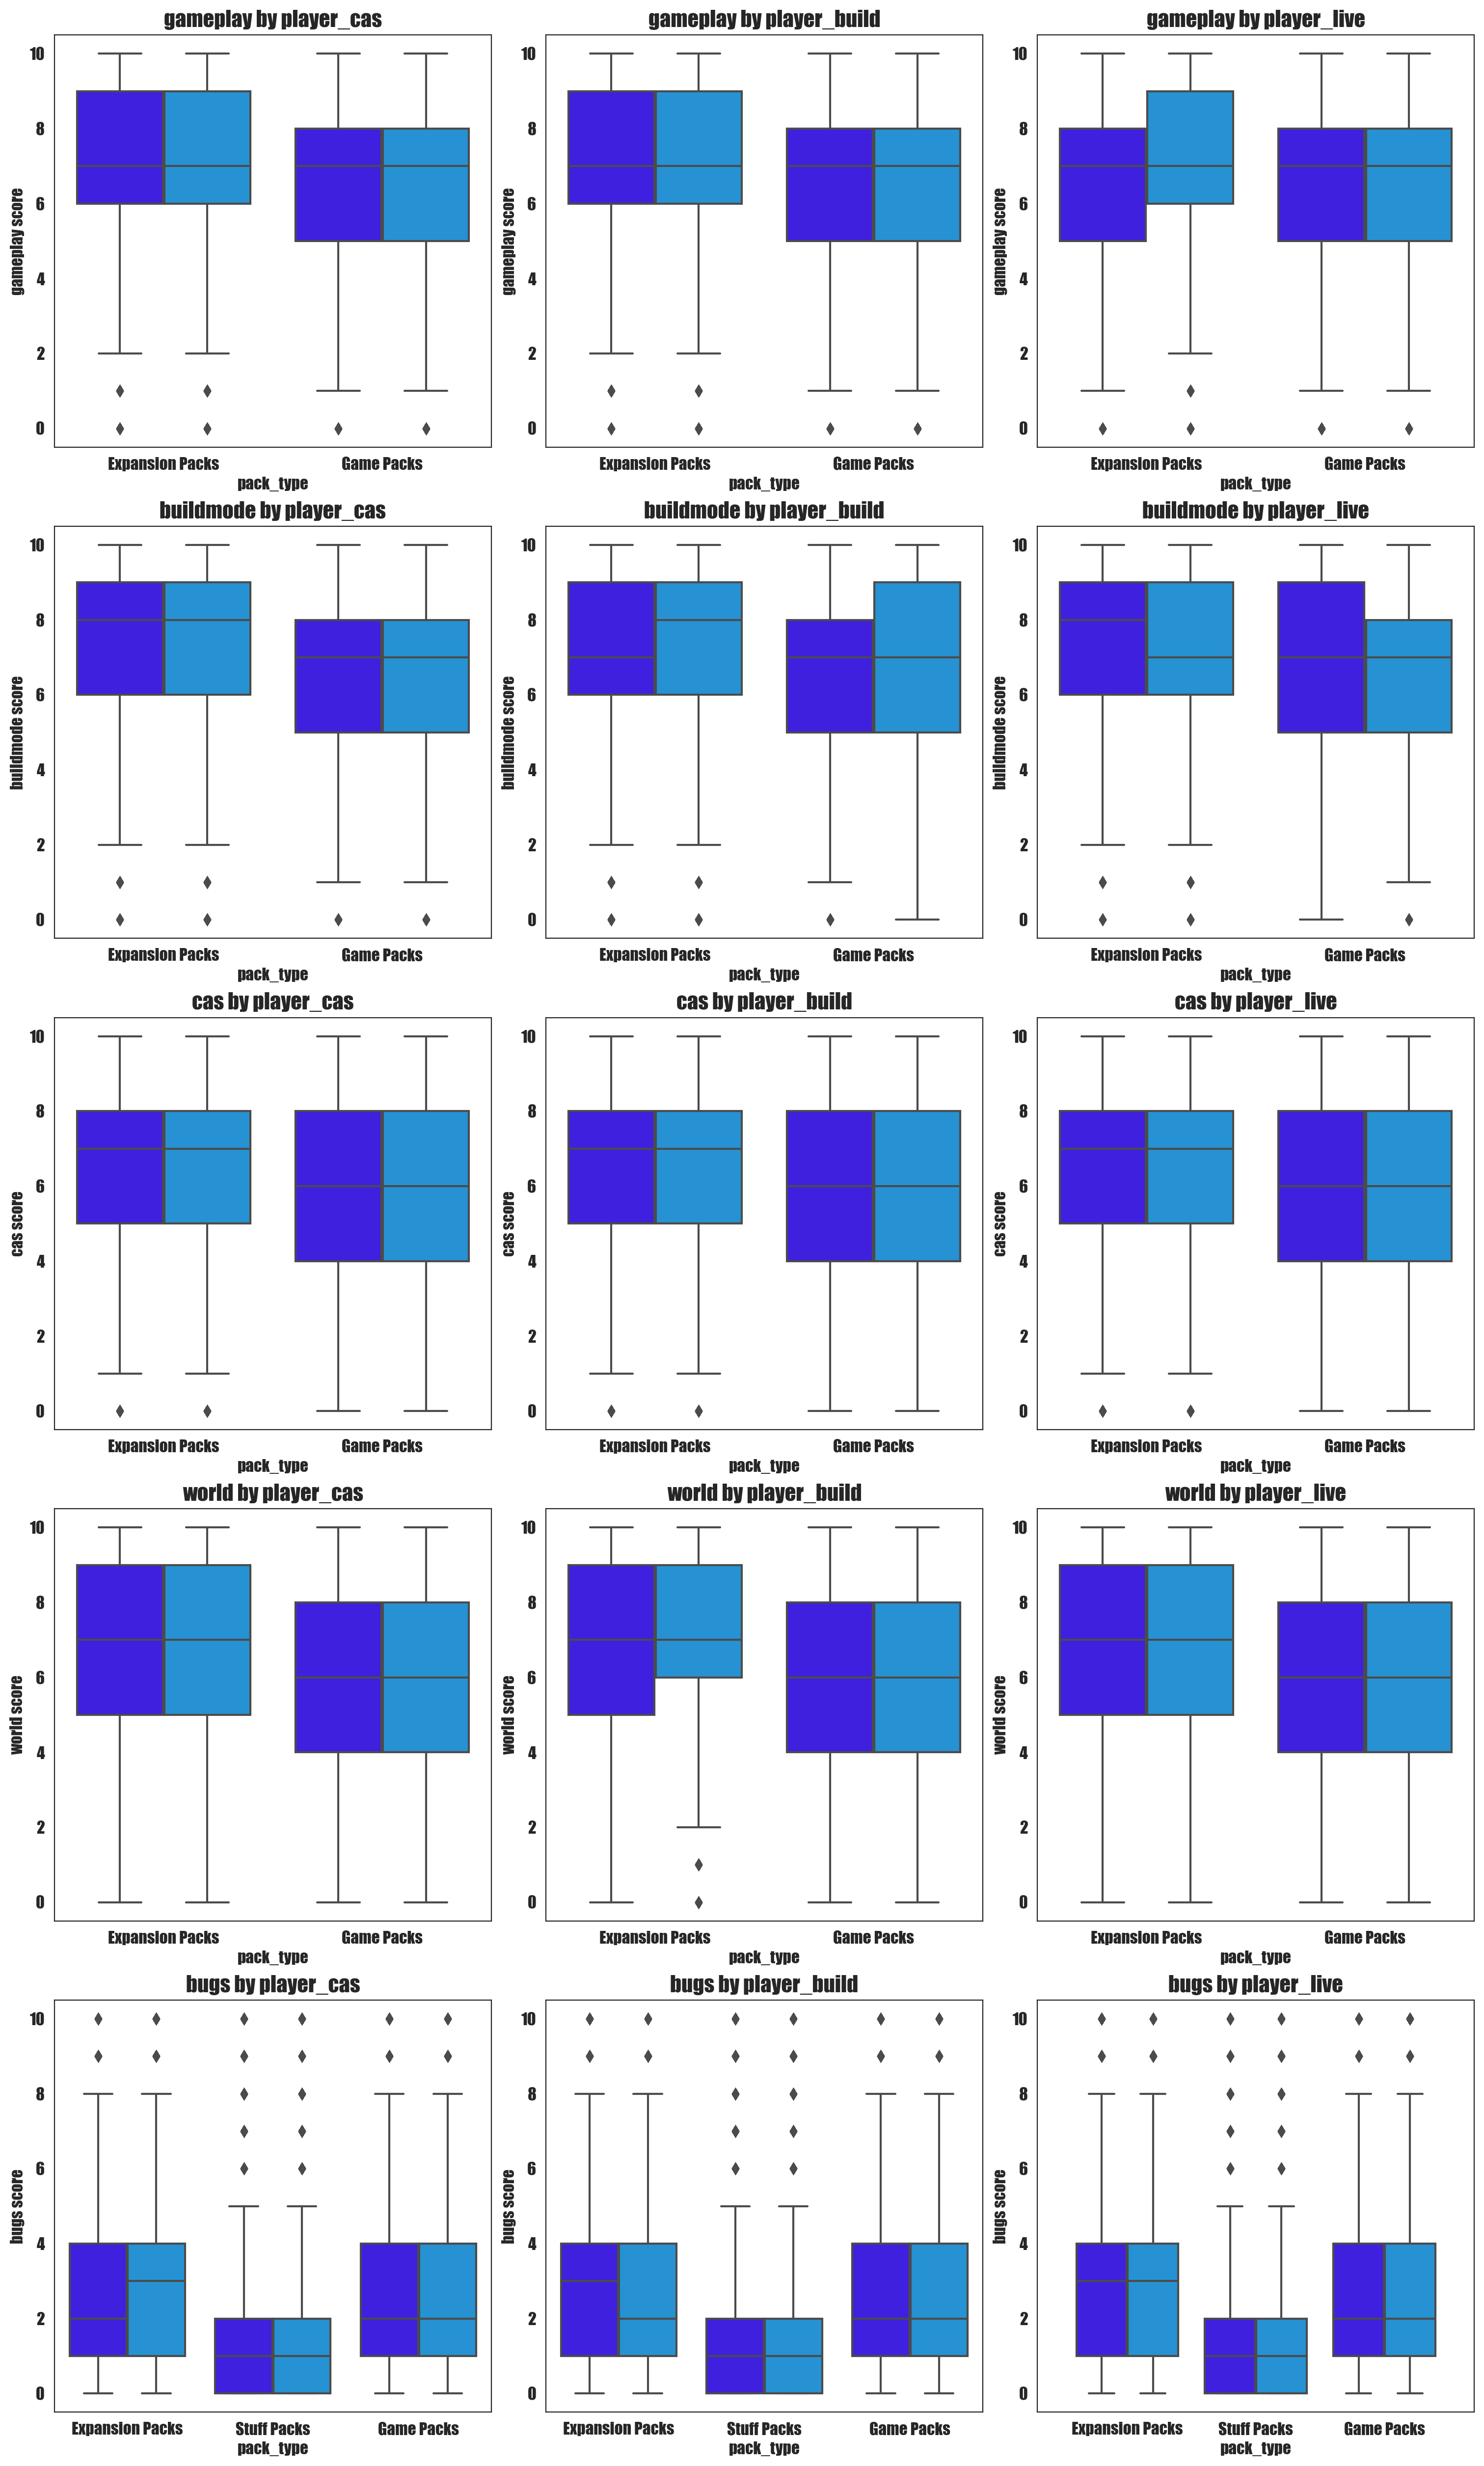

In [353]:
fig, axes = plt.subplots(figsize = (len(player_types) * 5, len(score_metrics) * 5), dpi = 200,
                         ncols = len(player_types),
                         nrows = len(score_metrics),
                         constrained_layout = True
                        )

for score_metric in score_metrics:
    for player_type in player_types:
        
        ax_x = score_metrics.index(score_metric)
        ax_y = player_types.index(player_type)
        ax = axes[ax_x,ax_y]
        
        sns.boxplot(
            data = raw_data_all[~raw_data_all[score_metric].isna()],
            hue = player_type,
            y = score_metric,
            x = 'pack_type',
            palette = truefalse_colors,
            ax = ax
        )
        ax.get_legend().set_visible(False)
        ax.set_ylabel(f'{score_metric} score')
        ax.set_title(f'{score_metric} by {player_type}')

plt.savefig('images/score_by_player_boxplots.png', bbox_inches = 'tight')
plt.plot()

[]

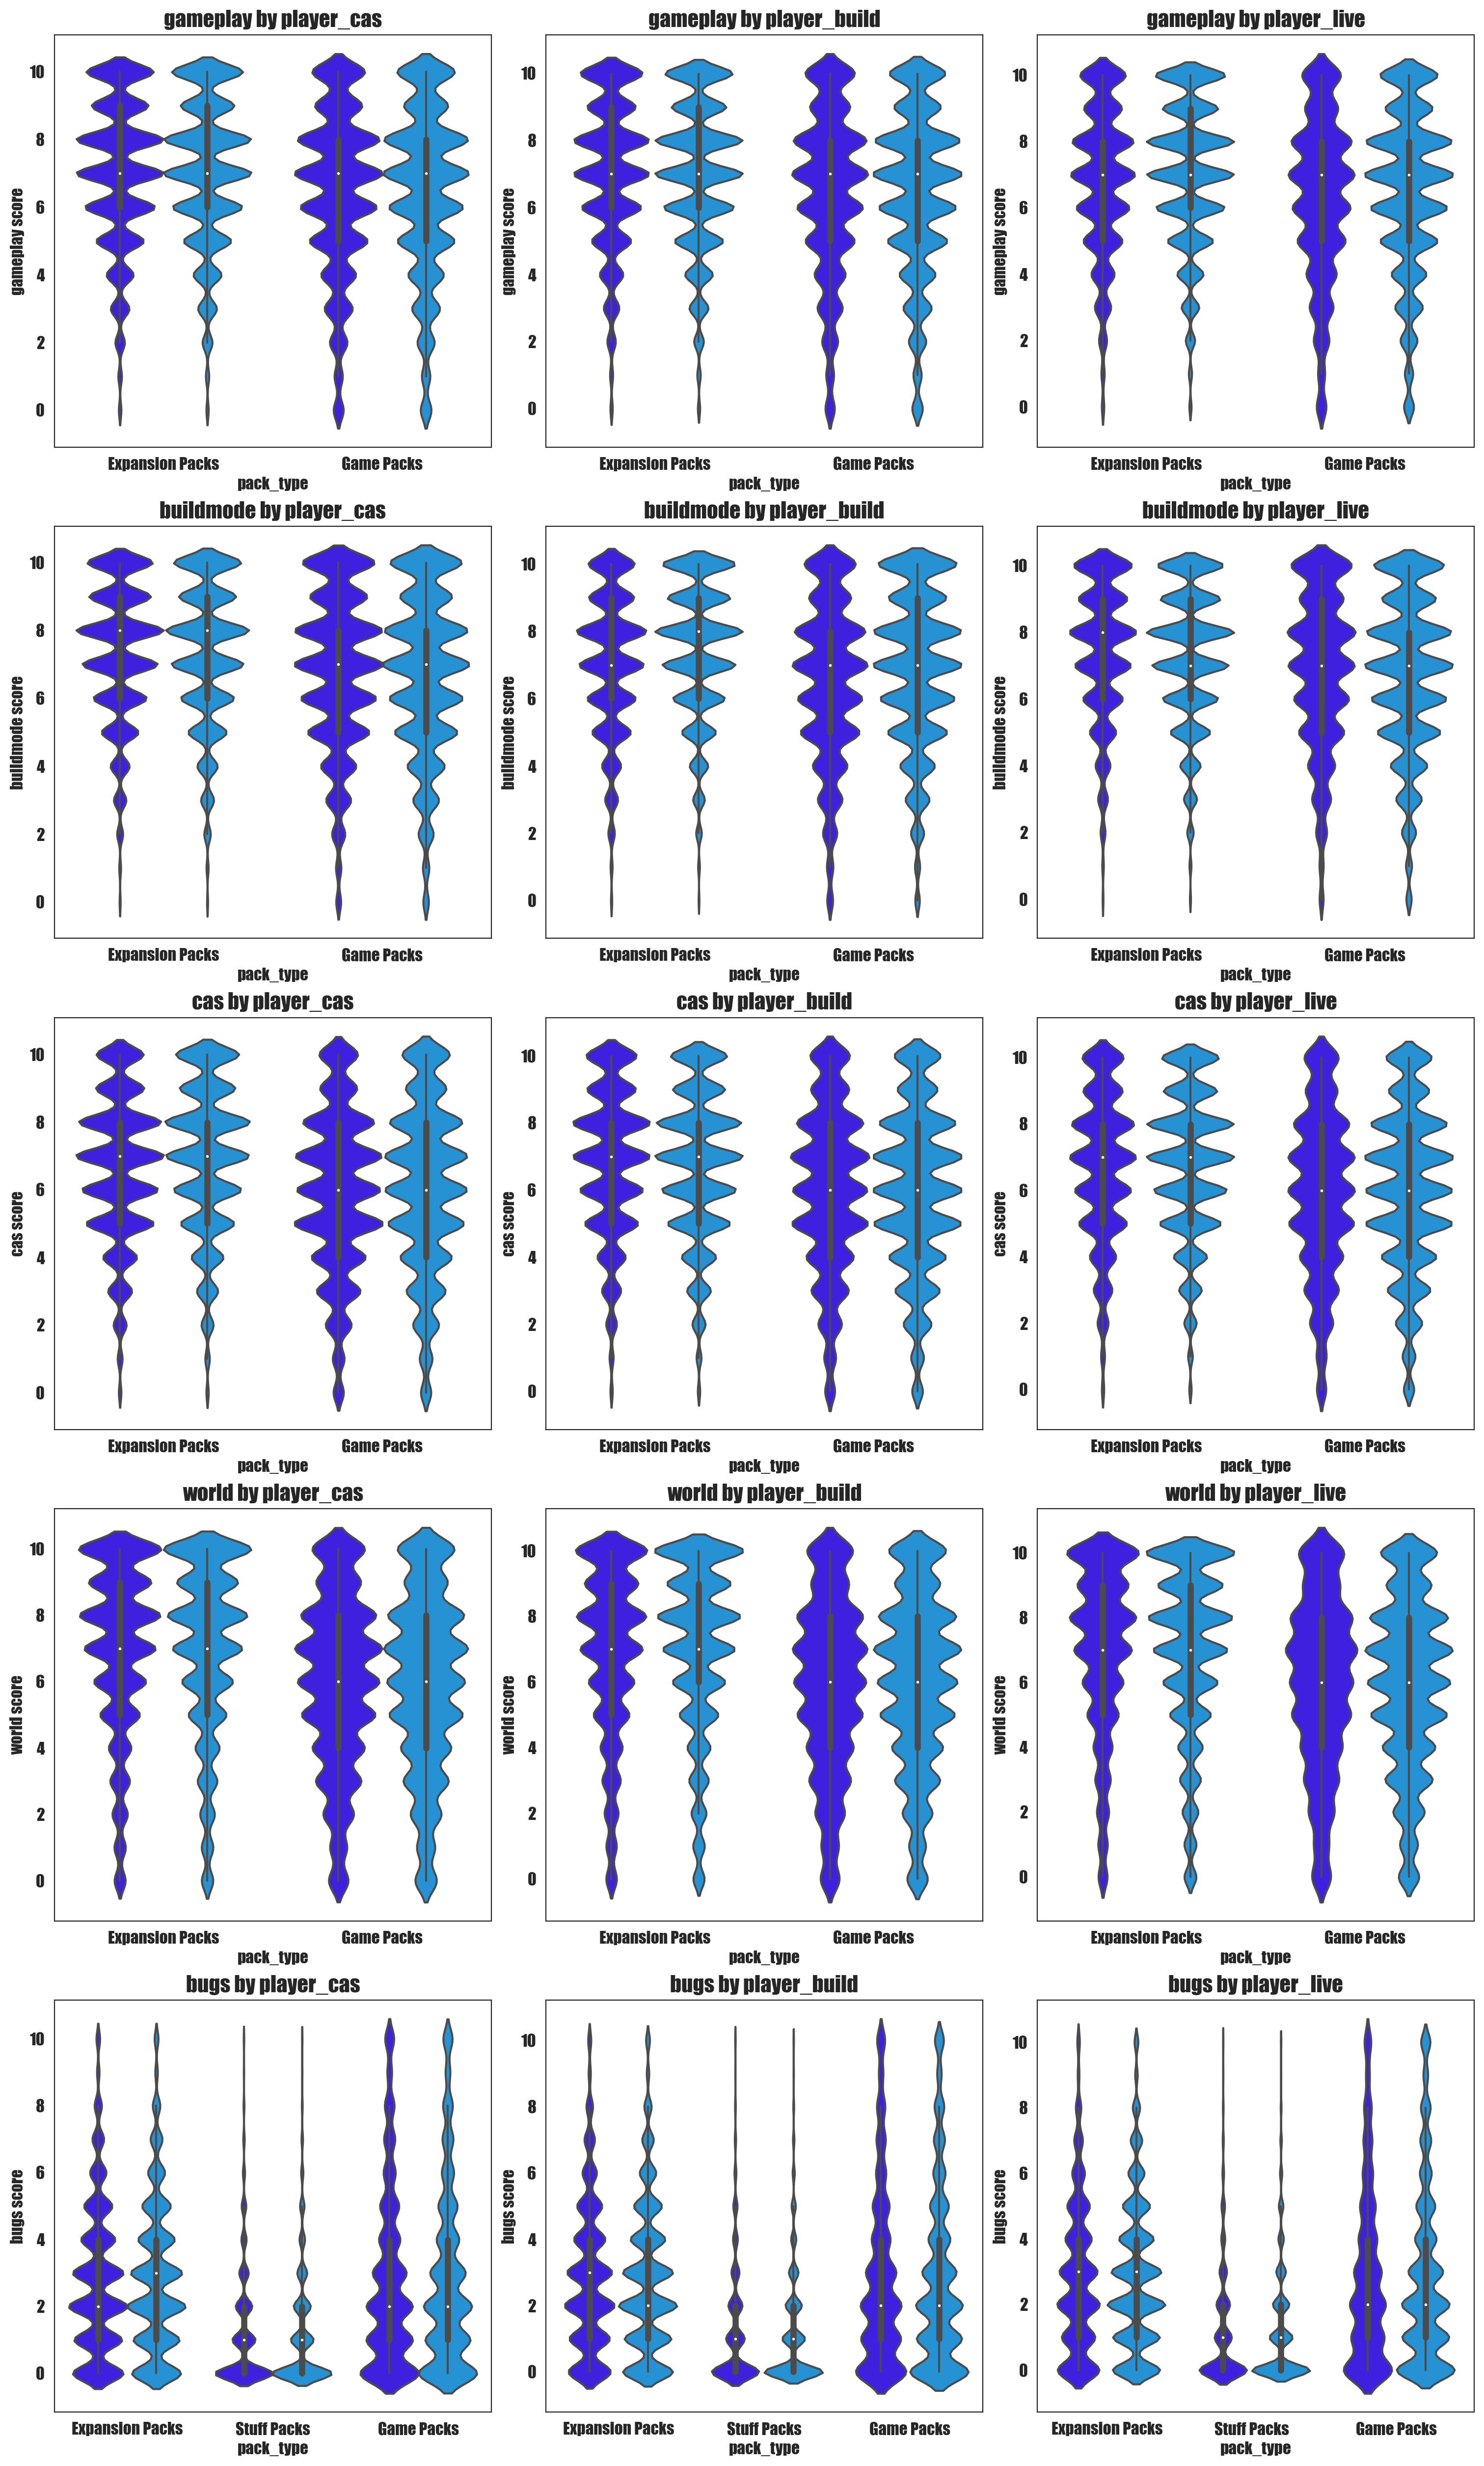

In [354]:
score_metrics = ['gameplay', 'buildmode', 'cas', 'world', 'bugs']
player_types = ['player_cas', 'player_build', 'player_live']

fig, axes = plt.subplots(figsize = (len(player_types) * 5, len(score_metrics) * 5), dpi = 200,
                         ncols = len(player_types),
                         nrows = len(score_metrics),
                         constrained_layout = True
                        )

for score_metric in score_metrics:
    for player_type in player_types:
        
        ax_x = score_metrics.index(score_metric)
        ax_y = player_types.index(player_type)
        ax = axes[ax_x,ax_y]
        
        sns.violinplot(
            data = raw_data_all[~raw_data_all[score_metric].isna()],
            hue = player_type,
            y = score_metric,
            x = 'pack_type',
            palette = truefalse_colors,
            ax = ax
        )
        ax.get_legend().set_visible(False)
        ax.set_ylabel(f'{score_metric} score')
        ax.set_title(f'{score_metric} by {player_type}')

plt.savefig('images/score_by_player_violin.png', bbox_inches = 'tight')
plt.plot()

I think people's scores overall were almost identical regardless of their play style, unfortunately.

I could maybe check out some more formal distributions, but this feels like enough

### mixed effects model check

In [361]:
import statsmodels.formula.api as smf

In [364]:
%%time

gameplay_set = raw_data_all[~raw_data_all['gameplay'].isna()]

# Mixed-effects model, see if gamepack score is related to the 3 build types, by respondent and pack ID
model = smf.mixedlm("gameplay ~ player_cas * player_build * player_live", 
                    gameplay_set, groups = gameplay_set["pack_id"], re_formula="~survey_id")
gameplay_result = model.fit()
print(gameplay_result.summary())

/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                              Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              gameplay    
No. Observations:              302747               Method:                          REML        
No. Groups:                    28                   Scale:                           4.3783      
Min. group size:               4727                 Log-Likelihood:                  -653529.7977
Max. group size:               14295                Converged:                       No          
Mean group size:               10812.4                                                           
-------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err. z P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         

##### Interpretation from ChatGPT

Intercept:
* Intercept = 6.360: The baseline level of the gameplay score when all categorical variables (player_cas, player_build, player_live) are set to False.

Main Effects (none are statistically significant!)
* player_cas[T.True] = 0.169: When player_cas is True, the gameplay score increases by 0.169, on average, compared to when it is False, holding other variables constant.
* player_build[T.True] = 0.031: When player_build is True, the gameplay score increases by 0.031 compared to when it is False, controlling for other factors.
* player_live[T.True] = 0.256: When player_live is True, the gameplay score increases by 0.256 compared to when it is False.

Random Effects:
* The random variance of survey_id (Group Var = 0.724) indicates variability in gameplay scores across respondents.

#### run model for other score types

In [365]:
%%time

score_type_results = {}
for scoring in score_metrics:
    print(scoring)
    score_set = raw_data_all[~raw_data_all[scoring].isna()]

    # Mixed-effects model, see if score is related to the 3 build types, by respondent and pack ID
    model = smf.mixedlm(f"{scoring} ~ player_cas * player_build * player_live", 
                        score_set, groups = score_set["pack_id"], re_formula="~survey_id")
    result = model.fit()
    score_type_results[scoring] = result
    print(gameplay_result.summary())

gameplay


/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                              Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              gameplay    
No. Observations:              302747               Method:                          REML        
No. Groups:                    28                   Scale:                           4.3783      
Min. group size:               4727                 Log-Likelihood:                  -653529.7977
Max. group size:               14295                Converged:                       No          
Mean group size:               10812.4                                                           
-------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err. z P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         

/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                              Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              gameplay    
No. Observations:              302747               Method:                          REML        
No. Groups:                    28                   Scale:                           4.3783      
Min. group size:               4727                 Log-Likelihood:                  -653529.7977
Max. group size:               14295                Converged:                       No          
Mean group size:               10812.4                                                           
-------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err. z P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         

/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                              Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              gameplay    
No. Observations:              302747               Method:                          REML        
No. Groups:                    28                   Scale:                           4.3783      
Min. group size:               4727                 Log-Likelihood:                  -653529.7977
Max. group size:               14295                Converged:                       No          
Mean group size:               10812.4                                                           
-------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err. z P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         

/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                              Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              gameplay    
No. Observations:              302747               Method:                          REML        
No. Groups:                    28                   Scale:                           4.3783      
Min. group size:               4727                 Log-Likelihood:                  -653529.7977
Max. group size:               14295                Converged:                       No          
Mean group size:               10812.4                                                           
-------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err. z P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         

/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                              Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              gameplay    
No. Observations:              302747               Method:                          REML        
No. Groups:                    28                   Scale:                           4.3783      
Min. group size:               4727                 Log-Likelihood:                  -653529.7977
Max. group size:               14295                Converged:                       No          
Mean group size:               10812.4                                                           
-------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err. z P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         

/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


I think the result of all of this is that there is absolutely no correlation between play styles :( 

### Try an alternate play style grouping definition

Maybe the 3 types were being confounded. Compare instead people who ONLY chose one playstyle

In [38]:
gamer_type_raw['num_playstyles'] = gamer_type_raw.sum(axis=1)
gamer_type_raw

player_cas  player_build  player_live  num_playstyles
survey_id                                                       
1                True         False         True               2
2               False          True         True               2
3               False          True        False               1
4                True          True         True               3
5                True          True         True               3
...               ...           ...          ...             ...
15152            True          True         True               3
15153            True         False        False               1
15154           False         False         True               1
15155           False         False         True               1
15156           False         False         True               1

[15156 rows x 4 columns]

In [46]:
player_types

['player_cas', 'player_build', 'player_live']

In [40]:
groupings = {}
for style in player_types:
    compare_set = gamer_type_raw[ 
                        ( (gamer_type_raw[style]) & (gamer_type_raw['num_playstyles'] == 1)) # ONLY this type
                      | ( ~(gamer_type_raw[style]) & (gamer_type_raw['num_playstyles'] > 1)) # Def NOT this type
                        ]
    groupings[style] = compare_set
    print(style, compare_set.shape)

player_cas (3657, 4)
player_build (4004, 4)
player_live (3733, 4)


Will come back to above; going to try just each single playstyle first

In [49]:
only_one_playstyle = gamer_type_raw[gamer_type_raw['num_playstyles'] == 1]
print(only_one_playstyle.shape)
for style in player_types:
    only_one_playstyle[style] = only_one_playstyle[style].replace({True: style.split('_')[1], False: ''})
only_one_playstyle['play_style'] = only_one_playstyle['player_cas'] + only_one_playstyle['player_build'] + only_one_playstyle['player_live']
only_one_playstyle = only_one_playstyle[['play_style']]
only_one_playstyle

(4814, 4)


C:\Users\gabi2\AppData\Local\Temp\ipykernel_9072\2891048053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_one_playstyle[style] = only_one_playstyle[style].replace({True: style.split('_')[1], False: ''})
C:\Users\gabi2\AppData\Local\Temp\ipykernel_9072\2891048053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_one_playstyle['play_style'] = only_one_playstyle['player_cas'] + only_one_playstyle['player_build'] + only_one_playstyle['player_live']


play_style
survey_id           
3              build
7              build
11               cas
16               cas
18              live
...              ...
15149           live
15153            cas
15154           live
15155           live
15156           live

[4814 rows x 1 columns]

In [118]:
# now filter the raw data to this set of players
single_play_style = raw_data_all[raw_data_all['survey_id'].isin(list(only_one_playstyle.index))]
# add in the playstyle label I calculated
single_play_style = pd.merge(
    left = single_play_style,
    left_on = 'survey_id',
    right = only_one_playstyle,
    right_index = True
)
single_play_style

result_id  survey_id pack_code  rating  gameplay  buildmode  cas  \
162            163          3      EP01     NaN       8.0        5.0  5.0   
163            164          3      EP02     NaN       8.0        8.0  6.0   
164            165          3      EP03     NaN      10.0        8.0  8.0   
165            166          3      EP04     NaN      10.0        9.0  7.0   
166            167          3      EP05     NaN      10.0        9.0  7.0   
...            ...        ...       ...     ...       ...        ...  ...   
1227631    1227632      15156      SP51     NaN       NaN        NaN  NaN   
1227632    1227633      15156      SP52     NaN       NaN        NaN  NaN   
1227633    1227634      15156      SP53     NaN       NaN        NaN  NaN   
1227634    1227635      15156      SP55     NaN       NaN        NaN  NaN   
1227635    1227636      15156      SP54     NaN       NaN        NaN  NaN   

         world  bugs  promo  ...  getpack  getpackbugs        pack_type  \
162        1.0   4.0      0  ...      NaN          NaN  Expansion Packs   
163       10.0   1.0      0  ...      NaN          NaN  Expansion Packs   
164       10.0   0.0      0  ...      NaN          NaN  Expansion Packs   
165        7.0   4.0      0  ...      NaN          NaN  Expansion Packs   
166        NaN   0.0      0  ...      NaN          NaN  Expansion Packs   
...        ...   ...    ...  ...      ...          ...              ...   
1227631    NaN   NaN      0  ...      4.0          NaN             Kits   
1227632    NaN   NaN      0  ...      4.0          NaN             Kits   
1227633    NaN   NaN      0  ...      4.0          NaN             Kits   
1227634    NaN   NaN      0  ...      2.0          NaN             Kits   
1227635    NaN   NaN      0  ...      3.0          NaN             Kits   

        release date pack_id              pack name player_cas  player_build  \
162       03/31/2015    EP01            Get To Work      False          True   
163       12/08/2015    EP02           Get Together      False          True   
164       11/01/2016    EP03            City Living      False          True   
165       11/10/2017    EP04            Cats & Dogs      False          True   
166       06/22/2018    EP05                Seasons      False          True   
...              ...     ...                    ...        ...           ...   
1227631   04/18/2024    SP51   Party Essentials Kit      False         False   
1227632   05/30/2024    SP52    Riviera Retreat Kit      False         False   
1227633   05/30/2024    SP53        Cozy Bistro Kit      False         False   
1227634   09/19/2024    SP55  Storybook Nursery Kit      False         False   
1227635   09/19/2024    SP54      Artist Studio Kit      False         False   

         player_live  play_style  
162            False       build  
163            False       build  
164            False       build  
165            False       build  
166            False       build  
...              ...         ...  
1227631         True        live  
1227632         True        live  
1227633         True        live  
1227634         True        live  
1227635         True        live  

[389934 rows x 21 columns]

#### test for 1 pack (see question 2a)

In [121]:
hsy = single_play_style[single_play_style['pack name'] == 'High School Years']

# melt so all scores are together
hsy_melted = pd.melt(
    hsy,
    id_vars = ['survey_id', 'play_style'],
    value_vars = ['gameplay', 'buildmode', 'cas', 'world', 'bugs'],
    var_name = 'score type',
    value_name = 'score'
).dropna(subset = 'score')
hsy_melted

survey_id play_style score type  score
0              3      build   gameplay    5.0
1              7      build   gameplay    8.0
3             16        cas   gameplay   10.0
4             18       live   gameplay    3.0
7             21      build   gameplay    5.0
...          ...        ...        ...    ...
24061      15140       live       bugs    8.0
24062      15141      build       bugs    0.0
24066      15153        cas       bugs    7.0
24067      15154       live       bugs    6.0
24068      15155       live       bugs    6.0

[15550 rows x 4 columns]

<Axes: xlabel='score type', ylabel='score'>

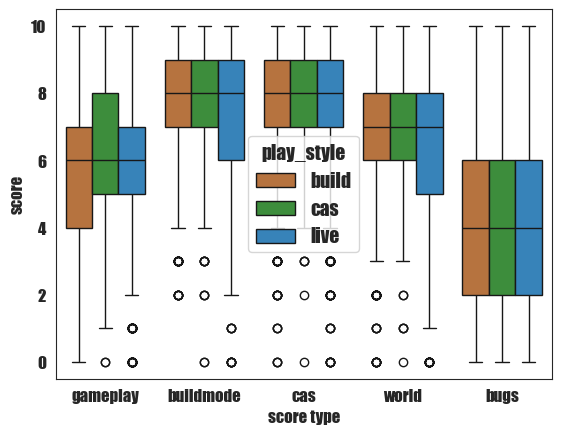

In [125]:
sns.boxplot(
    data = hsy_melted,
    x = 'score type',
    y = 'score',
    hue = 'play_style',
    palette = color_map
)

### Question 2 Summary: No difference

I am unable to find any sort of difference in HOW people rate packs based on their self-described player type

## Question 2a: Which packs had the widest difference between score types?

E.g. which packs had super high CAS scores but low gameplay etc.? Those ones will probably have the greatest variation between people's playstyles right?

In [59]:
# add the pack info from the base summary scores created by James
summary_pack_results = pd.merge( left = summary_per_pack,
         left_on = 'pack_code',
         right = pack_info,
         right_on = 'pack_id'
        )
summary_pack_results.head()

pack_code  avg_rating  avg_gameplay  avg_buildmode  avg_cas  avg_world  \
0      EP01         NaN        6.7403         4.8318   4.1164     2.1182   
1      EP02         NaN        6.4540         6.8248   5.5796     8.5605   
2      EP03         NaN        7.4340         7.0164   6.0849     8.3623   
3      EP04         NaN        7.2864         7.2529   6.0738     8.0083   
4      EP05         NaN        8.3771         7.6648   6.9536        NaN   

   avg_bugs  owned  owned_percent  unowned  ...  getpack_will_buy  \
0    3.6673  12478        82.3304     2678  ...               118   
1    1.8775  12332        81.3671     2824  ...               162   
2    2.6782  13522        89.2188     1634  ...               158   
3    2.6219  13833        91.2708     1323  ...               142   
4    2.2274  14295        94.3191      861  ...               160   

   getpack_might_buy  getpack_on_sale  getpack_free  getpack_no  \
0                195             1017          1184         164   
1                349             1225           892         196   
2                254              729           407          86   
3                225              476           332         148   
4                180              272           175          74   

   getpackbugs_percent        pack_type  release date  pack_id     pack name  
0               4.8004  Expansion Packs    03/31/2015     EP01   Get To Work  
1               1.3704  Expansion Packs    12/08/2015     EP02  Get Together  
2               0.9984  Expansion Packs    11/01/2016     EP03   City Living  
3               0.9253  Expansion Packs    11/10/2017     EP04   Cats & Dogs  
4               0.7275  Expansion Packs    06/22/2018     EP05       Seasons  

[5 rows x 25 columns]

### point plot of scores?

In [69]:
# melt so the scores are long
melted_summary_scores = pd.melt(summary_pack_results,
    id_vars = ['pack_code', 'pack_type', 'release date', 'pack name'],
    value_vars = ['avg_gameplay', 'avg_buildmode', 'avg_cas'], #, 'avg_bugs'],
    var_name = 'score_type',
    value_name = 'avg score',
    ignore_index = True
).dropna(subset = ['avg score'])
melted_summary_scores['score_type'] = melted_summary_scores['score_type'].apply(lambda x: x.split('_')[1])
melted_summary_scores

pack_code        pack_type release date                    pack name  \
0        EP01  Expansion Packs   03/31/2015                  Get To Work   
1        EP02  Expansion Packs   12/08/2015                 Get Together   
2        EP03  Expansion Packs   11/01/2016                  City Living   
3        EP04  Expansion Packs   11/10/2017                  Cats & Dogs   
4        EP05  Expansion Packs   06/22/2018                      Seasons   
..        ...              ...          ...                          ...   
185      GP08       Game Packs   09/10/2019               Realm of Magic   
186      GP09       Game Packs   09/08/2020  Star Wars: Journey to Batuu   
187      GP10       Game Packs   06/01/2021         Dream Home Decorator   
188      GP11       Game Packs   02/23/2022           My Wedding Stories   
189      GP12       Game Packs   06/16/2022                   Werewolves   

    score_type  avg score  
0     gameplay     6.7403  
1     gameplay     6.4540  
2     gameplay     7.4340  
3     gameplay     7.2864  
4     gameplay     8.3771  
..         ...        ...  
185        cas     6.4886  
186        cas     3.8830  
187        cas     7.4467  
188        cas     7.4687  
189        cas     7.3194  

[84 rows x 6 columns]

[]

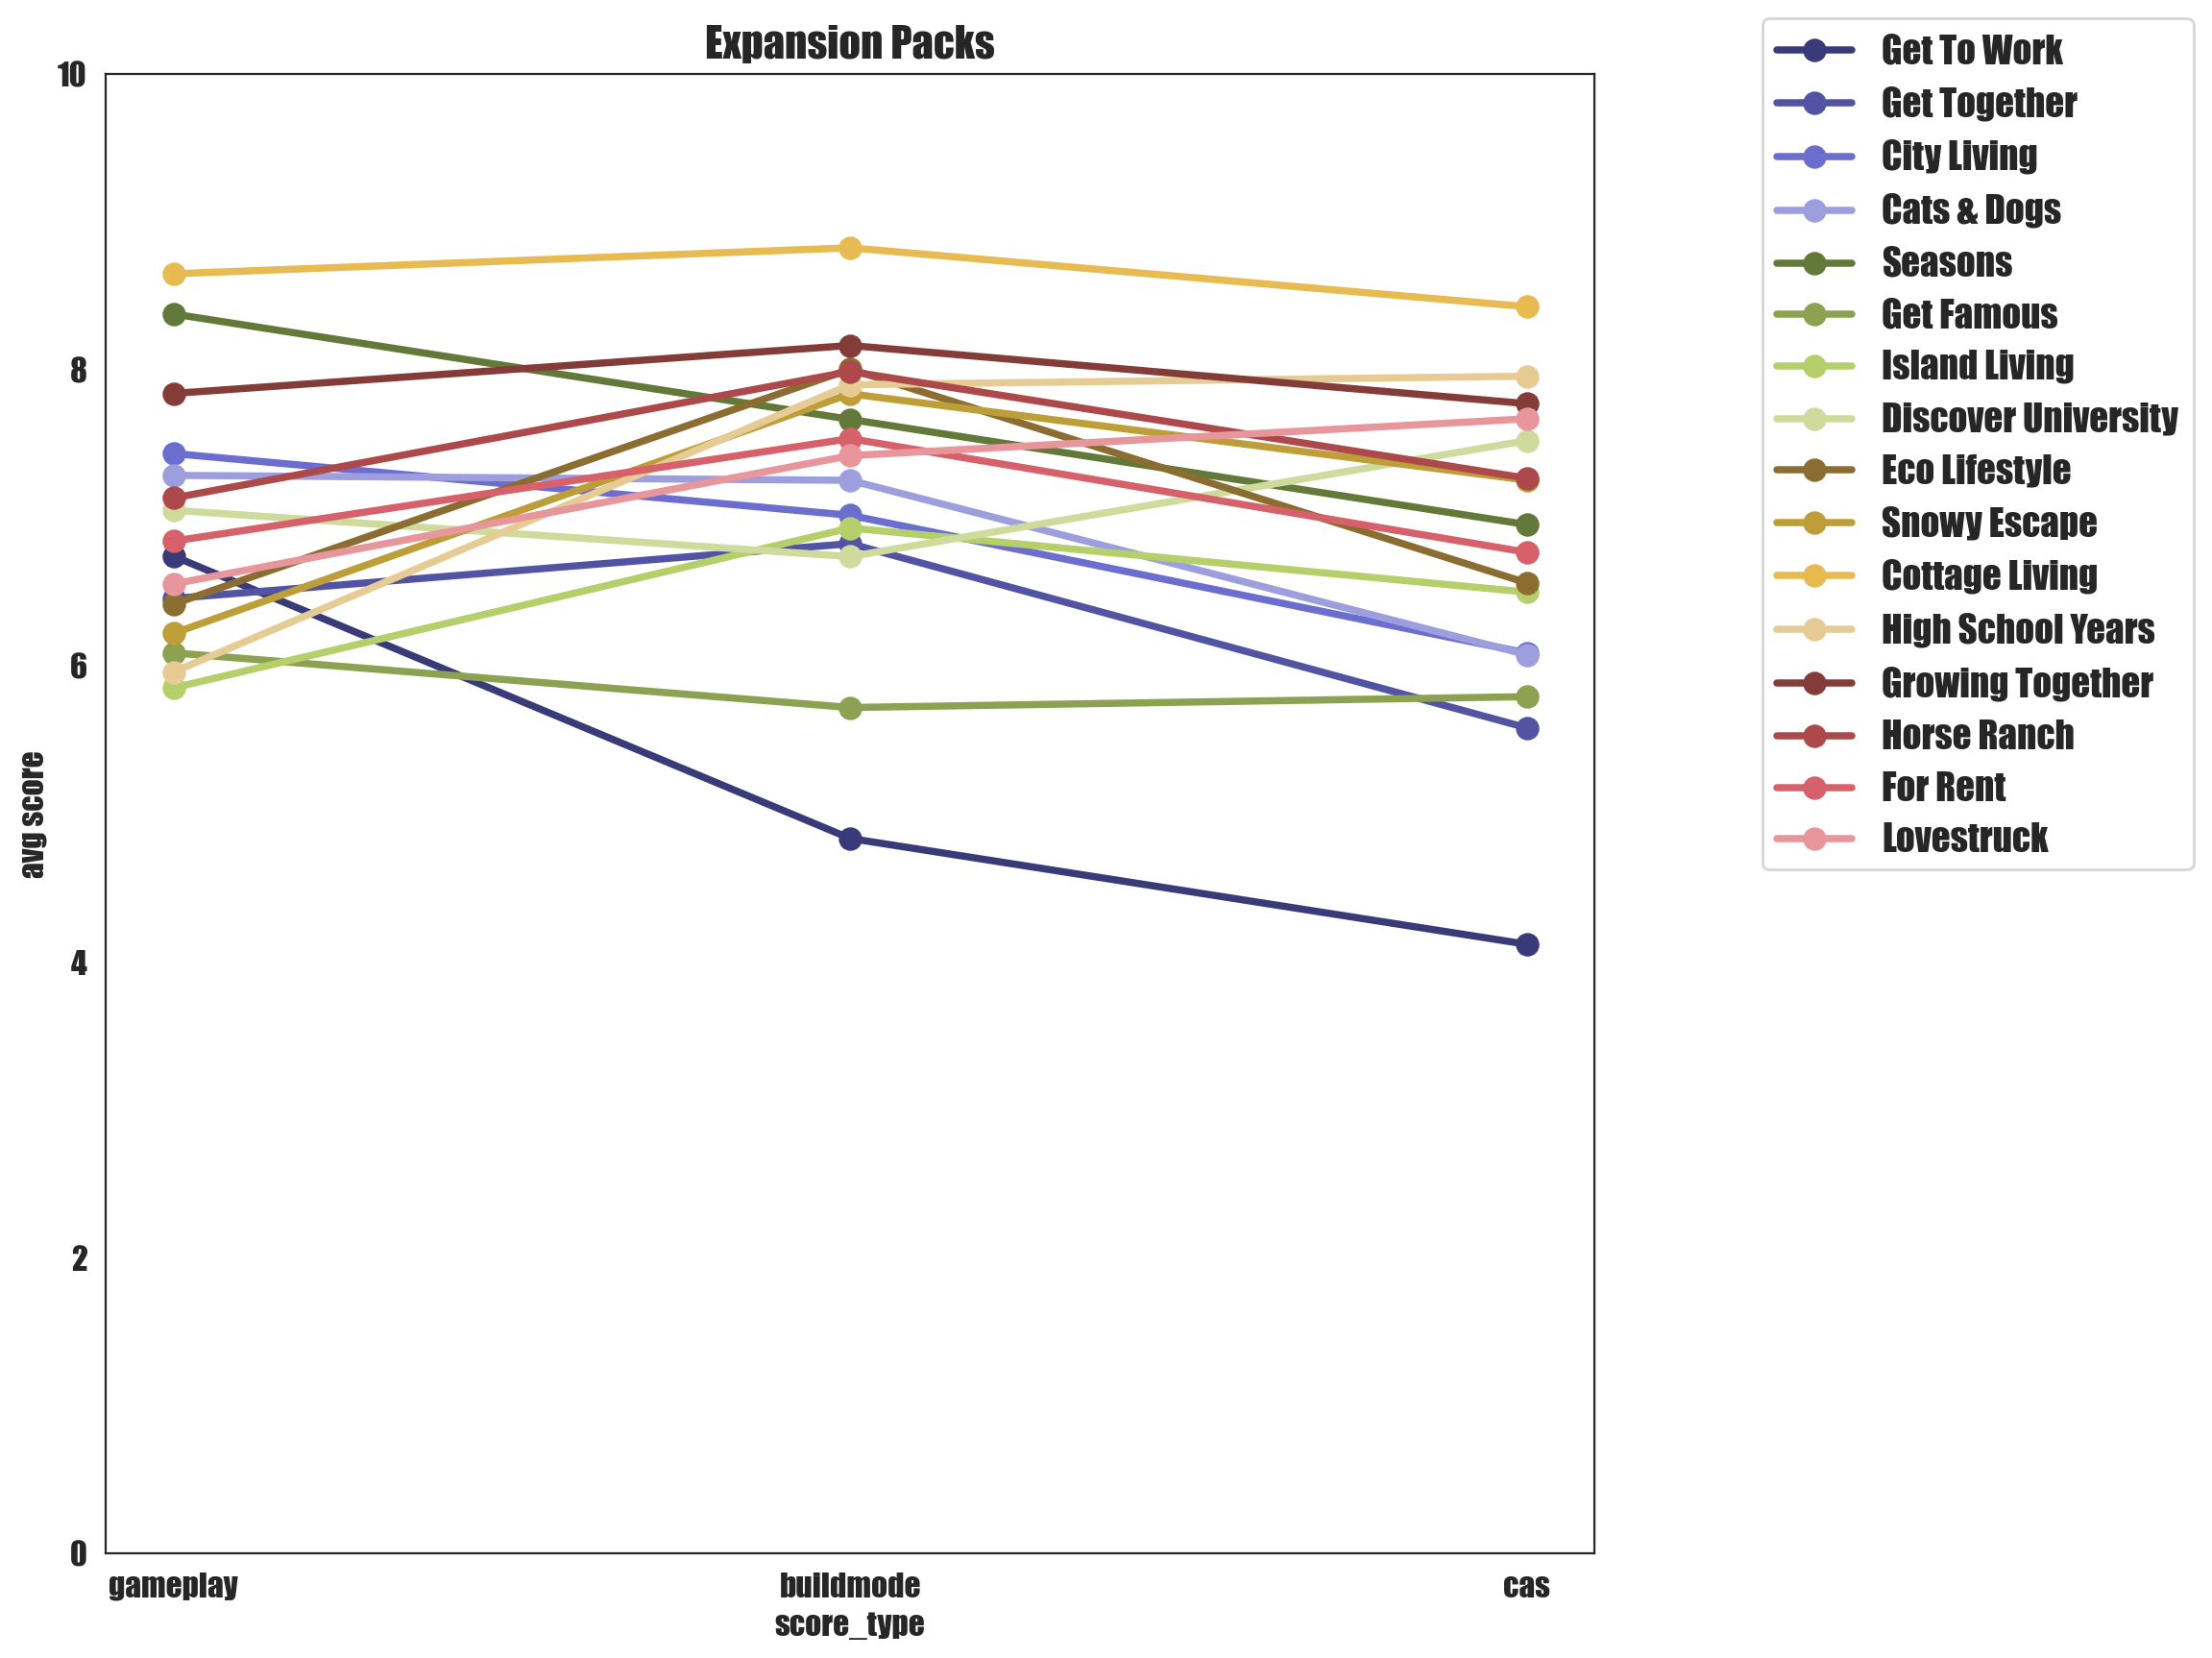

In [82]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 200)
sns.pointplot(
    data = melted_summary_scores[melted_summary_scores['pack_type'] == 'Expansion Packs'],
    x = 'score_type',
    y = 'avg score',
    hue = 'pack name',
    ax = ax,
    palette = 'tab20b'
)
plt.title('Expansion Packs')
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_ylim((0,10))
plt.plot()

[]

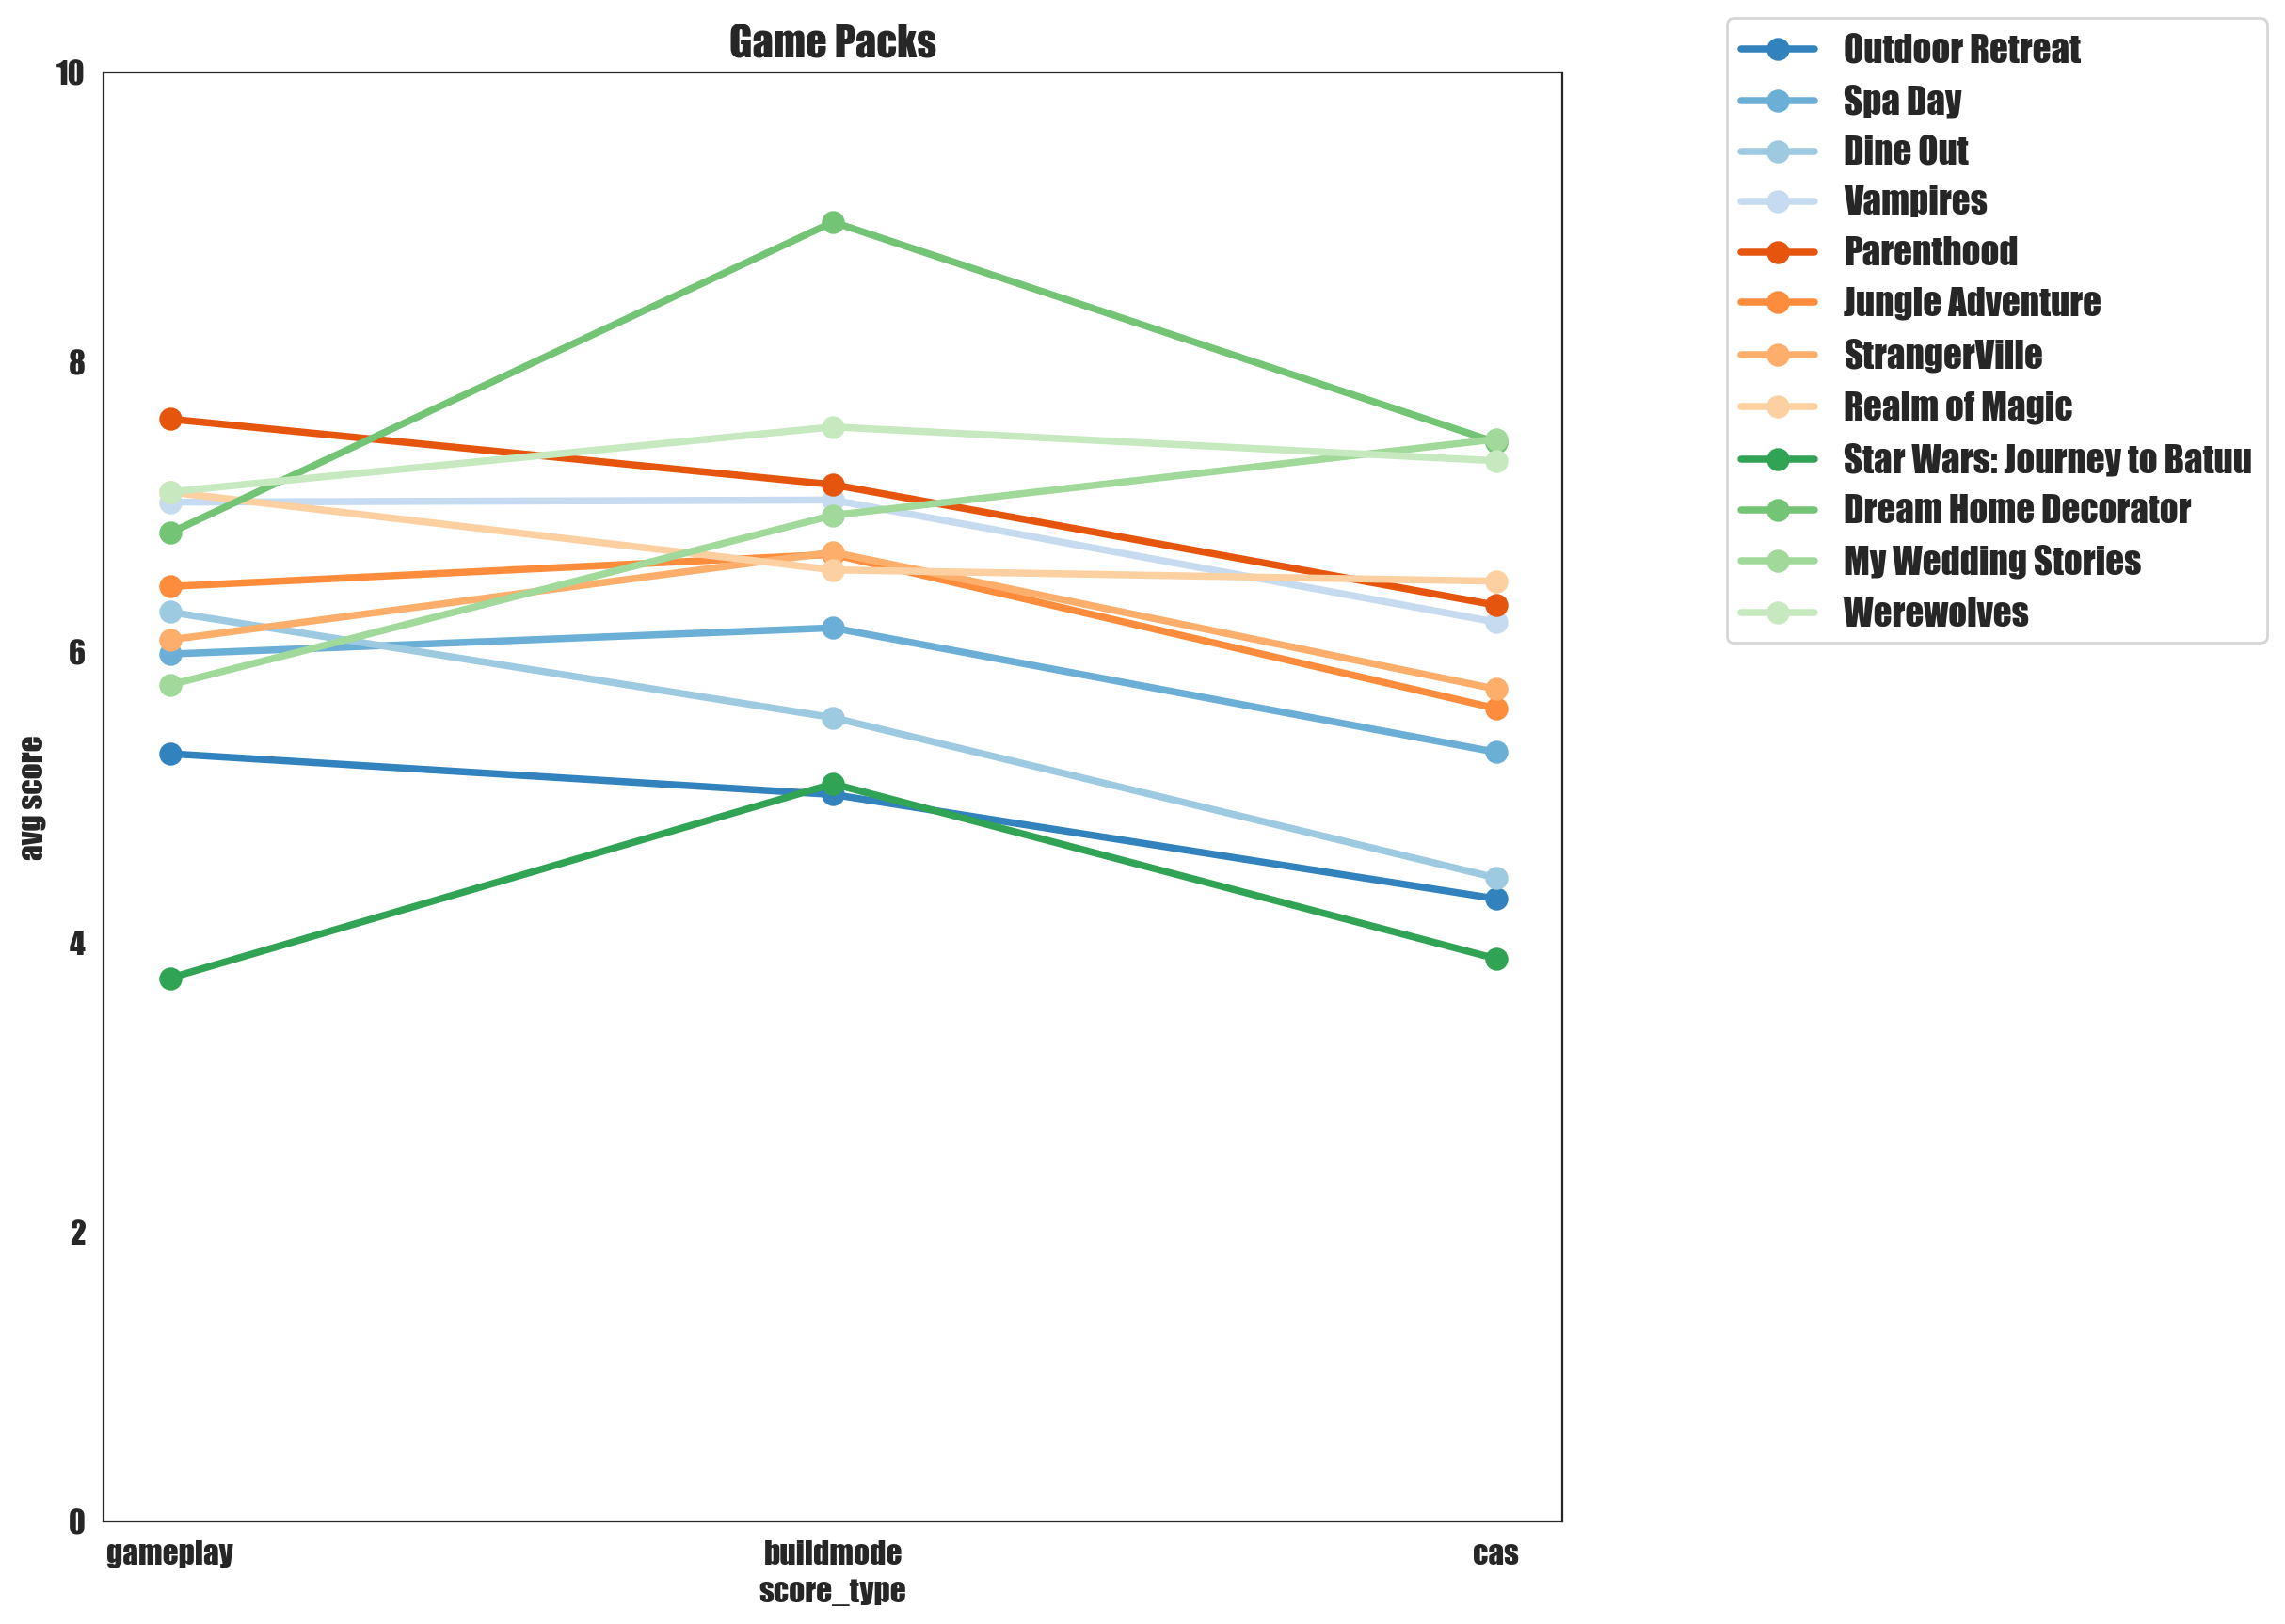

In [84]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 200)
sns.pointplot(
    data = melted_summary_scores[melted_summary_scores['pack_type'] == 'Game Packs'],
    x = 'score_type',
    y = 'avg score',
    hue = 'pack name',
    ax = ax,
    palette = 'tab20c'
)
plt.title('Game Packs')
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_ylim((0,10))
plt.plot()

### Calc differentials

In [97]:
avgs = pd.DataFrame(melted_summary_scores.groupby(['pack name'])['avg score'].mean())
avgs = avgs.rename(columns = {'avg score': 'mean score'})
to_calc_summaries = pd.merge(
    left = melted_summary_scores.rename(columns = {'avg score': 'category score'}),
    left_on = 'pack name',
    right = avgs,
    right_index = True
)
to_calc_summaries

pack_code        pack_type release date                    pack name  \
0        EP01  Expansion Packs   03/31/2015                  Get To Work   
1        EP02  Expansion Packs   12/08/2015                 Get Together   
2        EP03  Expansion Packs   11/01/2016                  City Living   
3        EP04  Expansion Packs   11/10/2017                  Cats & Dogs   
4        EP05  Expansion Packs   06/22/2018                      Seasons   
..        ...              ...          ...                          ...   
185      GP08       Game Packs   09/10/2019               Realm of Magic   
186      GP09       Game Packs   09/08/2020  Star Wars: Journey to Batuu   
187      GP10       Game Packs   06/01/2021         Dream Home Decorator   
188      GP11       Game Packs   02/23/2022           My Wedding Stories   
189      GP12       Game Packs   06/16/2022                   Werewolves   

    score_type  category score  mean score  
0     gameplay          6.7403    5.229500  
1     gameplay          6.4540    6.286133  
2     gameplay          7.4340    6.845100  
3     gameplay          7.2864    6.871033  
4     gameplay          8.3771    7.665167  
..         ...             ...         ...  
185        cas          6.4886    6.719667  
186        cas          3.8830    4.240933  
187        cas          7.4467    7.745300  
188        cas          7.4687    6.728500  
189        cas          7.3194    7.326200  

[84 rows x 7 columns]

In [109]:
to_calc_summaries['differential'] = to_calc_summaries['category score'] - to_calc_summaries['mean score']
to_calc_summaries

pack_code        pack_type release date                    pack name  \
0        EP01  Expansion Packs   03/31/2015                  Get To Work   
1        EP02  Expansion Packs   12/08/2015                 Get Together   
2        EP03  Expansion Packs   11/01/2016                  City Living   
3        EP04  Expansion Packs   11/10/2017                  Cats & Dogs   
4        EP05  Expansion Packs   06/22/2018                      Seasons   
..        ...              ...          ...                          ...   
185      GP08       Game Packs   09/10/2019               Realm of Magic   
186      GP09       Game Packs   09/08/2020  Star Wars: Journey to Batuu   
187      GP10       Game Packs   06/01/2021         Dream Home Decorator   
188      GP11       Game Packs   02/23/2022           My Wedding Stories   
189      GP12       Game Packs   06/16/2022                   Werewolves   

    score_type  category score  mean score  differential  
0     gameplay          6.7403    5.229500      1.510800  
1     gameplay          6.4540    6.286133      0.167867  
2     gameplay          7.4340    6.845100      0.588900  
3     gameplay          7.2864    6.871033      0.415367  
4     gameplay          8.3771    7.665167      0.711933  
..         ...             ...         ...           ...  
185        cas          6.4886    6.719667     -0.231067  
186        cas          3.8830    4.240933     -0.357933  
187        cas          7.4467    7.745300     -0.298600  
188        cas          7.4687    6.728500      0.740200  
189        cas          7.3194    7.326200     -0.006800  

[84 rows x 8 columns]

### Boxplot of differentials

[]

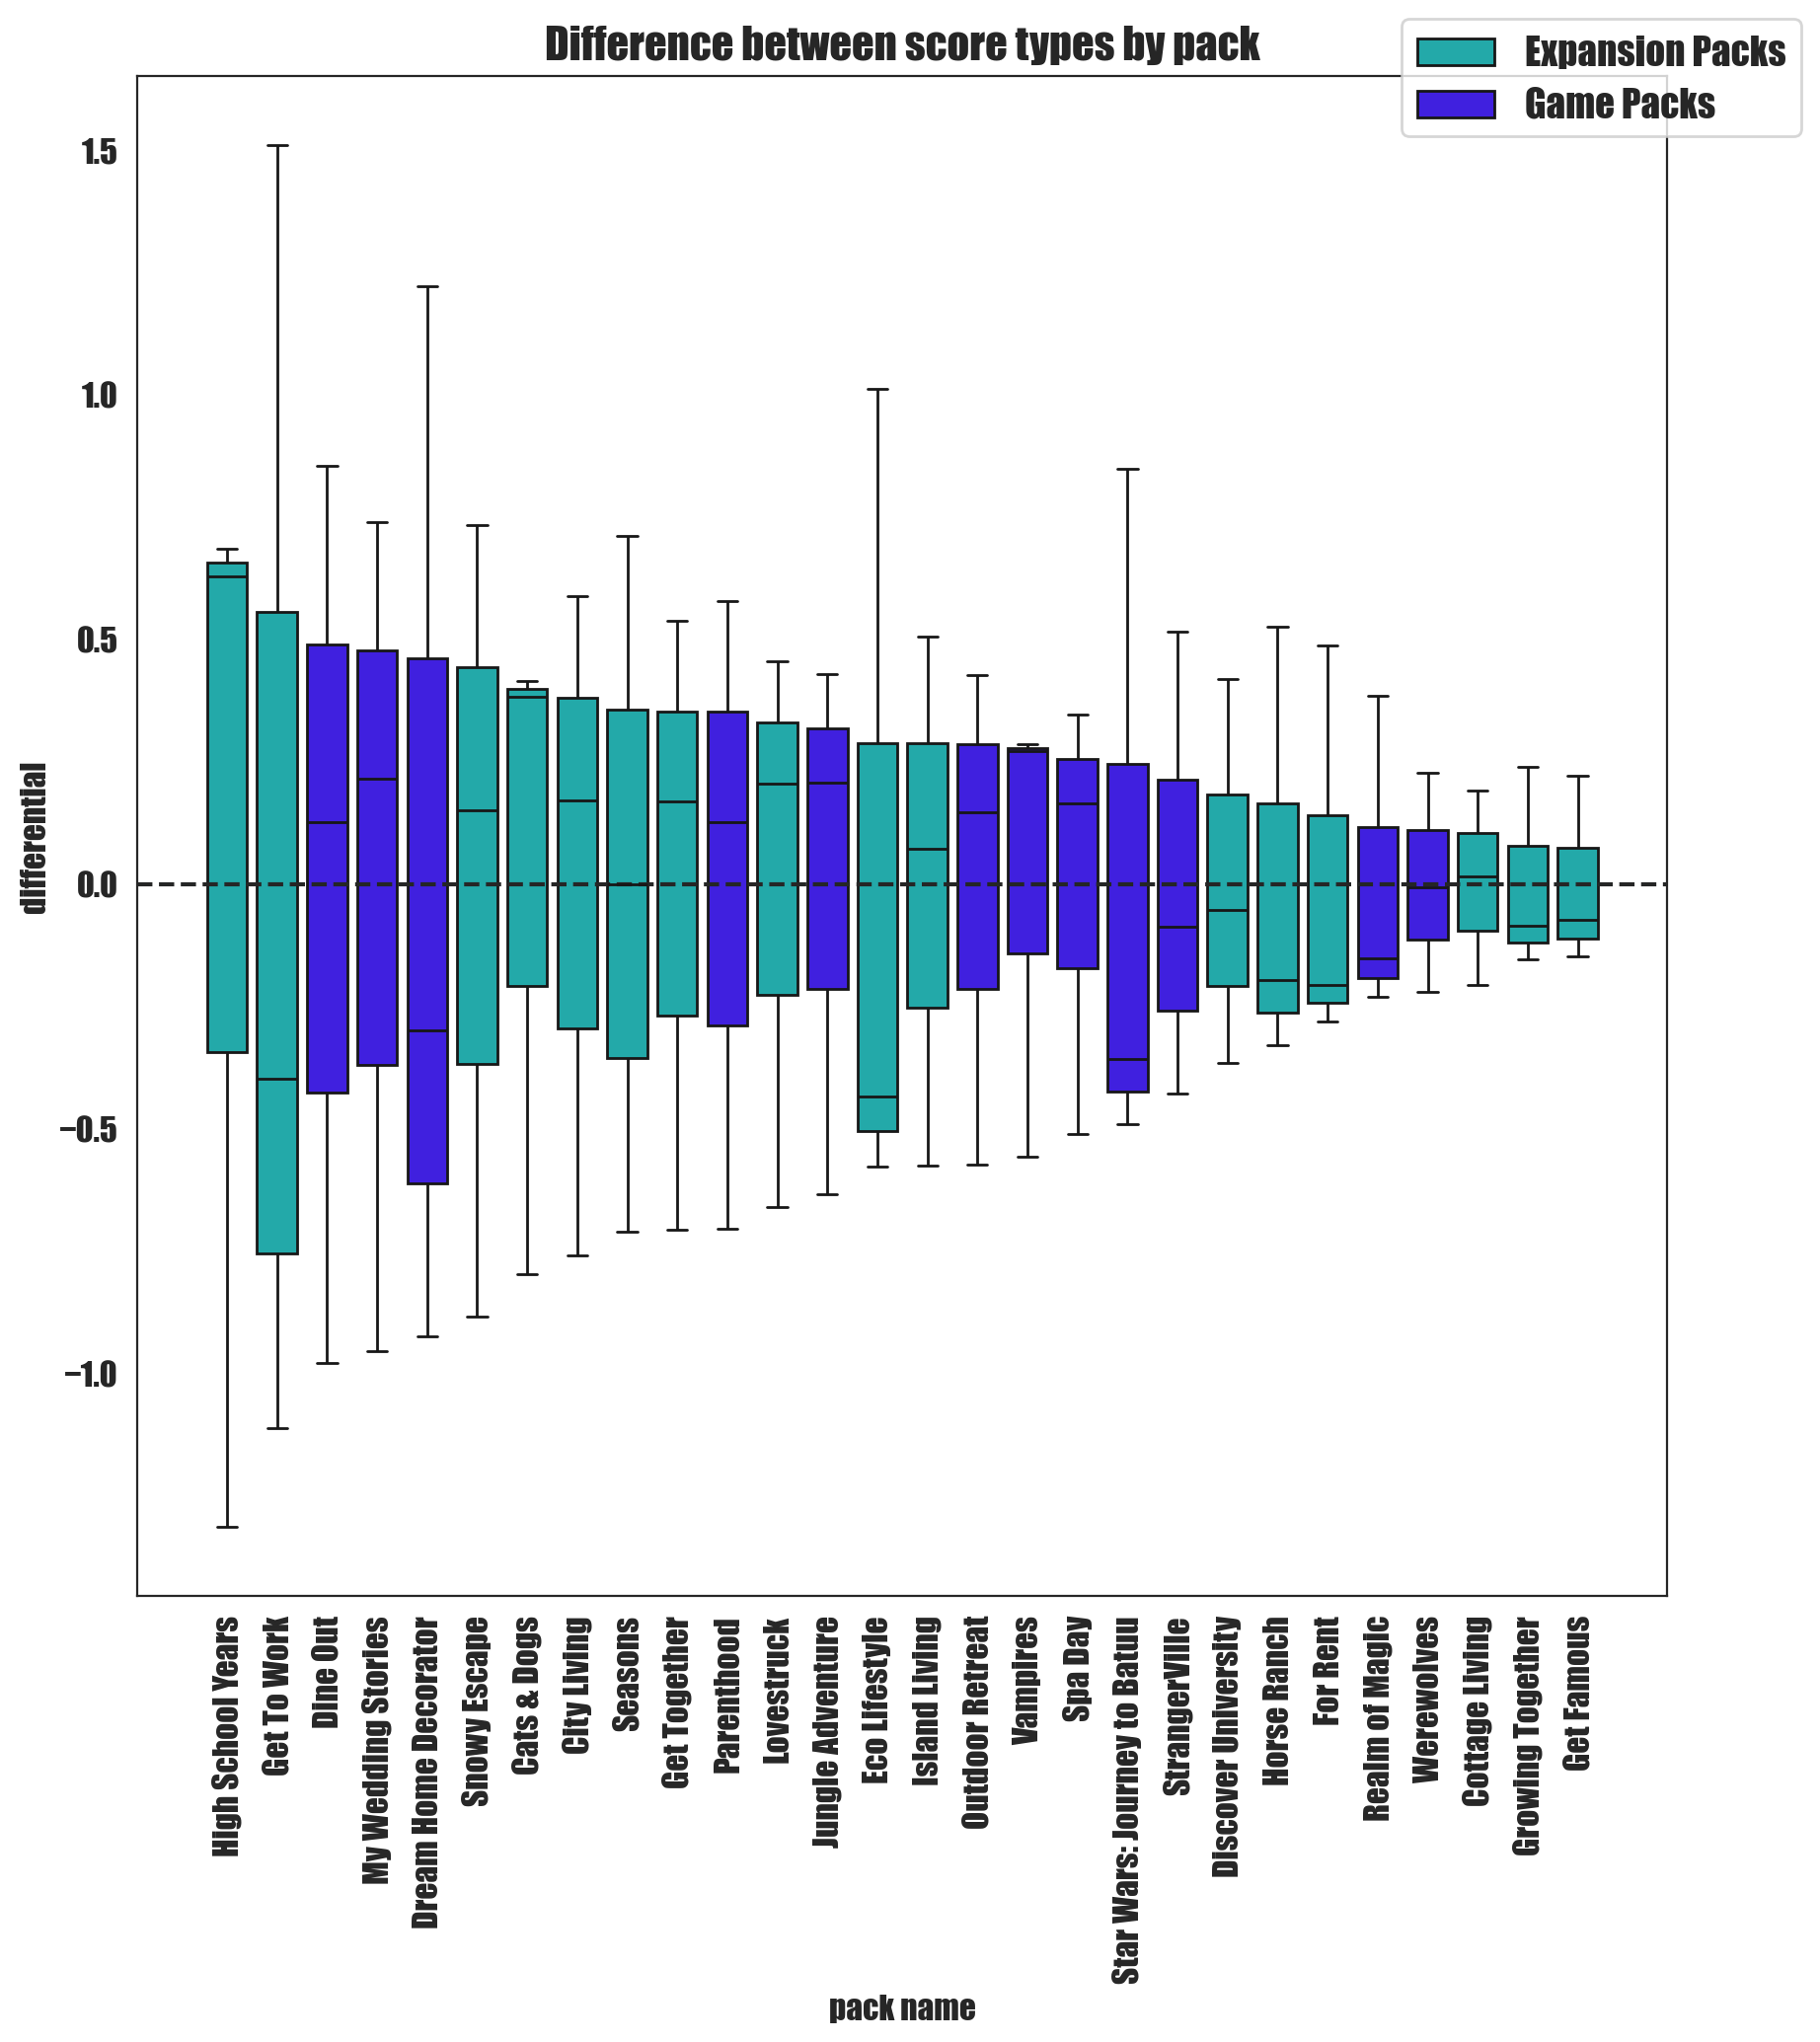

In [126]:
# plot the differentials

fig, ax = plt.subplots(figsize = (10,10), dpi = 200)
sns.boxplot(
    data = to_calc_summaries.sort_values('differential'),
    x = 'pack name',
    y = 'differential',
    hue = 'pack_type',
    ax = ax,
    palette = color_map
)
plt.xticks(rotation=90) 
plt.axhline(y = 0, color = color_map['gray'], linestyle = '--')
plt.title('Difference between score types by pack')
ax.legend(bbox_to_anchor=(1.1, 1.05))
# ax.set_ylim((0,10))
plt.plot()


### catplot to see which category was most diff

[]

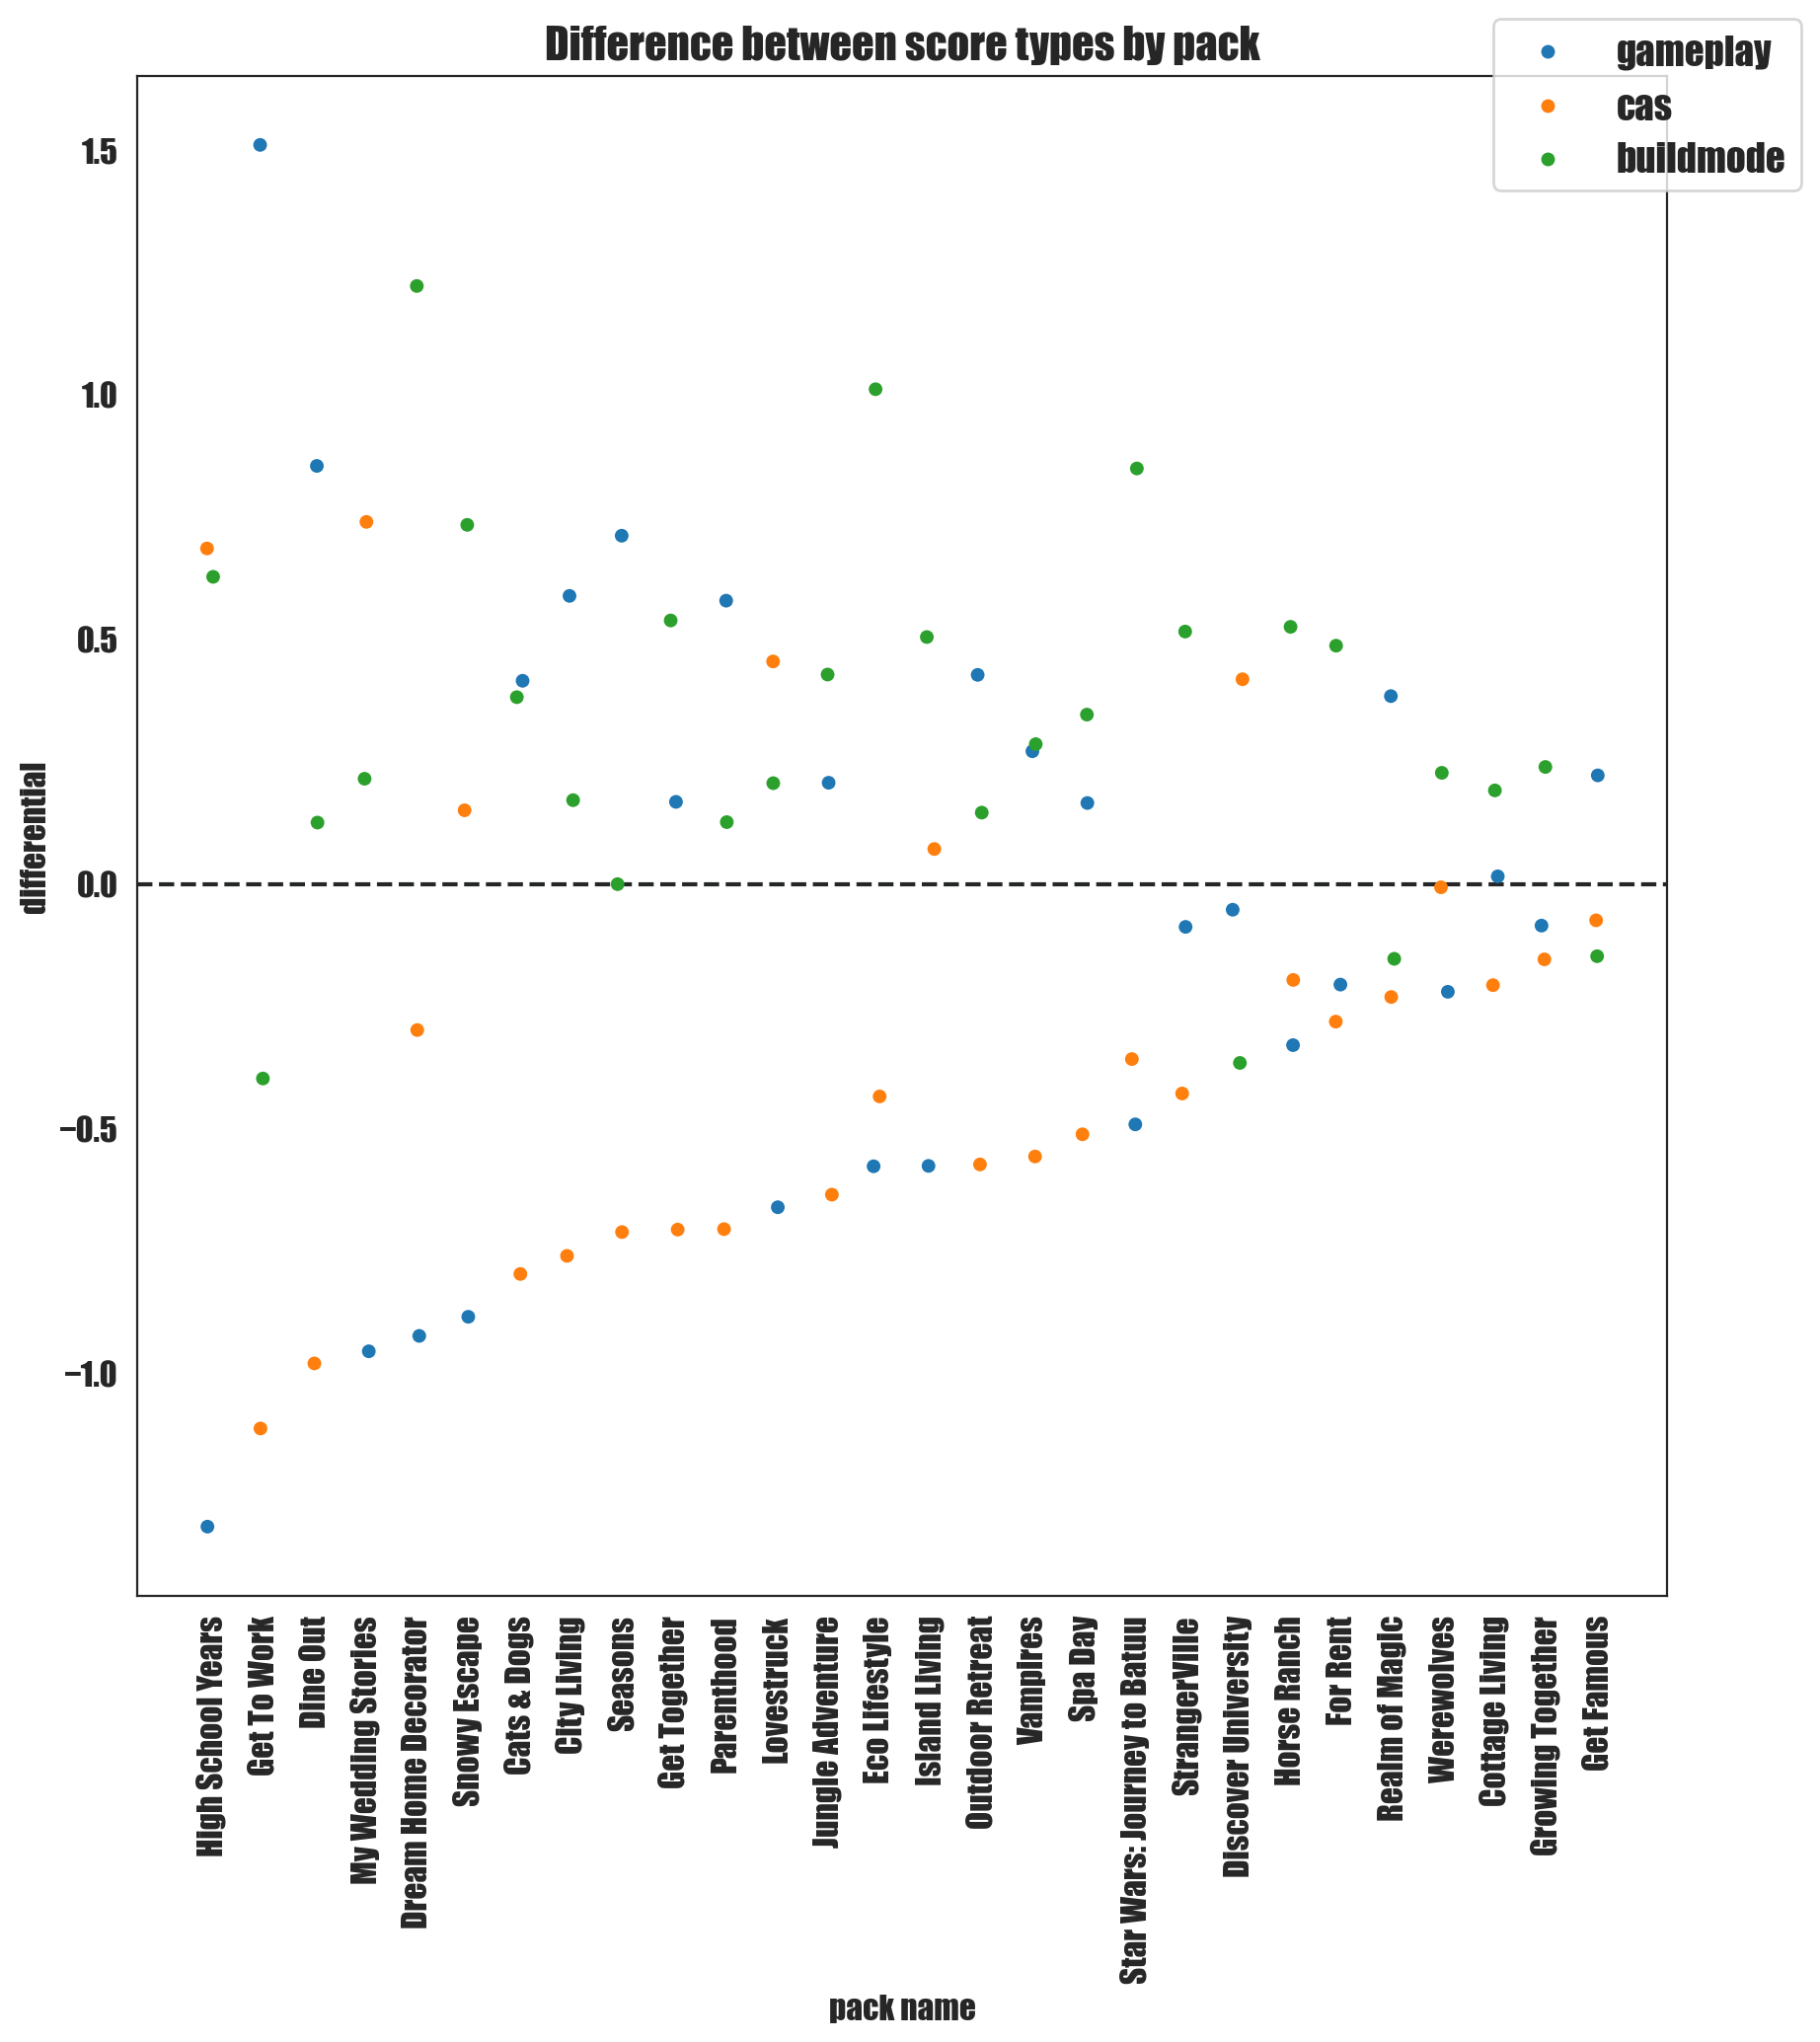

In [127]:
# plot the differentials

fig, ax = plt.subplots(figsize = (10,10), dpi = 200)
sns.stripplot(
    data = to_calc_summaries.sort_values('differential'),
    x = 'pack name',
    y = 'differential',
    hue = 'score_type',
    ax = ax,
    # palette = color_map
)
plt.xticks(rotation=90) 
plt.axhline(y = 0, color = color_map['gray'], linestyle = '--')
plt.title('Difference between score types by pack')
ax.legend(bbox_to_anchor=(1.1, 1.05))
# ax.set_ylim((0,10))
plt.plot()


## Question 2b: Does play style affect pack ownership?

It didn't affect how people rated the packs, but maybe it affects which packs they own in the first place

## Question 3: Which packs are clustered based on ownerships?

Do people tend to buy certain sets of packs? Is that pack clustering different per play style?

## Question 4: Which packs do people want to get, which do they hate?

This is about the question of the survey where people rated if they would get a pack they don't already have

# Additional Question from Redditors

"The thing that I would be curious about is the difference in rates between pc players and console players for owning g all dlc. I know I own all the packs, but I don't know if I would if I was on pc." (people mentioned being forced to get specific bundles on consoles which were cheaper


"the fact that lovestruck is the expansion that people who own all packs except 1 - wonder if this is a 'just haven't got round to buying it yet' thing, or 'i will never buy it' thing - I am in the second camp because the relationship decay is not for me." "Being a relatively new pack, Lovestruck hadn't gone on the full discount price yet when the survey opened, which a lot of people wait for. A lot of people probably either acquired it after doing the survey (during the winter sale), or will during another sale."